# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GrCFanIn/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestMFGrCPlasticity10'
simulation_time = 2000
analysis_time = 100.0
analysis_step = 100.0
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 123456789
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['grclayer']['density_of_neurons'] = 4.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
#simulation.config_options['grclayer']['cm'] = 2.0e-12
simulation.config_options['grclayer']['cm'] = 50.0e-12
#simulation.config_options['grclayer']['grest'] = 0.2e-9
simulation.config_options['grclayer']['grest'] = 3.0e-9
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgrcsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgrcsynapsis']['average_number_of_source_cells'] = 2000.0
simulation.config_options['mfgrcsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgrcsynapsis']['weight_initialization_type'] = 'random'
#simulation.config_options['mfgrcsynapsis']['random_min_weight'] = 2.5e-12
#simulation.config_options['mfgrcsynapsis']['random_max_weight'] = 3.0e-12
simulation.config_options['mfgrcsynapsis']['random_min_weight'] = 6.0e-11
simulation.config_options['mfgrcsynapsis']['random_max_weight'] = 8.0e-11
simulation.config_options['mfgrcsynapsis']['weight_recording'] = True
simulation.config_options['mfgrcsynapsis']['weight_normalization'] = False
simulation.config_options['mfgrcsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgrcsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgrcsynapsis']['learning_step'] = 1.0e-3
simulation.config_options['mfgrcsynapsis']['minus_plus_ratio'] = 1.2
simulation.config_options['grclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgrcsynapsis']['max_weight'] = 1.2e-9

Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'grclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['layer'] = 'grclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 500

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-05-23 18:55:00,138 - P10910 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 2000s
2018-05-23 18:55:00,160 - P10910 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-05-23 18:55:00,260 - P10910 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-05-23 18:55:00,261 - P10910 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGrCPlasticity10
2018-05-23 18:55:00,297 - P10910 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-05-23 18:55:00,300 - P10910 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-05-23 18:55:00,319 - P10910 - MemTotal:88M - Simulation - DEBUG: Setting Global NEST Seed: 123456800
2018-05-23 18:55:00,321 - P10910 - MemTotal:88M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [123456801, 123456802, 123456803, 123456804, 123456805, 123456806, 123456807, 123456808, 123456809, 123456810]
2018-05-23 18:55:00,322 - P10910 - MemTotal:88M - Simulat

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


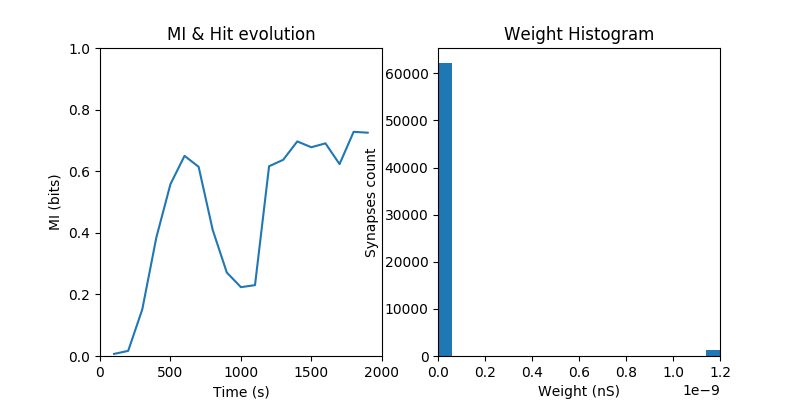

2018-05-23 18:55:06,741 - P10910 - MemTotal:734M - Simulation - INFO: Running the simulation from 0.0s until time 100.0s
2018-05-23 18:55:06,771 - P10910 - MemTotal:735M - Simulation - DEBUG: Running the simulation 0.177s until 0.177s
2018-05-23 18:55:07,101 - P10910 - MemTotal:735M - Simulation - DEBUG: Simulation time is 0.327342033386 seconds. Real-time rate: 0.5407188260212152
2018-05-23 18:55:07,118 - P10910 - MemTotal:735M - Simulation - DEBUG: Running the simulation 0.07800000000000001s until 0.255s
2018-05-23 18:55:07,263 - P10910 - MemTotal:735M - Simulation - DEBUG: Simulation time is 0.143038034439 seconds. Real-time rate: 0.5453095067047814
2018-05-23 18:55:07,283 - P10910 - MemTotal:736M - Simulation - DEBUG: Running the simulation 0.006000000000000005s until 0.261s
2018-05-23 18:55:07,299 - P10910 - MemTotal:736M - Simulation - DEBUG: Simulation time is 0.0135579109192 seconds. Real-time rate: 0.4425460556395741
2018-05-23 18:55:07,318 - P10910 - MemTotal:736M - Simulatio

2018-05-23 18:55:13,440 - P10910 - MemTotal:736M - Simulation - DEBUG: Running the simulation 0.13999999999999968s until 5.264s
2018-05-23 18:55:13,599 - P10910 - MemTotal:736M - Simulation - DEBUG: Simulation time is 0.157927036285 seconds. Real-time rate: 0.8864853244443619
2018-05-23 18:55:13,617 - P10910 - MemTotal:736M - Simulation - DEBUG: Running the simulation 0.399s until 5.663s
2018-05-23 18:55:14,056 - P10910 - MemTotal:736M - Simulation - DEBUG: Simulation time is 0.437597990036 seconds. Real-time rate: 0.9117957785116096
2018-05-23 18:55:14,074 - P10910 - MemTotal:736M - Simulation - DEBUG: Running the simulation 0.10099999999999998s until 5.764s
2018-05-23 18:55:14,199 - P10910 - MemTotal:736M - Simulation - DEBUG: Simulation time is 0.122426986694 seconds. Real-time rate: 0.8249815071587703
2018-05-23 18:55:14,216 - P10910 - MemTotal:736M - Simulation - DEBUG: Running the simulation 0.1429999999999998s until 5.907s
2018-05-23 18:55:14,376 - P10910 - MemTotal:736M - Simul

2018-05-23 18:55:23,374 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0562829971313 seconds. Real-time rate: 0.6218574309097404
2018-05-23 18:55:23,392 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.18299999999999983s until 13.49s
2018-05-23 18:55:23,607 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.213106870651 seconds. Real-time rate: 0.8587240732349922
2018-05-23 18:55:23,627 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.1349999999999998s until 13.625s
2018-05-23 18:55:23,780 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.150989055634 seconds. Real-time rate: 0.8941045391240073
2018-05-23 18:55:23,798 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.44599999999999973s until 14.071s
2018-05-23 18:55:24,296 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.496155977249 seconds. Real-time rate: 0.8989108676524925
2018-05-23 18:55:2

2018-05-23 18:55:31,331 - P10910 - MemTotal:718M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 18:55:32,220 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.553445100784 seconds. Real-time rate: 0.8004407291205772
2018-05-23 18:55:32,242 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.08200000000000074s until 20.525s
2018-05-23 18:55:32,340 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.096342086792 seconds. Real-time rate: 0.8511337332462313
2018-05-23 18:55:32,359 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.015999999999998238s until 20.540999999999997s
2018-05-23 18:55:32,391 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0304310321808 seconds. Real-time rate: 0.5257790765999876
2018-05-23 18:55:32,411 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.4220000000000006s until 20.962999999999997

2018-05-23 18:55:39,702 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.21399999999999864s until 26.711s
2018-05-23 18:55:39,939 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.23486495018 seconds. Real-time rate: 0.9111619244844348
2018-05-23 18:55:39,957 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.4190000000000005s until 27.13s
2018-05-23 18:55:40,419 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.460727930069 seconds. Real-time rate: 0.9094304309644898
2018-05-23 18:55:40,437 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.04100000000000037s until 27.171s
2018-05-23 18:55:40,487 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0485808849335 seconds. Real-time rate: 0.8439533379465435
2018-05-23 18:55:40,505 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.07600000000000051s until 27.247s
2018-05-23 18:55:40,601 - P10910 - MemT

2018-05-23 18:55:47,763 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.18200000000000216s until 33.086s
2018-05-23 18:55:47,975 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.210592985153 seconds. Real-time rate: 0.8642263172612525
2018-05-23 18:55:47,995 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.2220000000000013s until 33.308s
2018-05-23 18:55:48,266 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.268883943558 seconds. Real-time rate: 0.8256350195649735
2018-05-23 18:55:48,285 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.08200000000000074s until 33.39s
2018-05-23 18:55:48,375 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0887629985809 seconds. Real-time rate: 0.9238083583356471
2018-05-23 18:55:48,393 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.39099999999999824s until 33.781s
2018-05-23 18:55:48,812 - P10910 - Mem

2018-05-23 18:55:54,768 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.4200000000000017s until 38.974s
2018-05-23 18:55:55,244 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.473651885986 seconds. Real-time rate: 0.8867271775460109
2018-05-23 18:55:55,262 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.07099999999999795s until 39.044999999999995s
2018-05-23 18:55:55,347 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0838119983673 seconds. Real-time rate: 0.8471340784506474
2018-05-23 18:55:55,365 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.4540000000000006s until 39.498999999999995s
2018-05-23 18:55:55,863 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.497084856033 seconds. Real-time rate: 0.9133249474201722
2018-05-23 18:55:55,882 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.28000000000000114s until 39.778999999999996s
20

2018-05-23 18:56:05,087 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.20300000000000296s until 47.219s
2018-05-23 18:56:05,315 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.225450992584 seconds. Real-time rate: 0.9004174152134732
2018-05-23 18:56:05,332 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.21399999999999864s until 47.433s
2018-05-23 18:56:05,561 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.227308988571 seconds. Real-time rate: 0.9414497919557566
2018-05-23 18:56:05,579 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.06300000000000239s until 47.496s
2018-05-23 18:56:05,682 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.101413011551 seconds. Real-time rate: 0.6212220605280036
2018-05-23 18:56:05,700 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.045999999999999375s until 47.542s
2018-05-23 18:56:05,771 - P10910 - M

2018-05-23 18:56:15,813 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.228092908859 seconds. Real-time rate: 0.7891521086745865
2018-05-23 18:56:15,831 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 55.910000000000004s
2018-05-23 18:56:15,921 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0881390571594 seconds. Real-time rate: 0.8282366790917645
2018-05-23 18:56:15,944 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.027999999999998693s until 55.938s
2018-05-23 18:56:15,995 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0496129989624 seconds. Real-time rate: 0.5643682217480466
2018-05-23 18:56:16,020 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.08200000000000074s until 56.02s
2018-05-23 18:56:16,119 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0976269245148 seconds. Real-time rate: 0.8399322257416243
201

2018-05-23 18:56:25,459 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0262079238892 seconds. Real-time rate: 0.26709479276583076
2018-05-23 18:56:25,478 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.015000000000000568s until 63.755s
2018-05-23 18:56:25,508 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0282859802246 seconds. Real-time rate: 0.5302980445044031
2018-05-23 18:56:25,526 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 63.779s
2018-05-23 18:56:25,566 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0372850894928 seconds. Real-time rate: 0.643688947149687
2018-05-23 18:56:25,588 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.7709999999999937s until 64.55s
2018-05-23 18:56:26,405 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.815195083618 seconds. Real-time rate: 0.9457858805747272
2018-05-23 18:5

2018-05-23 18:56:32,679 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0446739196777 seconds. Real-time rate: 0.649148322090261
2018-05-23 18:56:32,697 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.3810000000000002s until 69.86599999999999s
2018-05-23 18:56:33,108 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.409051895142 seconds. Real-time rate: 0.9314221606725704
2018-05-23 18:56:33,126 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.7900000000000063s until 70.65599999999999s
2018-05-23 18:56:33,287 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.158178091049 seconds. Real-time rate: 0.847146397526948
2018-05-23 18:56:33,289 - P10910 - MemTotal:718M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 18:56:33,291 - P10910 - MemTotal:718M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 18:56:3

2018-05-23 18:56:41,366 - P10910 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.1490000000000009s until 76.585s
2018-05-23 18:56:41,522 - P10910 - MemTotal:723M - Simulation - DEBUG: Simulation time is 0.153465986252 seconds. Real-time rate: 0.9708991786329666
2018-05-23 18:56:41,539 - P10910 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.18999999999999773s until 76.77499999999999s
2018-05-23 18:56:41,769 - P10910 - MemTotal:723M - Simulation - DEBUG: Simulation time is 0.22753405571 seconds. Real-time rate: 0.8350398335196637
2018-05-23 18:56:41,787 - P10910 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.0660000000000025s until 76.841s
2018-05-23 18:56:41,883 - P10910 - MemTotal:723M - Simulation - DEBUG: Simulation time is 0.094071149826 seconds. Real-time rate: 0.7015966119479284
2018-05-23 18:56:41,901 - P10910 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.03300000000000125s until 76.874s
2018-05-23 18:56:41,953 - P10

2018-05-23 18:56:50,138 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.26940202713 seconds. Real-time rate: 0.8648784215994786
2018-05-23 18:56:50,157 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 83.36499999999998s
2018-05-23 18:56:50,177 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0177509784698 seconds. Real-time rate: 0.28167461351431006
2018-05-23 18:56:50,196 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.6380000000000052s until 84.00299999999999s
2018-05-23 18:56:50,868 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.670879840851 seconds. Real-time rate: 0.9509899704109075
2018-05-23 18:56:50,891 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.5090000000000003s until 84.51199999999999s
2018-05-23 18:56:51,467 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.574948072433 seconds. Real-time rate: 0.

2018-05-23 18:57:00,608 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.11599999999999966s until 92.14599999999999s
2018-05-23 18:57:00,742 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.131972074509 seconds. Real-time rate: 0.8789738316372498
2018-05-23 18:57:00,760 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.1280000000000001s until 92.27399999999999s
2018-05-23 18:57:00,903 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.141345977783 seconds. Real-time rate: 0.9055793592961442
2018-05-23 18:57:00,922 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 92.31599999999999s
2018-05-23 18:57:00,984 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0604348182678 seconds. Real-time rate: 0.6949636187185152
2018-05-23 18:57:01,002 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.8400000000000034s until 93.1559999999

2018-05-23 18:57:10,052 - P10910 - MemTotal:716M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-05-23 18:57:10,054 - P10910 - MemTotal:716M - Simulation - INFO: [[0.2    0.2048 0.2112 0.1984 0.192  0.2016 0.1984 0.1984 0.1776 0.2048
  0.1856 0.2064 0.2048 0.2032 0.1952 0.2    0.192  0.1952 0.1984 0.1952
  0.2064 0.2112 0.2032 0.1872 0.1968 0.184  0.192  0.184  0.2112 0.2032
  0.1808 0.1728]]
2018-05-23 18:57:10,055 - P10910 - MemTotal:716M - Simulation - INFO: Individual pattern miss matrix:
2018-05-23 18:57:10,057 - P10910 - MemTotal:716M - Simulation - INFO: [[0.13142857 0.12       0.11428571 0.12       0.12571429 0.12
  0.11428571 0.12571429 0.10857143 0.10285714 0.11428571 0.11428571
  0.13142857 0.12571429 0.13714286 0.11428571 0.12       0.11428571
  0.13142857 0.09714286 0.13142857 0.12       0.13142857 0.11428571
  0.13142857 0.13714286 0.10857143 0.11428571 0.15428571 0.13714286
  0.12571429 0.12571429]]
2018-05-23 18:57:10,059 - P10910 - MemTotal:716M 

2018-05-23 18:57:15,271 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.115569114685 seconds. Real-time rate: 0.8393245917331137
2018-05-23 18:57:15,288 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.1039999999999992s until 103.279s
2018-05-23 18:57:15,409 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.118163108826 seconds. Real-time rate: 0.8801393348022176
2018-05-23 18:57:15,426 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.02599999999999625s until 103.30499999999999s
2018-05-23 18:57:15,464 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0361840724945 seconds. Real-time rate: 0.7185481955891878
2018-05-23 18:57:15,482 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.0589999999999975s until 103.36399999999999s
2018-05-23 18:57:15,548 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0641288757324 seconds. Real-time rate: 0.920022366

2018-05-23 18:57:22,617 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.045000000000001705s until 109.34799999999997s
2018-05-23 18:57:22,677 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0579519271851 seconds. Real-time rate: 0.7765056691954809
2018-05-23 18:57:22,694 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.7939999999999969s until 110.14199999999997s
2018-05-23 18:57:23,385 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.689492940903 seconds. Real-time rate: 0.945622444149184
2018-05-23 18:57:23,388 - P10910 - MemTotal:716M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 18:57:23,390 - P10910 - MemTotal:716M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 18:57:23,964 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.202940940857 seconds. Real-time rate: 0.6997109572881729
2018-05-23 18

2018-05-23 18:57:31,372 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.054000000000002046s until 116.47399999999995s
2018-05-23 18:57:31,438 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0641808509827 seconds. Real-time rate: 0.8413724525806986
2018-05-23 18:57:31,456 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until 116.70499999999994s
2018-05-23 18:57:31,703 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.245316982269 seconds. Real-time rate: 0.9416388456402229
2018-05-23 18:57:31,729 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.4860000000000042s until 117.19099999999995s
2018-05-23 18:57:32,268 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.537409067154 seconds. Real-time rate: 0.9043390402283605
2018-05-23 18:57:32,287 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.15500000000000114s until 117.3459

2018-05-23 18:57:38,328 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.39400000000000546s until 122.17599999999995s
2018-05-23 18:57:38,740 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.410212039948 seconds. Real-time rate: 0.9604788783147886
2018-05-23 18:57:38,758 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.031999999999996476s until 122.20799999999994s
2018-05-23 18:57:38,814 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0541579723358 seconds. Real-time rate: 0.5908640707886035
2018-05-23 18:57:38,832 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.1460000000000008s until 122.35399999999994s
2018-05-23 18:57:39,003 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.169381856918 seconds. Real-time rate: 0.8619577247307698
2018-05-23 18:57:39,021 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.2459999999999951s until 122.59999

2018-05-23 18:57:46,421 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.29958987236 seconds. Real-time rate: 0.9145836534505443
2018-05-23 18:57:46,439 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 128.52399999999992s
2018-05-23 18:57:46,498 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0569450855255 seconds. Real-time rate: 0.9307212292490467
2018-05-23 18:57:46,516 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.0730000000000075s until 128.59699999999992s
2018-05-23 18:57:46,596 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0781850814819 seconds. Real-time rate: 0.9336819584548975
2018-05-23 18:57:46,614 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.49500000000000455s until 129.09199999999993s
2018-05-23 18:57:47,140 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.524405002594 seconds. Real-time rate: 

2018-05-23 18:57:54,646 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.522037029266 seconds. Real-time rate: 0.9156438589648783
2018-05-23 18:57:54,665 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.025000000000005684s until 134.843s
2018-05-23 18:57:54,707 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0397939682007 seconds. Real-time rate: 0.6282359143960975
2018-05-23 18:57:54,724 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.08500000000000796s until 134.928s
2018-05-23 18:57:54,824 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0979130268097 seconds. Real-time rate: 0.8681173769167335
2018-05-23 18:57:54,841 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.24600000000000932s until 135.174s
2018-05-23 18:57:55,105 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.262236118317 seconds. Real-time rate: 0.9380858806907905
2018-05-23 

2018-05-23 18:58:02,897 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.03499999999999659s until 141.39900000000003s
2018-05-23 18:58:02,945 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.0456290245056 seconds. Real-time rate: 0.7670556269658886
2018-05-23 18:58:02,963 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.32800000000000296s until 141.72700000000003s
2018-05-23 18:58:03,322 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.356959104538 seconds. Real-time rate: 0.9188727667404796
2018-05-23 18:58:03,340 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.33799999999999386s until 142.06500000000003s
2018-05-23 18:58:03,703 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.361757993698 seconds. Real-time rate: 0.9343262785840419
2018-05-23 18:58:03,721 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 142.1780

2018-05-23 18:58:11,812 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.110729932785 seconds. Real-time rate: 0.8308503192051726
2018-05-23 18:58:11,830 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 149.08000000000007s
2018-05-23 18:58:12,150 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.318452835083 seconds. Real-time rate: 0.9043725420907022
2018-05-23 18:58:12,168 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.1670000000000016s until 149.24700000000007s
2018-05-23 18:58:12,367 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.19722700119 seconds. Real-time rate: 0.8467400456946759
2018-05-23 18:58:12,385 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.27199999999999136s until 149.51900000000006s
2018-05-23 18:58:12,677 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.290012836456 seconds. Real-time rate: 0.9

2018-05-23 18:58:21,617 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.159942150116 seconds. Real-time rate: 0.8753164809806465
2018-05-23 18:58:21,635 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.4240000000000066s until 157.22000000000003s
2018-05-23 18:58:22,112 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.475332975388 seconds. Real-time rate: 0.8920062818160024
2018-05-23 18:58:22,130 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.6069999999999993s until 157.82700000000003s
2018-05-23 18:58:22,788 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.656276941299 seconds. Real-time rate: 0.9249144100631205
2018-05-23 18:58:22,810 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.1980000000000075s until 158.02500000000003s
2018-05-23 18:58:23,062 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.250320911407 seconds. Real-time rate: 0.7

2018-05-23 18:58:31,742 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.47380399704 seconds. Real-time rate: 0.8927742328954518
2018-05-23 18:58:31,765 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.12899999999999068s until 165.222s
2018-05-23 18:58:31,917 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.150579929352 seconds. Real-time rate: 0.8566878770317536
2018-05-23 18:58:31,939 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.2079999999999984s until 165.43s
2018-05-23 18:58:32,187 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.247009038925 seconds. Real-time rate: 0.8420744475792649
2018-05-23 18:58:32,206 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.7659999999999911s until 166.196s
2018-05-23 18:58:32,987 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.77933216095 seconds. Real-time rate: 0.9828928387435351
2018-05-23 18:58:33

2018-05-23 18:58:40,228 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.2079999999999984s until 172.129s
2018-05-23 18:58:40,459 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.229169845581 seconds. Real-time rate: 0.9076237734184415
2018-05-23 18:58:40,477 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.33099999999998886s until 172.45999999999998s
2018-05-23 18:58:40,831 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.352521896362 seconds. Real-time rate: 0.938948767198856
2018-05-23 18:58:40,849 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.10699999999999932s until 172.56699999999998s
2018-05-23 18:58:40,983 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.132715940475 seconds. Real-time rate: 0.8062332197373168
2018-05-23 18:58:41,002 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.125s until 172.69199999999998s
2018-05-23 18:58

2018-05-23 18:58:46,477 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.202750205994 seconds. Real-time rate: 0.9124528337386459
2018-05-23 18:58:46,494 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 177.13599999999994s
2018-05-23 18:58:46,652 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.155683994293 seconds. Real-time rate: 0.8992575032235649
2018-05-23 18:58:46,671 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.12299999999999045s until 177.25899999999993s
2018-05-23 18:58:46,827 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.154100894928 seconds. Real-time rate: 0.7981783626725623
2018-05-23 18:58:46,845 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.0020000000000095497s until 177.26099999999994s
2018-05-23 18:58:46,849 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.00264286994934 seconds. Real-time ra

2018-05-23 18:58:56,743 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.386733055115 seconds. Real-time rate: 0.8895024499468429
2018-05-23 18:58:56,763 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.1699999999999875s until 185.60399999999996s
2018-05-23 18:58:56,945 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.180196046829 seconds. Real-time rate: 0.9434169227979835
2018-05-23 18:58:56,962 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 185.68099999999995s
2018-05-23 18:58:57,051 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0875630378723 seconds. Real-time rate: 0.879366475524531
2018-05-23 18:58:57,069 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.23799999999999955s until 185.91899999999995s
2018-05-23 18:58:57,334 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.26301407814 seconds. Real-time rate: 0.

2018-05-23 18:59:04,485 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.27899999999999636s until 191.83800000000002s
2018-05-23 18:59:04,788 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.301409959793 seconds. Real-time rate: 0.9256495710742995
2018-05-23 18:59:04,805 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.09000000000000341s until 191.92800000000003s
2018-05-23 18:59:04,916 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.109289169312 seconds. Real-time rate: 0.8235033770223178
2018-05-23 18:59:04,935 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 192.21600000000004s
2018-05-23 18:59:05,248 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.3108689785 seconds. Real-time rate: 0.9264353149333994
2018-05-23 18:59:05,265 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.2820000000000107s until 192.498000000

2018-05-23 18:59:12,716 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.24899999999999523s until 198.72499999999997s
2018-05-23 18:59:12,992 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.274186134338 seconds. Real-time rate: 0.9081422027442827
2018-05-23 18:59:13,010 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.3050000000000068s until 199.02999999999997s
2018-05-23 18:59:13,331 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.319261074066 seconds. Real-time rate: 0.9553309964020233
2018-05-23 18:59:13,350 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 199.04399999999998s
2018-05-23 18:59:13,380 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0283839702606 seconds. Real-time rate: 0.4932361424939056
2018-05-23 18:59:13,397 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.10099999999999909s until 199.1449

2018-05-23 18:59:17,076 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.5339999999999918s until 201.19199999999992s
2018-05-23 18:59:17,638 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.5604159832 seconds. Real-time rate: 0.9528636156141701
2018-05-23 18:59:17,656 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.9370000000000118s until 202.12899999999993s
2018-05-23 18:59:18,652 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.995016098022 seconds. Real-time rate: 0.9416933071356807
2018-05-23 18:59:18,672 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.0759999999999934s until 202.20499999999993s
2018-05-23 18:59:18,765 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0914349555969 seconds. Real-time rate: 0.8311919604907677
2018-05-23 18:59:18,785 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.5080000000000098s until 202.7129999999

2018-05-23 18:59:27,588 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.350549936295 seconds. Real-time rate: 0.8814721328043685
2018-05-23 18:59:27,606 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.1220000000000141s until 209.87499999999994s
2018-05-23 18:59:27,766 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.15812921524 seconds. Real-time rate: 0.7715209350434067
2018-05-23 18:59:27,783 - P10910 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.2920000000000016s until 210.16699999999994s
2018-05-23 18:59:27,939 - P10910 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.154199123383 seconds. Real-time rate: 0.8106401467012985
2018-05-23 18:59:27,941 - P10910 - MemTotal:716M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 18:59:27,943 - P10910 - MemTotal:716M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 18:59

2018-05-23 18:59:34,296 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.0507869720459 seconds. Real-time rate: 0.7482233822813581
2018-05-23 18:59:34,314 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.37700000000000955s until 215.15799999999993s
2018-05-23 18:59:34,721 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.4052298069 seconds. Real-time rate: 0.930336301971539
2018-05-23 18:59:34,740 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.04599999999999227s until 215.20399999999992s
2018-05-23 18:59:34,804 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.0627090930939 seconds. Real-time rate: 0.7335459297925548
2018-05-23 18:59:34,822 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.8480000000000132s until 216.05199999999994s
2018-05-23 18:59:35,720 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.895249128342 seconds. Real-time rate: 0.

2018-05-23 18:59:43,762 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.155536174774 seconds. Real-time rate: 0.8615359108229764
2018-05-23 18:59:43,783 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.21299999999999386s until 222.79599999999994s
2018-05-23 18:59:44,057 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.271665096283 seconds. Real-time rate: 0.7840536120184496
2018-05-23 18:59:44,076 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.1490000000000009s until 222.94499999999994s
2018-05-23 18:59:44,277 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.19935798645 seconds. Real-time rate: 0.7473992020742288
2018-05-23 18:59:44,295 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 223.03099999999995s
2018-05-23 18:59:44,393 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.0967259407043 seconds. Real-time rate: 0

2018-05-23 18:59:50,583 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.33500000000000796s until 228.433s
2018-05-23 18:59:50,954 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.368630170822 seconds. Real-time rate: 0.9087698905731689
2018-05-23 18:59:50,972 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.007000000000005002s until 228.44s
2018-05-23 18:59:50,991 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.0174179077148 seconds. Real-time rate: 0.40188523872126836
2018-05-23 18:59:51,009 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.04400000000001114s until 228.484s
2018-05-23 18:59:51,063 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.0525190830231 seconds. Real-time rate: 0.8377907127716269
2018-05-23 18:59:51,081 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.18600000000000705s until 228.67000000000002s
2018-05-23 18:59:51

2018-05-23 18:59:59,678 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.0730000000000075s until 235.65000000000003s
2018-05-23 18:59:59,770 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0910110473633 seconds. Real-time rate: 0.8021004275296323
2018-05-23 18:59:59,788 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.049000000000006594s until 235.69900000000004s
2018-05-23 18:59:59,843 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0522949695587 seconds. Real-time rate: 0.9369926096809427
2018-05-23 18:59:59,861 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.007000000000005002s until 235.70600000000005s
2018-05-23 18:59:59,874 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0110800266266 seconds. Real-time rate: 0.6317674348550982
2018-05-23 18:59:59,891 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.3199999999999932s until 236.02

2018-05-23 19:00:07,910 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.0577359199524 seconds. Real-time rate: 0.6581691264527291
2018-05-23 19:00:07,928 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.18799999999998818s until 241.85600000000005s
2018-05-23 19:00:08,140 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.210160970688 seconds. Real-time rate: 0.8945523965970266
2018-05-23 19:00:08,158 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 241.93300000000005s
2018-05-23 19:00:08,251 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.0911769866943 seconds. Real-time rate: 0.844511348660106
2018-05-23 19:00:08,268 - P10910 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.18199999999998795s until 242.11500000000004s
2018-05-23 19:00:08,478 - P10910 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.208379983902 seconds. Real-time rate:

2018-05-23 19:00:15,273 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.02600000000001046s until 247.67200000000008s
2018-05-23 19:00:15,307 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0319049358368 seconds. Real-time rate: 0.8149209305109429
2018-05-23 19:00:15,323 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.18700000000001182s until 247.8590000000001s
2018-05-23 19:00:15,525 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.200675964355 seconds. Real-time rate: 0.9318505113485743
2018-05-23 19:00:15,545 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.03100000000000591s until 247.8900000000001s
2018-05-23 19:00:15,605 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0583040714264 seconds. Real-time rate: 0.5316952871660626
2018-05-23 19:00:15,624 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.09899999999998954s until 247.98900

2018-05-23 19:00:23,002 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.33899999999999864s until 253.9290000000001s
2018-05-23 19:00:23,370 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.366159915924 seconds. Real-time rate: 0.9258249886377362
2018-05-23 19:00:23,388 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.15500000000000114s until 254.0840000000001s
2018-05-23 19:00:23,567 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.17710185051 seconds. Real-time rate: 0.8752025998258052
2018-05-23 19:00:23,585 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.43600000000000705s until 254.5200000000001s
2018-05-23 19:00:24,048 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.461228847504 seconds. Real-time rate: 0.9453008031908613
2018-05-23 19:00:24,067 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.14799999999999613s until 254.668000000

2018-05-23 19:00:33,169 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.07299999999997908s until 262.09600000000023s
2018-05-23 19:00:33,255 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0847189426422 seconds. Real-time rate: 0.8616726994371885
2018-05-23 19:00:33,275 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.5020000000000095s until 262.59800000000024s
2018-05-23 19:00:33,800 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.523797988892 seconds. Real-time rate: 0.95838474115237
2018-05-23 19:00:33,819 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.07499999999998863s until 262.67300000000023s
2018-05-23 19:00:33,911 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0900712013245 seconds. Real-time rate: 0.8326745829648328
2018-05-23 19:00:33,928 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 262.797000

2018-05-23 19:00:39,881 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.299688100815 seconds. Real-time rate: 0.9543255111644355
2018-05-23 19:00:39,898 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.45100000000002183s until 268.0210000000003s
2018-05-23 19:00:40,374 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.473913908005 seconds. Real-time rate: 0.951649640118794
2018-05-23 19:00:40,393 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.03100000000000591s until 268.0520000000003s
2018-05-23 19:00:40,445 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.049369096756 seconds. Real-time rate: 0.627923175366785
2018-05-23 19:00:40,464 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.39299999999997226s until 268.4450000000003s
2018-05-23 19:00:40,897 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.431422948837 seconds. Real-time rate: 0.910

2018-05-23 19:00:47,302 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.266278982162 seconds. Real-time rate: 0.9050657999471184
2018-05-23 19:00:47,319 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 273.57300000000043s
2018-05-23 19:00:47,538 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.216318845749 seconds. Real-time rate: 0.9291839520692462
2018-05-23 19:00:47,555 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.24200000000001864s until 273.81500000000045s
2018-05-23 19:00:47,807 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.249707937241 seconds. Real-time rate: 0.9691321896862448
2018-05-23 19:00:47,824 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 273.88500000000045s
2018-05-23 19:00:47,923 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0979831218719 seconds. Real-time rate:

2018-05-23 19:00:55,964 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.286455869675 seconds. Real-time rate: 0.9425535608909353
2018-05-23 19:00:55,983 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.3779999999999859s until 280.7200000000003s
2018-05-23 19:00:56,408 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.423025131226 seconds. Real-time rate: 0.8935639329626741
2018-05-23 19:00:56,427 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.4259999999999877s until 281.1460000000003s
2018-05-23 19:00:56,893 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.464395999908 seconds. Real-time rate: 0.9173205628040959
2018-05-23 19:00:56,912 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.3059999999999832s until 281.4520000000003s
2018-05-23 19:00:57,257 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.343577861786 seconds. Real-time rate: 0.8906

2018-05-23 19:01:06,460 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.07499999999998863s until 289.45300000000026s
2018-05-23 19:01:06,548 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0865640640259 seconds. Real-time rate: 0.8664103383312373
2018-05-23 19:01:06,567 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 289.5530000000003s
2018-05-23 19:01:06,690 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.121072053909 seconds. Real-time rate: 0.8259544359835124
2018-05-23 19:01:06,709 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.6209999999999809s until 290.17400000000026s
2018-05-23 19:01:07,194 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.483667850494 seconds. Real-time rate: 0.9241879515928422
2018-05-23 19:01:07,196 - P10910 - MemTotal:718M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:01

2018-05-23 19:01:15,180 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.5830000000000268s until 297.0620000000002s
2018-05-23 19:01:15,793 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.611025094986 seconds. Real-time rate: 0.9541342978939695
2018-05-23 19:01:15,811 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.12299999999999045s until 297.1850000000002s
2018-05-23 19:01:15,971 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.159070968628 seconds. Real-time rate: 0.7732397750571949
2018-05-23 19:01:15,989 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.024999999999977263s until 297.21000000000015s
2018-05-23 19:01:16,021 - P10910 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0306830406189 seconds. Real-time rate: 0.8147823519348582
2018-05-23 19:01:16,039 - P10910 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.5819999999999936s until 297.7920000

2018-05-23 19:01:20,876 - P10910 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.536000000000115s until 300.5360000000001s
2018-05-23 19:01:21,551 - P10910 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.672744989395 seconds. Real-time rate: 0.796735774252332
2018-05-23 19:01:21,569 - P10910 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until 301.08300000000014s
2018-05-23 19:01:22,186 - P10910 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.614825963974 seconds. Real-time rate: 0.8896826615200624
2018-05-23 19:01:22,205 - P10910 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.23799999999999955s until 301.32100000000014s
2018-05-23 19:01:22,454 - P10910 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.247089862823 seconds. Real-time rate: 0.9632123199243495
2018-05-23 19:01:22,491 - P10910 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.026999999999986812s until 301.348000000

2018-05-23 19:01:31,157 - P10910 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.0551159381866 seconds. Real-time rate: 0.580594308158503
2018-05-23 19:01:31,175 - P10910 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.4959999999999809s until 309.3280000000001s
2018-05-23 19:01:31,686 - P10910 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.509225130081 seconds. Real-time rate: 0.9740289131467498
2018-05-23 19:01:31,704 - P10910 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.3240000000000123s until 309.6520000000001s
2018-05-23 19:01:32,058 - P10910 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.351984977722 seconds. Real-time rate: 0.9204938293013032
2018-05-23 19:01:32,075 - P10910 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.016000000000019554s until 309.6680000000001s
2018-05-23 19:01:32,106 - P10910 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.028963804245 seconds. Real-time rate: 0.55

2018-05-23 19:01:40,718 - P10910 - MemTotal:771M - Simulation - DEBUG: Simulation time is 0.375257015228 seconds. Real-time rate: 0.9406886098725596
2018-05-23 19:01:40,736 - P10910 - MemTotal:771M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 316.8910000000002s
2018-05-23 19:01:40,964 - P10910 - MemTotal:771M - Simulation - DEBUG: Simulation time is 0.226079940796 seconds. Real-time rate: 0.9731071196565819
2018-05-23 19:01:40,982 - P10910 - MemTotal:771M - Simulation - DEBUG: Running the simulation 0.16199999999997772s until 317.05300000000017s
2018-05-23 19:01:41,194 - P10910 - MemTotal:771M - Simulation - DEBUG: Simulation time is 0.210451126099 seconds. Real-time rate: 0.7697749259087008
2018-05-23 19:01:41,212 - P10910 - MemTotal:771M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 317.1480000000002s
2018-05-23 19:01:41,358 - P10910 - MemTotal:771M - Simulation - DEBUG: Simulation time is 0.144261837006 seconds. Real-time rate: 0.

2018-05-23 19:01:49,279 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.724105834961 seconds. Real-time rate: 0.932184174481103
2018-05-23 19:01:49,299 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.5539999999999736s until 324.0620000000002s
2018-05-23 19:01:49,896 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.595367908478 seconds. Real-time rate: 0.9305170670290617
2018-05-23 19:01:49,913 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.10099999999999909s until 324.1630000000002s
2018-05-23 19:01:50,026 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.11071896553 seconds. Real-time rate: 0.9122195056299701
2018-05-23 19:01:50,044 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.005999999999971806s until 324.16900000000015s
2018-05-23 19:01:50,053 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.00710701942444 seconds. Real-time rate: 0.

2018-05-23 19:01:58,187 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.720481872559 seconds. Real-time rate: 0.9465887012230862
2018-05-23 19:01:58,204 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.27899999999999636s until 331.1140000000002s
2018-05-23 19:01:58,514 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.307317018509 seconds. Real-time rate: 0.9078573043357386
2018-05-23 19:01:58,531 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.026999999999986812s until 331.1410000000002s
2018-05-23 19:01:58,570 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0369148254395 seconds. Real-time rate: 0.7314134545826747
2018-05-23 19:01:58,593 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.38900000000001s until 331.5300000000002s
2018-05-23 19:01:59,007 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.411834001541 seconds. Real-time rate: 0.94

2018-05-23 19:02:06,353 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 337.6860000000002s
2018-05-23 19:02:06,375 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.019767999649 seconds. Real-time rate: 0.7588021178819097
2018-05-23 19:02:06,395 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.7839999999999918s until 338.4700000000002s
2018-05-23 19:02:07,226 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.828995943069 seconds. Real-time rate: 0.9457223603497222
2018-05-23 19:02:07,246 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.060000000000002274s until 338.5300000000002s
2018-05-23 19:02:07,321 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0734078884125 seconds. Real-time rate: 0.8173508501275095
2018-05-23 19:02:07,339 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.11099999999999s until 338.641000000

2018-05-23 19:02:15,289 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.20199999999999818s until 345.04000000000025s
2018-05-23 19:02:15,531 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.239898920059 seconds. Real-time rate: 0.8420212977621869
2018-05-23 19:02:15,549 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 345.05500000000023s
2018-05-23 19:02:15,571 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.020635843277 seconds. Real-time rate: 0.7268905757159518
2018-05-23 19:02:15,590 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.08100000000001728s until 345.13600000000025s
2018-05-23 19:02:15,678 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0861430168152 seconds. Real-time rate: 0.940296764551417
2018-05-23 19:02:15,696 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 345.27100

2018-05-23 19:02:23,139 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 351.20600000000024s
2018-05-23 19:02:23,225 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0842161178589 seconds. Real-time rate: 0.8074463859035278
2018-05-23 19:02:23,243 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.036000000000001364s until 351.24200000000025s
2018-05-23 19:02:23,292 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0476658344269 seconds. Real-time rate: 0.7552579417281767
2018-05-23 19:02:23,310 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 351.34200000000027s
2018-05-23 19:02:23,423 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.111829042435 seconds. Real-time rate: 0.8942220895651705
2018-05-23 19:02:23,442 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.12599999999997635s until 351.46

2018-05-23 19:02:29,760 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.295966863632 seconds. Real-time rate: 0.9392943405498612
2018-05-23 19:02:29,777 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.32799999999997453s until 356.9080000000003s
2018-05-23 19:02:30,151 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.37220788002 seconds. Real-time rate: 0.8812279847009826
2018-05-23 19:02:30,169 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 356.9320000000003s
2018-05-23 19:02:30,205 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0352249145508 seconds. Real-time rate: 0.6813359324236775
2018-05-23 19:02:30,223 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.5240000000000009s until 357.4560000000003s
2018-05-23 19:02:30,784 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.559421062469 seconds. Real-time rate: 0.93

2018-05-23 19:02:38,338 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.209881067276 seconds. Real-time rate: 0.8766869846247707
2018-05-23 19:02:38,356 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.023000000000024556s until 363.40100000000035s
2018-05-23 19:02:38,386 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0286531448364 seconds. Real-time rate: 0.802704210351997
2018-05-23 19:02:38,404 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.3039999999999736s until 363.7050000000003s
2018-05-23 19:02:38,735 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.328634023666 seconds. Real-time rate: 0.9250411646621962
2018-05-23 19:02:38,753 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.04099999999999682s until 363.7460000000003s
2018-05-23 19:02:38,815 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.060311794281 seconds. Real-time rate: 0.

2018-05-23 19:02:44,170 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.25099999999997635s until 368.1620000000003s
2018-05-23 19:02:44,435 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.262824058533 seconds. Real-time rate: 0.9550115061811714
2018-05-23 19:02:44,457 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.09800000000001319s until 368.26000000000033s
2018-05-23 19:02:44,586 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.12748003006 seconds. Real-time rate: 0.768747857637239
2018-05-23 19:02:44,603 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 368.3300000000003s
2018-05-23 19:02:44,691 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0860018730164 seconds. Real-time rate: 0.8139357614534661
2018-05-23 19:02:44,710 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 368.51200000

2018-05-23 19:02:52,484 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.012000000000000455s until 374.4950000000003s
2018-05-23 19:02:52,510 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0243690013885 seconds. Real-time rate: 0.492428877518094
2018-05-23 19:02:52,528 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.06900000000001683s until 374.5640000000003s
2018-05-23 19:02:52,610 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0806288719177 seconds. Real-time rate: 0.8557728560363076
2018-05-23 19:02:52,628 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.14699999999999136s until 374.7110000000003s
2018-05-23 19:02:52,805 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.175257921219 seconds. Real-time rate: 0.8387638001047005
2018-05-23 19:02:52,823 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 374.781000

2018-05-23 19:03:02,091 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 382.5650000000002s
2018-05-23 19:03:02,186 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0928580760956 seconds. Real-time rate: 0.9261445381604811
2018-05-23 19:03:02,203 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 382.75700000000023s
2018-05-23 19:03:02,430 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.224819898605 seconds. Real-time rate: 0.8540169317354239
2018-05-23 19:03:02,450 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.17599999999998772s until 382.9330000000002s
2018-05-23 19:03:02,644 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.192532062531 seconds. Real-time rate: 0.9141334574966732
2018-05-23 19:03:02,662 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.30700000000001637s until 383.240000

2018-05-23 19:03:09,605 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.631293058395 seconds. Real-time rate: 0.9488461690399727
2018-05-23 19:03:09,623 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 388.9840000000001s
2018-05-23 19:03:09,718 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0935139656067 seconds. Real-time rate: 0.7164705246465827
2018-05-23 19:03:09,740 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 389.0270000000001s
2018-05-23 19:03:09,815 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0730471611023 seconds. Real-time rate: 0.5886607959998521
2018-05-23 19:03:09,833 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.61099999999999s until 389.6380000000001s
2018-05-23 19:03:10,489 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.654402971268 seconds. Real-time rate: 0.9

2018-05-23 19:03:17,434 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.007999999999981355s until 395.114s
2018-05-23 19:03:17,461 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.02450299263 seconds. Real-time rate: 0.32649073200083484
2018-05-23 19:03:17,478 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 395.161s
2018-05-23 19:03:17,549 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.0691759586334 seconds. Real-time rate: 0.6794267969467226
2018-05-23 19:03:17,567 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.103999999999985s until 395.265s
2018-05-23 19:03:17,685 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.116399049759 seconds. Real-time rate: 0.8934780843605907
2018-05-23 19:03:17,703 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.3120000000000118s until 395.577s
2018-05-23 19:03:18,046 - P10910 

2018-05-23 19:03:23,620 - P10910 - MemTotal:772M - Simulation - INFO: Individual pattern false alarm matrix:
2018-05-23 19:03:23,622 - P10910 - MemTotal:772M - Simulation - INFO: [[0.01451613 0.01451613 0.01290323 0.01451613 0.01774194 0.01612903
  0.01451613 0.01290323 0.01612903 0.01612903 0.01290323 0.01290323
  0.00967742 0.00967742 0.01290323 0.01451613 0.02903226 0.01612903
  0.01290323 0.01451613 0.01612903 0.01451613 0.01612903 0.01612903
  0.01129032 0.01290323 0.01290323 0.01774194 0.01129032 0.01129032
  0.02096774 0.04193548]]
2018-05-23 19:03:23,624 - P10910 - MemTotal:772M - Simulation - DEBUG: Shannon entropy of the patterns: [0.76919283]
2018-05-23 19:03:23,626 - P10910 - MemTotal:772M - Simulation - DEBUG: Shannon entropy of the population response: [0.62829507 0.64613808 0.57099296 0.61914566 0.63131075 0.62526241
 0.60037581 0.58423881 0.58095579 0.63131075 0.58750311 0.59397609
 0.50741096 0.55743819 0.61295961 0.60354853 0.66339189 0.62526241
 0.49613403 0.61295961

2018-05-23 19:03:32,994 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.20499999999998408s until 407.17800000000017s
2018-05-23 19:03:33,210 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.214078903198 seconds. Real-time rate: 0.9575908552285004
2018-05-23 19:03:33,227 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 407.35700000000014s
2018-05-23 19:03:33,428 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.199333906174 seconds. Real-time rate: 0.8979907304078374
2018-05-23 19:03:33,446 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 407.44600000000014s
2018-05-23 19:03:33,561 - P10910 - MemTotal:772M - Simulation - DEBUG: Simulation time is 0.113265991211 seconds. Real-time rate: 0.7857610130674809
2018-05-23 19:03:33,579 - P10910 - MemTotal:772M - Simulation - DEBUG: Running the simulation 0.031999999999982265s until 407.4780

2018-05-23 19:03:41,976 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 414.3800000000001s
2018-05-23 19:03:42,147 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.169145822525 seconds. Real-time rate: 0.7981278992569752
2018-05-23 19:03:42,167 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.040000000000020464s until 414.42000000000013s
2018-05-23 19:03:42,212 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0439109802246 seconds. Real-time rate: 0.910933889323722
2018-05-23 19:03:42,232 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 414.6760000000001s
2018-05-23 19:03:42,506 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.27155995369 seconds. Real-time rate: 0.9427015895451571
2018-05-23 19:03:42,524 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.3020000000000209s until 414.9780000000

2018-05-23 19:03:48,938 - P10910 - MemTotal:775M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:03:49,451 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.154301166534 seconds. Real-time rate: 0.8749123744965366
2018-05-23 19:03:49,471 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 420.19700000000023s
2018-05-23 19:03:49,563 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0903589725494 seconds. Real-time rate: 0.6861521136275593
2018-05-23 19:03:49,581 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.6220000000000141s until 420.81900000000024s
2018-05-23 19:03:50,265 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.681833028793 seconds. Real-time rate: 0.9122468019784703
2018-05-23 19:03:50,282 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.25499999999999545s until 421.074

2018-05-23 19:03:58,826 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.75565290451 seconds. Real-time rate: 0.9422315401026788
2018-05-23 19:03:58,844 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 428.2600000000002s
2018-05-23 19:03:58,938 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0926330089569 seconds. Real-time rate: 0.8204418797987588
2018-05-23 19:03:58,956 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.35899999999998045s until 428.6190000000002s
2018-05-23 19:03:59,341 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.382916927338 seconds. Real-time rate: 0.9375401669914251
2018-05-23 19:03:59,363 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.12700000000000955s until 428.7460000000002s
2018-05-23 19:03:59,523 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.157347917557 seconds. Real-time rate: 0.8

2018-05-23 19:04:08,441 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.365252971649 seconds. Real-time rate: 0.9144347231233875
2018-05-23 19:04:08,460 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 436.3850000000003s
2018-05-23 19:04:08,699 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.237168073654 seconds. Real-time rate: 0.910746529547511
2018-05-23 19:04:08,717 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 436.5960000000003s
2018-05-23 19:04:08,947 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.228297948837 seconds. Real-time rate: 0.92423081799304
2018-05-23 19:04:08,966 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.19999999999998863s until 436.7960000000003s
2018-05-23 19:04:09,185 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.216491937637 seconds. Real-time rate: 0.9238

2018-05-23 19:04:18,842 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.361509799957 seconds. Real-time rate: 0.9349677381912425
2018-05-23 19:04:18,860 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 444.9200000000002s
2018-05-23 19:04:18,975 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.113216876984 seconds. Real-time rate: 0.8567627246421434
2018-05-23 19:04:18,993 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 445.0500000000002s
2018-05-23 19:04:19,139 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.144304990768 seconds. Real-time rate: 0.9008697433660317
2018-05-23 19:04:19,161 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.5529999999999973s until 445.6030000000002s
2018-05-23 19:04:19,751 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.587809085846 seconds. Real-time rate: 0.94

2018-05-23 19:04:27,157 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.681882143021 seconds. Real-time rate: 0.9605765552070721
2018-05-23 19:04:27,175 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 451.6810000000002s
2018-05-23 19:04:27,305 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.128330945969 seconds. Real-time rate: 0.8181970389720865
2018-05-23 19:04:27,323 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.3059999999999832s until 451.9870000000002s
2018-05-23 19:04:27,672 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.347263097763 seconds. Real-time rate: 0.8811762665573171
2018-05-23 19:04:27,692 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.23200000000002774s until 452.2190000000002s
2018-05-23 19:04:27,939 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.245023965836 seconds. Real-time rate: 0.94

2018-05-23 19:04:34,713 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.20900000000000318s until 458.08000000000027s
2018-05-23 19:04:34,958 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.243320941925 seconds. Real-time rate: 0.8589478503021015
2018-05-23 19:04:34,975 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.3009999999999877s until 458.38100000000026s
2018-05-23 19:04:35,291 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.313772916794 seconds. Real-time rate: 0.9592924815680365
2018-05-23 19:04:35,310 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.15699999999998226s until 458.53800000000024s
2018-05-23 19:04:35,477 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.165517091751 seconds. Real-time rate: 0.948542524152586
2018-05-23 19:04:35,496 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 458.6770000000

2018-05-23 19:04:45,082 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.25200000000000955s until 466.8180000000003s
2018-05-23 19:04:45,358 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.274080038071 seconds. Real-time rate: 0.9194394519714155
2018-05-23 19:04:45,375 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.01799999999997226s until 466.8360000000003s
2018-05-23 19:04:45,404 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0273249149323 seconds. Real-time rate: 0.6587394707211794
2018-05-23 19:04:45,422 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 466.9700000000003s
2018-05-23 19:04:45,564 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.140100002289 seconds. Real-time rate: 0.9564596560374884
2018-05-23 19:04:45,582 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.41500000000002046s until 467.3850000

2018-05-23 19:04:52,870 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.48399999999998045s until 473.4040000000003s
2018-05-23 19:04:53,400 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.528396129608 seconds. Real-time rate: 0.915979457228241
2018-05-23 19:04:53,419 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.5880000000000223s until 473.9920000000003s
2018-05-23 19:04:54,060 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.638586997986 seconds. Real-time rate: 0.9207829189360676
2018-05-23 19:04:54,083 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.3709999999999809s until 474.3630000000003s
2018-05-23 19:04:54,496 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.411473035812 seconds. Real-time rate: 0.9016386681754481
2018-05-23 19:04:54,516 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 474.44100000000

2018-05-23 19:05:00,424 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0430779457092 seconds. Real-time rate: 0.7660532427140769
2018-05-23 19:05:00,441 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.10700000000002774s until 479.30100000000033s
2018-05-23 19:05:00,559 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.116092920303 seconds. Real-time rate: 0.9216754968385871
2018-05-23 19:05:00,577 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 479.3590000000003s
2018-05-23 19:05:00,654 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0755121707916 seconds. Real-time rate: 0.7680881027780585
2018-05-23 19:05:00,672 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.06900000000001683s until 479.42800000000034s
2018-05-23 19:05:00,759 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0857129096985 seconds. Real-time rat

2018-05-23 19:05:08,334 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.159265041351 seconds. Real-time rate: 0.9167109037943715
2018-05-23 19:05:08,358 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.125s until 485.49800000000033s
2018-05-23 19:05:08,558 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.19820022583 seconds. Real-time rate: 0.6306753661681775
2018-05-23 19:05:08,576 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.05000000000001137s until 485.54800000000034s
2018-05-23 19:05:08,638 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0598089694977 seconds. Real-time rate: 0.8359950091089652
2018-05-23 19:05:08,656 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.285000000000025s until 485.83300000000037s
2018-05-23 19:05:08,978 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.320430040359 seconds. Real-time rate: 0.88942971664041

2018-05-23 19:05:14,911 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.137120008469 seconds. Real-time rate: 0.8095098683237465
2018-05-23 19:05:14,929 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.036000000000001364s until 490.3290000000004s
2018-05-23 19:05:14,971 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0406739711761 seconds. Real-time rate: 0.8850869231355736
2018-05-23 19:05:14,993 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.38700000000000045s until 490.7160000000004s
2018-05-23 19:05:15,424 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.428781032562 seconds. Real-time rate: 0.90255858027911
2018-05-23 19:05:15,446 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.01799999999997226s until 490.7340000000004s
2018-05-23 19:05:15,487 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0382659435272 seconds. Real-time rate: 0.

2018-05-23 19:05:23,235 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.016000000000019554s until 497.3510000000004s
2018-05-23 19:05:23,267 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0297510623932 seconds. Real-time rate: 0.5377959209847499
2018-05-23 19:05:23,285 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 497.60700000000037s
2018-05-23 19:05:23,567 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.280159950256 seconds. Real-time rate: 0.9137637259206057
2018-05-23 19:05:23,585 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 497.94400000000036s
2018-05-23 19:05:23,943 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.355851173401 seconds. Real-time rate: 0.947025119460114
2018-05-23 19:05:23,961 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.02199999999999136s until 497.9660000

2018-05-23 19:05:28,396 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 500.3660000000004s
2018-05-23 19:05:28,486 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0878911018372 seconds. Real-time rate: 0.8191955555796991
2018-05-23 19:05:28,506 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.9350000000000023s until 501.3010000000004s
2018-05-23 19:05:29,476 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.967457056046 seconds. Real-time rate: 0.9664511661342389
2018-05-23 19:05:29,494 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 501.3400000000004s
2018-05-23 19:05:29,545 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0488619804382 seconds. Real-time rate: 0.7981665837161079
2018-05-23 19:05:29,565 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.007999999999981355s until 501.348000

2018-05-23 19:05:38,988 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.561051130295 seconds. Real-time rate: 0.8983138483923852
2018-05-23 19:05:39,006 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.4759999999999991s until 509.96400000000045s
2018-05-23 19:05:39,543 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.534931898117 seconds. Real-time rate: 0.8898328958798236
2018-05-23 19:05:39,560 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 510.0470000000005s
2018-05-23 19:05:39,626 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0645039081573 seconds. Real-time rate: 0.5581057183656135
2018-05-23 19:05:39,631 - P10910 - MemTotal:775M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:05:39,633 - P10910 - MemTotal:775M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:

2018-05-23 19:05:45,294 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0983428955078 seconds. Real-time rate: 0.7016266873541315
2018-05-23 19:05:45,317 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 514.1470000000004s
2018-05-23 19:05:45,360 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0412938594818 seconds. Real-time rate: 0.72650026847664
2018-05-23 19:05:45,378 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.12199999999995725s until 514.2690000000003s
2018-05-23 19:05:45,522 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.141824960709 seconds. Real-time rate: 0.860215292078299
2018-05-23 19:05:45,540 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 514.3670000000003s
2018-05-23 19:05:45,673 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.130675077438 seconds. Real-time rate: 0.7

2018-05-23 19:05:52,915 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0558540821075 seconds. Real-time rate: 0.3938834758341999
2018-05-23 19:05:52,934 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 520.2270000000003s
2018-05-23 19:05:53,127 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.191794872284 seconds. Real-time rate: 0.7455882333930706
2018-05-23 19:05:53,147 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 520.2390000000003s
2018-05-23 19:05:53,172 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0230460166931 seconds. Real-time rate: 0.5206973578010334
2018-05-23 19:05:53,191 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.16600000000005366s until 520.4050000000003s
2018-05-23 19:05:53,449 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.255589008331 seconds. Real-time rate: 0

2018-05-23 19:05:58,201 - P10910 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.0348539352417 seconds. Real-time rate: 0.7746614496414419
2018-05-23 19:05:58,219 - P10910 - MemTotal:732M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 524.3320000000001s
2018-05-23 19:05:58,555 - P10910 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.334103107452 seconds. Real-time rate: 0.9158849264628374
2018-05-23 19:05:58,574 - P10910 - MemTotal:732M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 524.3610000000001s
2018-05-23 19:05:58,613 - P10910 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.0369410514832 seconds. Real-time rate: 0.7850345032333695
2018-05-23 19:05:58,632 - P10910 - MemTotal:732M - Simulation - DEBUG: Running the simulation 0.76400000000001s until 525.1250000000001s
2018-05-23 19:05:59,413 - P10910 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.77991604805 seconds. Real-time rate: 0.97959

2018-05-23 19:06:04,674 - P10910 - MemTotal:732M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 529.4200000000001s
2018-05-23 19:06:04,783 - P10910 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.107112169266 seconds. Real-time rate: 0.8869206986587183
2018-05-23 19:06:04,801 - P10910 - MemTotal:732M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 529.4540000000001s
2018-05-23 19:06:04,856 - P10910 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.0530979633331 seconds. Real-time rate: 0.6403258781637279
2018-05-23 19:06:04,877 - P10910 - MemTotal:732M - Simulation - DEBUG: Running the simulation 0.6699999999999591s until 530.124s
2018-05-23 19:06:05,461 - P10910 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.582195997238 seconds. Real-time rate: 0.9378285020681497
2018-05-23 19:06:05,464 - P10910 - MemTotal:732M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:06:05,466 - P

2018-05-23 19:06:16,277 - P10910 - MemTotal:774M - Simulation - DEBUG: Simulation time is 0.760595083237 seconds. Real-time rate: 0.9308500877853335
2018-05-23 19:06:16,296 - P10910 - MemTotal:774M - Simulation - DEBUG: Running the simulation 0.37999999999999545s until 539.2139999999998s
2018-05-23 19:06:16,694 - P10910 - MemTotal:774M - Simulation - DEBUG: Simulation time is 0.396677970886 seconds. Real-time rate: 0.957955893419102
2018-05-23 19:06:16,714 - P10910 - MemTotal:774M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 539.2599999999999s
2018-05-23 19:06:16,766 - P10910 - MemTotal:774M - Simulation - DEBUG: Simulation time is 0.0504608154297 seconds. Real-time rate: 0.9115984275788385
2018-05-23 19:06:16,784 - P10910 - MemTotal:774M - Simulation - DEBUG: Running the simulation 0.06299999999998818s until 539.3229999999999s
2018-05-23 19:06:16,864 - P10910 - MemTotal:774M - Simulation - DEBUG: Simulation time is 0.0779480934143 seconds. Real-time rate: 0.

2018-05-23 19:06:23,785 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.16099999999994452s until 544.9820000000001s
2018-05-23 19:06:23,964 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.177424192429 seconds. Real-time rate: 0.9074298030960186
2018-05-23 19:06:23,983 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.4740000000000464s until 545.4560000000001s
2018-05-23 19:06:24,500 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.514116048813 seconds. Real-time rate: 0.9219708295326495
2018-05-23 19:06:24,519 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 545.6720000000001s
2018-05-23 19:06:24,756 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.23525595665 seconds. Real-time rate: 0.9181489092816555
2018-05-23 19:06:24,775 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.40300000000002s until 546.0750000000002

2018-05-23 19:06:33,394 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.086932182312 seconds. Real-time rate: 0.7362060665894664
2018-05-23 19:06:33,415 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.14599999999995816s until 552.777s
2018-05-23 19:06:33,578 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.161092042923 seconds. Real-time rate: 0.9063141627036678
2018-05-23 19:06:33,600 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 552.821s
2018-05-23 19:06:33,682 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0792360305786 seconds. Real-time rate: 0.555302930733368
2018-05-23 19:06:33,702 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.024999999999977263s until 552.846s
2018-05-23 19:06:33,744 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0404241085052 seconds. Real-time rate: 0.6184428284109479
2018-05-23 1

2018-05-23 19:06:41,330 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.6730000000000018s until 559.961s
2018-05-23 19:06:42,047 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.715584039688 seconds. Real-time rate: 0.9404905121882414
2018-05-23 19:06:42,065 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.22699999999997544s until 560.188s
2018-05-23 19:06:42,129 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0621919631958 seconds. Real-time rate: 0.6270906721050503
2018-05-23 19:06:42,131 - P10910 - MemTotal:775M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:06:42,133 - P10910 - MemTotal:775M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:06:42,756 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.264264822006 seconds. Real-time rate: 0.7114075894504008
2018-05-23 19:06:42,775 - P10910 - 

2018-05-23 19:06:50,970 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.243987083435 seconds. Real-time rate: 0.9590671633333429
2018-05-23 19:06:50,988 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.34199999999998454s until 567.5399999999998s
2018-05-23 19:06:51,367 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.3766310215 seconds. Real-time rate: 0.9080505334856414
2018-05-23 19:06:51,385 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.6040000000000418s until 568.1439999999999s
2018-05-23 19:06:52,022 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.635100126266 seconds. Real-time rate: 0.9510311445704414
2018-05-23 19:06:52,048 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.43600000000003547s until 568.5799999999999s
2018-05-23 19:06:52,540 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.490277051926 seconds. Real-time rate: 0.8892

2018-05-23 19:06:59,795 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.615888834 seconds. Real-time rate: 0.9173733453339252
2018-05-23 19:06:59,814 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 574.2859999999998s
2018-05-23 19:06:59,884 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0671429634094 seconds. Real-time rate: 0.8489348266093384
2018-05-23 19:06:59,903 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.14999999999997726s until 574.4359999999998s
2018-05-23 19:07:00,090 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.185773134232 seconds. Real-time rate: 0.8074364499497614
2018-05-23 19:07:00,110 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.47500000000002274s until 574.9109999999998s
2018-05-23 19:07:00,610 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.498005867004 seconds. Real-time rate: 0.953

2018-05-23 19:07:10,242 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.192455053329 seconds. Real-time rate: 0.8833231295253784
2018-05-23 19:07:10,261 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.18600000000003547s until 583.0579999999999s
2018-05-23 19:07:10,464 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.200205087662 seconds. Real-time rate: 0.9290473192883694
2018-05-23 19:07:10,485 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.37199999999995725s until 583.4299999999998s
2018-05-23 19:07:10,890 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.4029109478 seconds. Real-time rate: 0.9232809434230278
2018-05-23 19:07:10,908 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 583.4559999999998s
2018-05-23 19:07:10,943 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0331511497498 seconds. Real-time rate: 0.7

2018-05-23 19:07:18,564 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 589.9969999999997s
2018-05-23 19:07:18,655 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0884759426117 seconds. Real-time rate: 0.8815955806461774
2018-05-23 19:07:18,674 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.1409999999999627s until 590.1379999999997s
2018-05-23 19:07:18,692 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.015860080719 seconds. Real-time rate: 0.18915414451058243
2018-05-23 19:07:18,695 - P10910 - MemTotal:775M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:07:18,697 - P10910 - MemTotal:775M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:07:19,257 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.207530021667 seconds. Real-time rate: 0.6649640321476288
2018-05-23 19:

2018-05-23 19:07:28,613 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0455181598663 seconds. Real-time rate: 0.9227086534993001
2018-05-23 19:07:28,636 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 598.3439999999999s
2018-05-23 19:07:28,822 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.183840036392 seconds. Real-time rate: 0.9301564738337554
2018-05-23 19:07:28,841 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.17600000000004457s until 598.52s
2018-05-23 19:07:29,038 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.195115089417 seconds. Real-time rate: 0.9020317215156273
2018-05-23 19:07:29,058 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.84699999999998s until 599.367s
2018-05-23 19:07:29,936 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.876564025879 seconds. Real-time rate: 0.9662728277614596
2018-05-

2018-05-23 19:07:33,244 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 600.733s
2018-05-23 19:07:33,450 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.204330921173 seconds. Real-time rate: 0.8760299174119448
2018-05-23 19:07:33,468 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.34799999999995634s until 601.0809999999999s
2018-05-23 19:07:33,827 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.356560945511 seconds. Real-time rate: 0.9759902321925858
2018-05-23 19:07:33,845 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 601.1469999999999s
2018-05-23 19:07:33,923 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0768167972565 seconds. Real-time rate: 0.8591870835186665
2018-05-23 19:07:33,942 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 601.164s
2018-05-23 1

2018-05-23 19:07:39,068 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.01599999999996271s until 605.2180000000001s
2018-05-23 19:07:39,091 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.0210661888123 seconds. Real-time rate: 0.7595108988415717
2018-05-23 19:07:39,110 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.17999999999994998s until 605.398s
2018-05-23 19:07:39,324 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.212304115295 seconds. Real-time rate: 0.8478403715796528
2018-05-23 19:07:39,343 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 605.5110000000001s
2018-05-23 19:07:39,498 - P10910 - MemTotal:775M - Simulation - DEBUG: Simulation time is 0.152806997299 seconds. Real-time rate: 0.7394949314971728
2018-05-23 19:07:39,514 - P10910 - MemTotal:775M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 605.5760000000001s
20

2018-05-23 19:07:48,843 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.629503965378 seconds. Real-time rate: 0.9229489120871862
2018-05-23 19:07:48,861 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 613.2350000000002s
2018-05-23 19:07:48,920 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.0567989349365 seconds. Real-time rate: 0.6866325934381049
2018-05-23 19:07:48,942 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.25s until 613.4850000000002s
2018-05-23 19:07:49,213 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.269232034683 seconds. Real-time rate: 0.9285670640722397
2018-05-23 19:07:49,231 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.08000000000004093s until 613.5650000000003s
2018-05-23 19:07:49,319 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.0859611034393 seconds. Real-time rate: 0.93065347929721

2018-05-23 19:07:55,445 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.4479999999999791s until 619.0920000000004s
2018-05-23 19:07:55,956 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.509552001953 seconds. Real-time rate: 0.8792036892854593
2018-05-23 19:07:55,974 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 619.1640000000004s
2018-05-23 19:07:56,064 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.0881989002228 seconds. Real-time rate: 0.8163367096204217
2018-05-23 19:07:56,082 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.22699999999997544s until 619.3910000000004s
2018-05-23 19:07:56,335 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.250930070877 seconds. Real-time rate: 0.9046345031766937
2018-05-23 19:07:56,353 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 619.43700000

2018-05-23 19:08:06,039 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.09000000000003183s until 627.6230000000004s
2018-05-23 19:08:06,160 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.118898868561 seconds. Real-time rate: 0.7569458068813861
2018-05-23 19:08:06,178 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 627.6950000000004s
2018-05-23 19:08:06,281 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.100527048111 seconds. Real-time rate: 0.7162251488826074
2018-05-23 19:08:06,300 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 627.9430000000004s
2018-05-23 19:08:06,609 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.306718111038 seconds. Real-time rate: 0.8085600134944553
2018-05-23 19:08:06,626 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 1.1280000000000427s until 629.0710000000

2018-05-23 19:08:14,843 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.34799999999995634s until 635.0490000000009s
2018-05-23 19:08:15,211 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.36630988121 seconds. Real-time rate: 0.9500153226828799
2018-05-23 19:08:15,229 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.42600000000004457s until 635.4750000000009s
2018-05-23 19:08:15,679 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.44851899147 seconds. Real-time rate: 0.9497925575091692
2018-05-23 19:08:15,697 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.4619999999999891s until 635.9370000000009s
2018-05-23 19:08:16,168 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.469498157501 seconds. Real-time rate: 0.9840294208157524
2018-05-23 19:08:16,184 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.2999999999999545s until 636.237000000000

2018-05-23 19:08:22,639 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 640.9610000000007s
2018-05-23 19:08:22,647 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.00606822967529 seconds. Real-time rate: 0.8239635392103146
2018-05-23 19:08:22,663 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 641.0370000000007s
2018-05-23 19:08:22,760 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.095871925354 seconds. Real-time rate: 0.7927242487244764
2018-05-23 19:08:22,778 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 641.0610000000007s
2018-05-23 19:08:22,819 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.0386550426483 seconds. Real-time rate: 0.6208763037297236
2018-05-23 19:08:22,837 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 641.310

2018-05-23 19:08:30,410 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.637784004211 seconds. Real-time rate: 0.9376215083025491
2018-05-23 19:08:30,428 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.5159999999999627s until 648.0680000000007s
2018-05-23 19:08:30,979 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.54983997345 seconds. Real-time rate: 0.9384548685366915
2018-05-23 19:08:30,998 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.29300000000000637s until 648.3610000000007s
2018-05-23 19:08:31,334 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.334152936935 seconds. Real-time rate: 0.8768440064814655
2018-05-23 19:08:31,352 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 648.4370000000007s
2018-05-23 19:08:31,440 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.0858678817749 seconds. Real-time rate: 0.88

2018-05-23 19:08:37,844 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.551347970963 seconds. Real-time rate: 0.9503979838453376
2018-05-23 19:08:37,862 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 653.5820000000006s
2018-05-23 19:08:38,004 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.140156030655 seconds. Real-time rate: 0.813379199363344
2018-05-23 19:08:38,022 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 653.7850000000005s
2018-05-23 19:08:38,230 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.20565199852 seconds. Real-time rate: 0.9871044359451419
2018-05-23 19:08:38,248 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 653.8730000000005s
2018-05-23 19:08:38,355 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.105476856232 seconds. Real-time rate: 0.834

2018-05-23 19:08:47,670 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.910367012024 seconds. Real-time rate: 0.8941448770098575
2018-05-23 19:08:47,688 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.5259999999999536s until 662.1220000000003s
2018-05-23 19:08:48,246 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.555517911911 seconds. Real-time rate: 0.9468641581519596
2018-05-23 19:08:48,265 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 662.3000000000003s
2018-05-23 19:08:48,459 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.192305803299 seconds. Real-time rate: 0.925609092115053
2018-05-23 19:08:48,483 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.40300000000002s until 662.7030000000003s
2018-05-23 19:08:48,924 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.439215898514 seconds. Real-time rate: 0.917544

2018-05-23 19:08:55,540 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.5080000000000382s until 668.6960000000004s
2018-05-23 19:08:56,053 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.510926961899 seconds. Real-time rate: 0.9942712714007345
2018-05-23 19:08:56,072 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.21500000000003183s until 668.9110000000004s
2018-05-23 19:08:56,328 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.25306892395 seconds. Real-time rate: 0.8495709257543784
2018-05-23 19:08:56,346 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.25s until 669.1610000000004s
2018-05-23 19:08:56,625 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.277657032013 seconds. Real-time rate: 0.9003913864077804
2018-05-23 19:08:56,644 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.7680000000000291s until 669.9290000000004s
2018-05-23 

2018-05-23 19:09:06,122 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.860510826111 seconds. Real-time rate: 0.9924337661848784
2018-05-23 19:09:06,140 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.15800000000001546s until 677.2190000000005s
2018-05-23 19:09:06,331 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.189473152161 seconds. Real-time rate: 0.8338912304897709
2018-05-23 19:09:06,349 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.4519999999999982s until 677.6710000000005s
2018-05-23 19:09:06,823 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.471143007278 seconds. Real-time rate: 0.9593690090212231
2018-05-23 19:09:06,846 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.4940000000000282s until 678.1650000000005s
2018-05-23 19:09:07,390 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.54213809967 seconds. Real-time rate: 0.9112

2018-05-23 19:09:14,394 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.039272069931 seconds. Real-time rate: 0.43287761581979767
2018-05-23 19:09:14,412 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 683.9080000000006s
2018-05-23 19:09:14,663 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.249079942703 seconds. Real-time rate: 0.9555165197850102
2018-05-23 19:09:14,681 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 683.9100000000005s
2018-05-23 19:09:14,689 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.00621008872986 seconds. Real-time rate: 0.3220565900027503
2018-05-23 19:09:14,708 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.1309999999999718s until 684.0410000000005s
2018-05-23 19:09:14,873 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.163558959961 seconds. Real-time rate: 

2018-05-23 19:09:24,903 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.1470000000000482s until 692.4280000000005s
2018-05-23 19:09:25,063 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.157204866409 seconds. Real-time rate: 0.9350855565585103
2018-05-23 19:09:25,081 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 692.4760000000005s
2018-05-23 19:09:25,147 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.0643928050995 seconds. Real-time rate: 0.7454248953099886
2018-05-23 19:09:25,165 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 692.6870000000005s
2018-05-23 19:09:25,411 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.244617938995 seconds. Real-time rate: 0.8625696090261553
2018-05-23 19:09:25,429 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.03300000000001546s until 692.72000000

2018-05-23 19:09:32,951 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.316603899002 seconds. Real-time rate: 0.906495469274538
2018-05-23 19:09:32,970 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.17700000000002092s until 699.3130000000006s
2018-05-23 19:09:33,154 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.182045936584 seconds. Real-time rate: 0.9722820696845912
2018-05-23 19:09:33,171 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.1309999999999718s until 699.4440000000005s
2018-05-23 19:09:33,313 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.139288187027 seconds. Real-time rate: 0.9404961238715781
2018-05-23 19:09:33,333 - P10910 - MemTotal:778M - Simulation - DEBUG: Running the simulation 0.16700000000003s until 699.6110000000006s
2018-05-23 19:09:33,542 - P10910 - MemTotal:778M - Simulation - DEBUG: Simulation time is 0.207458019257 seconds. Real-time rate: 0.804982

2018-05-23 19:09:38,977 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.08198595047 seconds. Real-time rate: 0.7074382826266873
2018-05-23 19:09:38,997 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.37000000000000455s until 703.1560000000006s
2018-05-23 19:09:39,412 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.412649869919 seconds. Real-time rate: 0.8966439273876209
2018-05-23 19:09:39,428 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 703.3010000000006s
2018-05-23 19:09:39,599 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.169867038727 seconds. Real-time rate: 0.8536088053738434
2018-05-23 19:09:39,615 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.10900000000003729s until 703.4100000000007s
2018-05-23 19:09:39,737 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.120671987534 seconds. Real-time rate: 0.903

2018-05-23 19:09:48,321 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.24300000000005184s until 710.4920000000005s
2018-05-23 19:09:48,588 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.264723062515 seconds. Real-time rate: 0.9179404230639905
2018-05-23 19:09:48,606 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.26499999999998636s until 710.7570000000005s
2018-05-23 19:09:48,914 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.306169033051 seconds. Real-time rate: 0.8655349542036954
2018-05-23 19:09:48,933 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.9460000000000264s until 711.7030000000005s
2018-05-23 19:09:49,947 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 1.01152205467 seconds. Real-time rate: 0.9352242945474425
2018-05-23 19:09:49,966 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 711.729000000

2018-05-23 19:09:57,487 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0642318725586 seconds. Real-time rate: 0.6538809834901929
2018-05-23 19:09:57,505 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.24500000000000455s until 718.4260000000007s
2018-05-23 19:09:57,810 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.303656101227 seconds. Real-time rate: 0.8068337800893034
2018-05-23 19:09:57,828 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.07299999999997908s until 718.4990000000007s
2018-05-23 19:09:57,910 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0794489383698 seconds. Real-time rate: 0.9188291435719519
2018-05-23 19:09:57,928 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.38199999999994816s until 718.8810000000007s
2018-05-23 19:09:58,345 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.415227890015 seconds. Real-time rate: 0

2018-05-23 19:10:06,227 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 725.2560000000005s
2018-05-23 19:10:06,271 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.042582988739 seconds. Real-time rate: 0.8923751273755964
2018-05-23 19:10:06,289 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 725.3850000000006s
2018-05-23 19:10:06,434 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.143050909042 seconds. Real-time rate: 0.9017768629615718
2018-05-23 19:10:06,453 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 725.5080000000006s
2018-05-23 19:10:06,601 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.146922111511 seconds. Real-time rate: 0.8371782758556761
2018-05-23 19:10:06,620 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.21699999999998454s until 725.725000000

2018-05-23 19:10:16,754 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.552962064743 seconds. Real-time rate: 0.9006042760482399
2018-05-23 19:10:16,774 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.07399999999995543s until 733.8970000000006s
2018-05-23 19:10:16,865 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.089015007019 seconds. Real-time rate: 0.8313204983978109
2018-05-23 19:10:16,885 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.8350000000000364s until 734.7320000000007s
2018-05-23 19:10:17,814 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.927692174911 seconds. Real-time rate: 0.9000830475687635
2018-05-23 19:10:17,833 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.4410000000000309s until 735.1730000000007s
2018-05-23 19:10:18,293 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.458032846451 seconds. Real-time rate: 0.962

2018-05-23 19:10:23,663 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 739.4220000000006s
2018-05-23 19:10:23,680 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0152478218079 seconds. Real-time rate: 0.7869976545605198
2018-05-23 19:10:23,698 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 739.6920000000006s
2018-05-23 19:10:23,985 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.284450054169 seconds. Real-time rate: 0.9492000301741924
2018-05-23 19:10:24,010 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.08100000000001728s until 739.7730000000006s
2018-05-23 19:10:24,108 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0956959724426 seconds. Real-time rate: 0.84643060656058
2018-05-23 19:10:24,126 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 739.83700000

2018-05-23 19:10:31,768 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.125s until 746.1170000000006s
2018-05-23 19:10:31,920 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.149594068527 seconds. Real-time rate: 0.8355946277191713
2018-05-23 19:10:31,937 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.3669999999999618s until 746.4840000000006s
2018-05-23 19:10:32,339 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.399874925613 seconds. Real-time rate: 0.9177869791085005
2018-05-23 19:10:32,357 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.19899999999995543s until 746.6830000000006s
2018-05-23 19:10:32,568 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.208742856979 seconds. Real-time rate: 0.9533260341436375
2018-05-23 19:10:32,586 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 746.8540000000006s
2018-05-2

2018-05-23 19:10:41,206 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.39999999999997726s until 753.9600000000007s
2018-05-23 19:10:41,665 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.456604957581 seconds. Real-time rate: 0.8760307862610068
2018-05-23 19:10:41,683 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 754.1380000000007s
2018-05-23 19:10:41,898 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.21245098114 seconds. Real-time rate: 0.8378403293067641
2018-05-23 19:10:41,917 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 754.3970000000007s
2018-05-23 19:10:42,217 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.297595024109 seconds. Real-time rate: 0.870310250568065
2018-05-23 19:10:42,235 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 754.412000000

2018-05-23 19:10:51,764 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.19600000000002638s until 762.5170000000007s
2018-05-23 19:10:51,997 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.230638027191 seconds. Real-time rate: 0.8498164955147386
2018-05-23 19:10:52,015 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 762.5210000000008s
2018-05-23 19:10:52,032 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0149240493774 seconds. Real-time rate: 0.2680237714882757
2018-05-23 19:10:52,049 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 762.7050000000007s
2018-05-23 19:10:52,278 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.226953029633 seconds. Real-time rate: 0.8107404439493968
2018-05-23 19:10:52,296 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 762.73100

2018-05-23 19:10:59,584 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0408158302307 seconds. Real-time rate: 0.5635068518762515
2018-05-23 19:10:59,604 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.07299999999997908s until 768.7710000000009s
2018-05-23 19:10:59,721 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.115264892578 seconds. Real-time rate: 0.6333238019590455
2018-05-23 19:10:59,753 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.6330000000000382s until 769.4040000000009s
2018-05-23 19:11:00,522 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.767416954041 seconds. Real-time rate: 0.8248449511927377
2018-05-23 19:11:00,541 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 769.4090000000009s
2018-05-23 19:11:00,551 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.00833010673523 seconds. Real-time rate:

2018-05-23 19:11:09,122 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.64288687706 seconds. Real-time rate: 0.958177903423833
2018-05-23 19:11:09,140 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.7649999999999864s until 777.1730000000008s
2018-05-23 19:11:09,964 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.82138299942 seconds. Real-time rate: 0.931356018495657
2018-05-23 19:11:09,982 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.46699999999998454s until 777.6400000000008s
2018-05-23 19:11:10,469 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.485342025757 seconds. Real-time rate: 0.9622080413740205
2018-05-23 19:11:10,487 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 1.1230000000000473s until 778.7630000000008s
2018-05-23 19:11:11,667 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 1.17776298523 seconds. Real-time rate: 0.95350254

2018-05-23 19:11:18,961 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0443999767303 seconds. Real-time rate: 0.8333337700770831
2018-05-23 19:11:18,980 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 784.7770000000012s
2018-05-23 19:11:19,073 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0911769866943 seconds. Real-time rate: 0.9322527874823562
2018-05-23 19:11:19,093 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 784.8900000000012s
2018-05-23 19:11:19,233 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.138010978699 seconds. Real-time rate: 0.8187754413851994
2018-05-23 19:11:19,252 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.3289999999999509s until 785.2190000000012s
2018-05-23 19:11:19,621 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.367002010345 seconds. Real-time rate: 0.

2018-05-23 19:11:25,126 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 789.7750000000012s
2018-05-23 19:11:25,199 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.070946931839 seconds. Real-time rate: 0.732942195696813
2018-05-23 19:11:25,217 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.03200000000003911s until 789.8070000000013s
2018-05-23 19:11:25,272 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0531830787659 seconds. Real-time rate: 0.6016951395558446
2018-05-23 19:11:25,290 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 789.9890000000013s
2018-05-23 19:11:25,487 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.195873975754 seconds. Real-time rate: 0.9291688663571747
2018-05-23 19:11:25,506 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 790.06700000

2018-05-23 19:11:36,981 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.35312795639 seconds. Real-time rate: 0.9288417811853233
2018-05-23 19:11:36,999 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.09299999999996089s until 799.884000000001s
2018-05-23 19:11:37,128 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.127732038498 seconds. Real-time rate: 0.7280867125711128
2018-05-23 19:11:37,148 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.11599999999896227s until 800.0s
2018-05-23 19:11:37,284 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.134222984314 seconds. Real-time rate: 0.8642335036123421
2018-05-23 19:11:37,287 - P10910 - MemTotal:792M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:11:37,289 - P10910 - MemTotal:792M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:11:37,655 - P10

2018-05-23 19:11:41,911 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.12199999999995725s until 802.4570000000009s
2018-05-23 19:11:42,040 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.126601934433 seconds. Real-time rate: 0.9636503624242632
2018-05-23 19:11:42,059 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.10099999999999909s until 802.5580000000009s
2018-05-23 19:11:42,208 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.147614955902 seconds. Real-time rate: 0.6842125134460207
2018-05-23 19:11:42,226 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.28300000000001546s until 802.8410000000009s
2018-05-23 19:11:42,561 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.333220005035 seconds. Real-time rate: 0.8492887453439367
2018-05-23 19:11:42,580 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 802.86900000

2018-05-23 19:11:48,939 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.952960014343 seconds. Real-time rate: 0.9055993819371301
2018-05-23 19:11:48,959 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 808.1360000000009s
2018-05-23 19:11:48,994 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0334939956665 seconds. Real-time rate: 0.35827316989666785
2018-05-23 19:11:49,013 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 808.2570000000009s
2018-05-23 19:11:49,177 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.162288188934 seconds. Real-time rate: 0.7455872223020892
2018-05-23 19:11:49,194 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 808.5470000000008s
2018-05-23 19:11:49,511 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.314275979996 seconds. Real-time rate: 0.

2018-05-23 19:11:59,636 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.270618915558 seconds. Real-time rate: 0.890551200026729
2018-05-23 19:11:59,655 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.2839999999999918s until 817.4760000000006s
2018-05-23 19:11:59,981 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.324886083603 seconds. Real-time rate: 0.8741525547986019
2018-05-23 19:11:59,999 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 817.4810000000006s
2018-05-23 19:12:00,008 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.00642609596252 seconds. Real-time rate: 0.7780773939814094
2018-05-23 19:12:00,026 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.005999999999971806s until 817.4870000000005s
2018-05-23 19:12:00,035 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.00732278823853 seconds. Real-time rate

2018-05-23 19:12:08,406 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 1.22771215439 seconds. Real-time rate: 0.9717261458523756
2018-05-23 19:12:08,424 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 824.4640000000005s
2018-05-23 19:12:08,464 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0376880168915 seconds. Real-time rate: 0.716408084771046
2018-05-23 19:12:08,482 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.7290000000000418s until 825.1930000000006s
2018-05-23 19:12:09,260 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.775655984879 seconds. Real-time rate: 0.9398496423826291
2018-05-23 19:12:09,279 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.8980000000000246s until 826.0910000000006s
2018-05-23 19:12:10,211 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.930280923843 seconds. Real-time rate: 0.965

2018-05-23 19:12:20,801 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.321130990982 seconds. Real-time rate: 0.8937162966500225
2018-05-23 19:12:20,819 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.4740000000000464s until 835.4760000000007s
2018-05-23 19:12:21,322 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.500422000885 seconds. Real-time rate: 0.947200561050003
2018-05-23 19:12:21,340 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.5629999999999882s until 836.0390000000007s
2018-05-23 19:12:21,949 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.606479883194 seconds. Real-time rate: 0.9283077899220683
2018-05-23 19:12:21,967 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.3300000000000409s until 836.3690000000007s
2018-05-23 19:12:22,326 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.357080936432 seconds. Real-time rate: 0.92416

2018-05-23 19:12:31,202 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.359652042389 seconds. Real-time rate: 0.898090270402795
2018-05-23 19:12:31,220 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.03599999999994452s until 843.5910000000008s
2018-05-23 19:12:31,265 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0424480438232 seconds. Real-time rate: 0.848095618960724
2018-05-23 19:12:31,282 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 843.6430000000008s
2018-05-23 19:12:31,340 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0562500953674 seconds. Real-time rate: 0.9244428771249428
2018-05-23 19:12:31,359 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.10199999999997544s until 843.7450000000008s
2018-05-23 19:12:31,479 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.118424892426 seconds. Real-time rate: 0.8

2018-05-23 19:12:38,065 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.44000000000005457s until 849.6950000000006s
2018-05-23 19:12:38,555 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.487988948822 seconds. Real-time rate: 0.9016597631200264
2018-05-23 19:12:38,573 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.42799999999999727s until 850.1230000000006s
2018-05-23 19:12:38,915 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.339755058289 seconds. Real-time rate: 0.8977055456826396
2018-05-23 19:12:38,918 - P10910 - MemTotal:792M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:12:38,920 - P10910 - MemTotal:792M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:12:39,455 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.180855035782 seconds. Real-time rate: 0.680102710266653
2018-05-23 19:12

2018-05-23 19:12:47,261 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.28700000000003456s until 856.9420000000008s
2018-05-23 19:12:47,568 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.30495095253 seconds. Real-time rate: 0.9411349517653591
2018-05-23 19:12:47,591 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.5170000000000528s until 857.4590000000009s
2018-05-23 19:12:48,151 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.558041095734 seconds. Real-time rate: 0.9264550656800031
2018-05-23 19:12:48,174 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.053999999999973625s until 857.5130000000008s
2018-05-23 19:12:48,262 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0866758823395 seconds. Real-time rate: 0.623010675431898
2018-05-23 19:12:48,280 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.25099999999997635s until 857.764000000

2018-05-23 19:12:55,553 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.298768997192 seconds. Real-time rate: 0.930484764525319
2018-05-23 19:12:55,572 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 863.299000000001s
2018-05-23 19:12:55,638 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0637741088867 seconds. Real-time rate: 0.8937796387130214
2018-05-23 19:12:55,656 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.07100000000002638s until 863.370000000001s
2018-05-23 19:12:55,732 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0740809440613 seconds. Real-time rate: 0.9584111123272891
2018-05-23 19:12:55,751 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 863.5220000000011s
2018-05-23 19:12:55,916 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.162611961365 seconds. Real-time rate: 0.93

2018-05-23 19:13:02,066 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 868.793000000001s
2018-05-23 19:13:02,226 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.157824039459 seconds. Real-time rate: 0.855382997815527
2018-05-23 19:13:02,245 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 868.966000000001s
2018-05-23 19:13:02,425 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.177828073502 seconds. Real-time rate: 0.9728497677193696
2018-05-23 19:13:02,445 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 869.024000000001s
2018-05-23 19:13:02,536 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0892350673676 seconds. Real-time rate: 0.6499686918046951
2018-05-23 19:13:02,554 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 869.0330000000

2018-05-23 19:13:09,496 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.3039999999999736s until 874.7480000000012s
2018-05-23 19:13:09,817 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.31893491745 seconds. Real-time rate: 0.9531725231925375
2018-05-23 19:13:09,836 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 874.7740000000011s
2018-05-23 19:13:09,870 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0322840213776 seconds. Real-time rate: 0.8053519633097168
2018-05-23 19:13:09,893 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 874.7850000000011s
2018-05-23 19:13:09,922 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0266408920288 seconds. Real-time rate: 0.41289908716540785
2018-05-23 19:13:09,947 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.2859999999999445s until 875.071000

2018-05-23 19:13:19,271 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 882.5780000000013s
2018-05-23 19:13:19,465 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.191893100739 seconds. Real-time rate: 0.8598537381747431
2018-05-23 19:13:19,484 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 882.7110000000014s
2018-05-23 19:13:19,651 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.165832042694 seconds. Real-time rate: 0.8020162921431389
2018-05-23 19:13:19,670 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 882.8170000000014s
2018-05-23 19:13:19,793 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.120869159698 seconds. Real-time rate: 0.8769813595495858
2018-05-23 19:13:19,811 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.0030000000000427463s until 882.8200000

2018-05-23 19:13:25,516 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0151000022888 seconds. Real-time rate: 0.7284767107692972
2018-05-23 19:13:25,534 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 887.5320000000013s
2018-05-23 19:13:25,678 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.141951084137 seconds. Real-time rate: 0.803093549395077
2018-05-23 19:13:25,699 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.8410000000000082s until 888.3730000000013s
2018-05-23 19:13:26,554 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.853152990341 seconds. Real-time rate: 0.9857552039566571
2018-05-23 19:13:26,572 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.7200000000000273s until 889.0930000000013s
2018-05-23 19:13:27,344 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.769556045532 seconds. Real-time rate: 0.935

2018-05-23 19:13:34,486 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.37000000000000455s until 895.0370000000011s
2018-05-23 19:13:34,889 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.401132106781 seconds. Real-time rate: 0.9223893917870863
2018-05-23 19:13:34,909 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 895.2080000000011s
2018-05-23 19:13:35,094 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.18324804306 seconds. Real-time rate: 0.9331613977660702
2018-05-23 19:13:35,113 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.022000000000048203s until 895.2300000000012s
2018-05-23 19:13:35,154 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0392639636993 seconds. Real-time rate: 0.560310216475102
2018-05-23 19:13:35,173 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.2720000000000482s until 895.5020000000

2018-05-23 19:13:41,360 - P10910 - MemTotal:792M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-05-23 19:13:41,372 - P10910 - MemTotal:792M - Simulation - INFO: Analyzing mutual information from time 800.0 to 900.0 seconds
2018-05-23 19:13:41,376 - P10910 - MemTotal:792M - Simulation - INFO: Average firing rate in MI analysis: 4.126875Hz
2018-05-23 19:13:41,381 - P10910 - MemTotal:792M - Simulation - INFO: Individual pattern hit matrix:
2018-05-23 19:13:41,382 - P10910 - MemTotal:792M - Simulation - INFO: [[0.95375723 0.95375723 0.91907514 0.95375723 0.93641618 0.95375723
  0.93063584 0.9132948  0.91907514 0.91907514 0.92485549 0.94219653
  0.93063584 0.95375723 0.95375723 0.95375723 0.91907514 0.95375723
  0.92485549 0.95375723 0.92485549 0.94219653 0.92485549 0.92485549
  0.91907514 0.95375723 0.95375723 0.91907514 0.95375723 0.95375723
  0.91907514 0.9132948 ]]
2018-05-23 19:13:41,384 - P10910 - MemTotal:792M - Simulation -

2018-05-23 19:13:46,267 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.33399999999994634s until 903.2140000000012s
2018-05-23 19:13:46,614 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.344829082489 seconds. Real-time rate: 0.9685957970513919
2018-05-23 19:13:46,632 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.04499999999995907s until 903.2590000000012s
2018-05-23 19:13:46,692 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0577750205994 seconds. Real-time rate: 0.7788833224657211
2018-05-23 19:13:46,711 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.4619999999999891s until 903.7210000000011s
2018-05-23 19:13:47,225 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.512690067291 seconds. Real-time rate: 0.9011292191419156
2018-05-23 19:13:47,249 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.022000000000048203s until 903.7430000

2018-05-23 19:13:53,549 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.315122842789 seconds. Real-time rate: 0.9393162278576235
2018-05-23 19:13:53,568 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.04200000000003001s until 908.9690000000014s
2018-05-23 19:13:53,624 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0547330379486 seconds. Real-time rate: 0.7673610231441187
2018-05-23 19:13:53,643 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 909.1020000000015s
2018-05-23 19:13:53,794 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.149134874344 seconds. Real-time rate: 0.8918101858145505
2018-05-23 19:13:53,813 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 909.3430000000014s
2018-05-23 19:13:54,090 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.274585962296 seconds. Real-time rate: 0.8

2018-05-23 19:14:02,300 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.2960000000000491s until 916.3110000000019s
2018-05-23 19:14:02,620 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.317648887634 seconds. Real-time rate: 0.931846486869636
2018-05-23 19:14:02,638 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.09299999999996089s until 916.4040000000018s
2018-05-23 19:14:02,739 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0991561412811 seconds. Real-time rate: 0.9379146747581361
2018-05-23 19:14:02,758 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.2279999999999518s until 916.6320000000018s
2018-05-23 19:14:03,001 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.241263151169 seconds. Real-time rate: 0.9450262043556308
2018-05-23 19:14:03,019 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.10199999999997544s until 916.7340000000

2018-05-23 19:14:11,982 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0275499820709 seconds. Real-time rate: 0.6170602926814643
2018-05-23 19:14:12,000 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.1570000000000391s until 923.9670000000017s
2018-05-23 19:14:12,203 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.200976133347 seconds. Real-time rate: 0.7811872852052174
2018-05-23 19:14:12,222 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 924.0230000000017s
2018-05-23 19:14:12,294 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0702679157257 seconds. Real-time rate: 0.7969497803042425
2018-05-23 19:14:12,313 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 1.3780000000000427s until 925.4010000000018s
2018-05-23 19:14:13,764 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 1.44903302193 seconds. Real-time rate: 0.95

2018-05-23 19:14:22,271 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 932.3890000000016s
2018-05-23 19:14:22,326 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0530569553375 seconds. Real-time rate: 0.7162114704523103
2018-05-23 19:14:22,344 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.3930000000000291s until 932.7820000000016s
2018-05-23 19:14:22,766 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.419853210449 seconds. Real-time rate: 0.9360414311933967
2018-05-23 19:14:22,785 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.5080000000000382s until 933.2900000000017s
2018-05-23 19:14:23,339 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.552339792252 seconds. Real-time rate: 0.9197237047311047
2018-05-23 19:14:23,357 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.03599999999994452s until 933.32600000

2018-05-23 19:14:30,552 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0921759605408 seconds. Real-time rate: 0.8679052491636922
2018-05-23 19:14:30,577 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.4900000000000091s until 939.8210000000016s
2018-05-23 19:14:31,129 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.54945397377 seconds. Real-time rate: 0.8917944421037085
2018-05-23 19:14:31,149 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.4759999999999991s until 940.2970000000016s
2018-05-23 19:14:31,370 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.21905207634 seconds. Real-time rate: 0.8171572851050084
2018-05-23 19:14:31,374 - P10910 - MemTotal:814M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:14:31,376 - P10910 - MemTotal:814M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:14:3

2018-05-23 19:14:38,895 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 0.033185005188 seconds. Real-time rate: 0.8437545765445579
2018-05-23 19:14:38,914 - P10910 - MemTotal:815M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 945.9500000000016s
2018-05-23 19:14:39,015 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 0.0983939170837 seconds. Real-time rate: 0.792731932133477
2018-05-23 19:14:39,033 - P10910 - MemTotal:815M - Simulation - DEBUG: Running the simulation 1.183999999999969s until 947.1340000000016s
2018-05-23 19:14:40,268 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 1.23263907433 seconds. Real-time rate: 0.9605407005678404
2018-05-23 19:14:40,286 - P10910 - MemTotal:815M - Simulation - DEBUG: Running the simulation 0.2459999999999809s until 947.3800000000016s
2018-05-23 19:14:40,541 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 0.252867937088 seconds. Real-time rate: 0.97283

2018-05-23 19:14:49,109 - P10910 - MemTotal:815M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 954.4470000000018s
2018-05-23 19:14:49,270 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 0.158298015594 seconds. Real-time rate: 0.8780906032081361
2018-05-23 19:14:49,289 - P10910 - MemTotal:815M - Simulation - DEBUG: Running the simulation 0.46299999999996544s until 954.9100000000018s
2018-05-23 19:14:49,776 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 0.485232830048 seconds. Real-time rate: 0.9541811092100659
2018-05-23 19:14:49,795 - P10910 - MemTotal:815M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 954.9410000000017s
2018-05-23 19:14:49,833 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 0.0362119674683 seconds. Real-time rate: 0.8560705801782043
2018-05-23 19:14:49,852 - P10910 - MemTotal:815M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 955.0410000000

2018-05-23 19:15:00,868 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 0.461505174637 seconds. Real-time rate: 0.9555689171785658
2018-05-23 19:15:00,886 - P10910 - MemTotal:815M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 964.2680000000018s
2018-05-23 19:15:00,917 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 0.0280599594116 seconds. Real-time rate: 0.605845495022782
2018-05-23 19:15:00,935 - P10910 - MemTotal:815M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 964.4410000000018s
2018-05-23 19:15:01,133 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 0.195365905762 seconds. Real-time rate: 0.885517866208468
2018-05-23 19:15:01,152 - P10910 - MemTotal:815M - Simulation - DEBUG: Running the simulation 0.2949999999999591s until 964.7360000000018s
2018-05-23 19:15:01,473 - P10910 - MemTotal:815M - Simulation - DEBUG: Simulation time is 0.31929898262 seconds. Real-time rate: 0.9238

2018-05-23 19:15:08,567 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.16099999999994452s until 970.498000000002s
2018-05-23 19:15:08,763 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.194536924362 seconds. Real-time rate: 0.8276063812965393
2018-05-23 19:15:08,782 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 1.2329999999999472s until 971.7310000000019s
2018-05-23 19:15:10,184 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 1.39974617958 seconds. Real-time rate: 0.8808739884321798
2018-05-23 19:15:10,202 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 971.758000000002s
2018-05-23 19:15:10,245 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0411448478699 seconds. Real-time rate: 0.6562182484046444
2018-05-23 19:15:10,264 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.3170000000000073s until 972.07500000000

2018-05-23 19:15:17,664 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0167710781097 seconds. Real-time rate: 0.5366381303052334
2018-05-23 19:15:17,683 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 978.104000000002s
2018-05-23 19:15:17,772 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0873050689697 seconds. Real-time rate: 0.7559698512226906
2018-05-23 19:15:17,791 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.5220000000000482s until 978.626000000002s
2018-05-23 19:15:18,392 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.599061012268 seconds. Real-time rate: 0.8713636663212943
2018-05-23 19:15:18,412 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 978.732000000002s
2018-05-23 19:15:18,551 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.136952161789 seconds. Real-time rate: 0.773

2018-05-23 19:15:29,678 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.7930000000000064s until 988.701000000002s
2018-05-23 19:15:30,519 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.839179992676 seconds. Real-time rate: 0.9449700980971593
2018-05-23 19:15:30,538 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.0030000000000427463s until 988.704000000002s
2018-05-23 19:15:30,553 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0128967761993 seconds. Real-time rate: 0.23261627197935575
2018-05-23 19:15:30,571 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 988.827000000002s
2018-05-23 19:15:30,706 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.132179021835 seconds. Real-time rate: 0.930556137367128
2018-05-23 19:15:30,724 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.24300000000005184s until 989.0700000000

2018-05-23 19:15:39,849 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0884599685669 seconds. Real-time rate: 0.8026229395089067
2018-05-23 19:15:39,867 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.03200000000003911s until 996.406000000002s
2018-05-23 19:15:39,914 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.044685125351 seconds. Real-time rate: 0.7161219700899251
2018-05-23 19:15:39,933 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.27099999999995816s until 996.677000000002s
2018-05-23 19:15:40,255 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.31998705864 seconds. Real-time rate: 0.8469092504933039
2018-05-23 19:15:40,275 - P10910 - MemTotal:814M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 996.6890000000019s
2018-05-23 19:15:40,305 - P10910 - MemTotal:814M - Simulation - DEBUG: Simulation time is 0.0278859138489 seconds. Real-time rate: 0.4

2018-05-23 19:15:46,606 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.633558034897 seconds. Real-time rate: 0.8176046572976768
2018-05-23 19:15:46,625 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 1000.9520000000017s
2018-05-23 19:15:47,074 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.447037220001 seconds. Real-time rate: 0.90820178239038
2018-05-23 19:15:47,092 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.2540000000000191s until 1001.2060000000017s
2018-05-23 19:15:47,374 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.279145956039 seconds. Real-time rate: 0.90991825066648
2018-05-23 19:15:47,392 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.05499999999994998s until 1001.2610000000017s
2018-05-23 19:15:47,453 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0587978363037 seconds. Real-time rate: 0.93

2018-05-23 19:15:55,484 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.34000000000003183s until 1008.3590000000016s
2018-05-23 19:15:55,845 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.359220027924 seconds. Real-time rate: 0.9464951104350986
2018-05-23 19:15:55,869 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 1008.4110000000016s
2018-05-23 19:15:55,943 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0715119838715 seconds. Real-time rate: 0.7271508519955049
2018-05-23 19:15:55,962 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.10900000000003729s until 1008.5200000000017s
2018-05-23 19:15:56,115 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.151197910309 seconds. Real-time rate: 0.720909434379041
2018-05-23 19:15:56,138 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.16200000000003456s until 1008.6820

2018-05-23 19:16:06,853 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.20600000000001728s until 1016.0850000000017s
2018-05-23 19:16:07,065 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.210547924042 seconds. Real-time rate: 0.9783995778517912
2018-05-23 19:16:07,083 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.2279999999999518s until 1016.3130000000017s
2018-05-23 19:16:07,328 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.241914987564 seconds. Real-time rate: 0.9424798450718196
2018-05-23 19:16:07,346 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.09000000000003183s until 1016.4030000000017s
2018-05-23 19:16:07,452 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.104079008102 seconds. Real-time rate: 0.8647276875608675
2018-05-23 19:16:07,470 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.08000000000004093s until 1016.48300

2018-05-23 19:16:12,891 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.5069999999999482s until 1020.7260000000017s
2018-05-23 19:16:13,425 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.532077074051 seconds. Real-time rate: 0.9528694708455789
2018-05-23 19:16:13,444 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 1020.8470000000017s
2018-05-23 19:16:13,594 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.14839887619 seconds. Real-time rate: 0.8153700560704334
2018-05-23 19:16:13,612 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 1020.8570000000017s
2018-05-23 19:16:13,639 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0242741107941 seconds. Real-time rate: 0.41196153732786434
2018-05-23 19:16:13,657 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.09900000000004638s until 1020.9560

2018-05-23 19:16:22,300 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0620138645172 seconds. Real-time rate: 0.6933933296151549
2018-05-23 19:16:22,319 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 1028.2130000000013s
2018-05-23 19:16:22,367 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0460121631622 seconds. Real-time rate: 0.782401815648789
2018-05-23 19:16:22,386 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 1028.2720000000013s
2018-05-23 19:16:22,456 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0673339366913 seconds. Real-time rate: 0.8762297720757821
2018-05-23 19:16:22,474 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1028.2730000000013s
2018-05-23 19:16:22,478 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.00191712379456 seconds. Real-time 

2018-05-23 19:16:30,872 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0390410423279 seconds. Real-time rate: 0.2817547725182453
2018-05-23 19:16:30,890 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 1035.2790000000014s
2018-05-23 19:16:31,053 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.160583019257 seconds. Real-time rate: 0.9029597318025872
2018-05-23 19:16:31,073 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.34600000000000364s until 1035.6250000000014s
2018-05-23 19:16:31,485 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.41046500206 seconds. Real-time rate: 0.8429464102020575
2018-05-23 19:16:31,506 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1035.6750000000013s
2018-05-23 19:16:31,571 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0627729892731 seconds. Real-time rate:

2018-05-23 19:16:39,374 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0928580760956 seconds. Real-time rate: 0.9261445381604811
2018-05-23 19:16:39,401 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1041.9690000000019s
2018-05-23 19:16:39,488 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0852539539337 seconds. Real-time rate: 0.31670085379307933
2018-05-23 19:16:39,509 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 1.2770000000000437s until 1043.246000000002s
2018-05-23 19:16:40,861 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 1.35042405128 seconds. Real-time rate: 0.9456288924838898
2018-05-23 19:16:40,881 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 1043.427000000002s
2018-05-23 19:16:41,093 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.209986925125 seconds. Real-time rate: 

2018-05-23 19:16:50,251 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0182611942291 seconds. Real-time rate: 0.8214139673393079
2018-05-23 19:16:50,270 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1051.109000000002s
2018-05-23 19:16:50,401 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.12983584404 seconds. Real-time rate: 0.8857338345230248
2018-05-23 19:16:50,420 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.3089999999999691s until 1051.418000000002s
2018-05-23 19:16:50,753 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.33039689064 seconds. Real-time rate: 0.9352388256474635
2018-05-23 19:16:50,773 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1051.419000000002s
2018-05-23 19:16:50,777 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.00188803672791 seconds. Real-time rate: 0.

2018-05-23 19:16:57,855 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.2059999999999036s until 1057.6000000000017s
2018-05-23 19:16:58,081 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.224110841751 seconds. Real-time rate: 0.9191880160295447
2018-05-23 19:16:58,099 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.803000000000111s until 1058.4030000000018s
2018-05-23 19:16:58,912 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.810640096664 seconds. Real-time rate: 0.9905752297526921
2018-05-23 19:16:58,936 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.6110000000001037s until 1059.014000000002s
2018-05-23 19:16:59,596 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.65758395195 seconds. Real-time rate: 0.9291589282070764
2018-05-23 19:16:59,614 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 1059.1520000000

2018-05-23 19:17:06,434 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 1064.5330000000017s
2018-05-23 19:17:06,671 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.23467206955 seconds. Real-time rate: 0.886343229508853
2018-05-23 19:17:06,690 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 1064.5640000000017s
2018-05-23 19:17:06,736 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0441911220551 seconds. Real-time rate: 0.7014983679601748
2018-05-23 19:17:06,754 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1064.6460000000018s
2018-05-23 19:17:06,863 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.106954097748 seconds. Real-time rate: 0.7666840422838491
2018-05-23 19:17:06,887 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.4149999999999636s until 1065.061000

2018-05-23 19:17:13,833 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 1070.0700000000015s
2018-05-23 19:17:13,896 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0614202022552 seconds. Real-time rate: 0.5047199270220537
2018-05-23 19:17:13,915 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.19699999999988904s until 1070.2670000000014s
2018-05-23 19:17:14,145 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.228777170181 seconds. Real-time rate: 0.8610999071445532
2018-05-23 19:17:14,164 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1070.3230000000015s
2018-05-23 19:17:14,234 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0689489841461 seconds. Real-time rate: 0.8121947073413528
2018-05-23 19:17:14,256 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1070.3

2018-05-23 19:17:21,404 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.41219496727 seconds. Real-time rate: 0.9315979827298052
2018-05-23 19:17:21,422 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.3969999999999345s until 1076.5850000000014s
2018-05-23 19:17:21,854 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.429188966751 seconds. Real-time rate: 0.9250004794046078
2018-05-23 19:17:21,877 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 1076.7290000000014s
2018-05-23 19:17:22,042 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.162501096725 seconds. Real-time rate: 0.8861478654712409
2018-05-23 19:17:22,061 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1076.7300000000014s
2018-05-23 19:17:22,079 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0161628723145 seconds. Real-time rate:

2018-05-23 19:17:28,215 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.036150932312 seconds. Real-time rate: 0.8298541166531614
2018-05-23 19:17:28,236 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 1081.6340000000016s
2018-05-23 19:17:28,561 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.323427200317 seconds. Real-time rate: 0.9213819978887706
2018-05-23 19:17:28,580 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1310000000000855s until 1081.7650000000017s
2018-05-23 19:17:28,744 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.162289857864 seconds. Real-time rate: 0.8071976999915653
2018-05-23 19:17:28,762 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.1510000000000673s until 1081.9160000000018s
2018-05-23 19:17:28,928 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.163391113281 seconds. Real-time rate: 0.9

2018-05-23 19:17:37,164 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.31300000000010186s until 1089.3310000000022s
2018-05-23 19:17:37,507 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.341177940369 seconds. Real-time rate: 0.9174098409231751
2018-05-23 19:17:37,526 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 1089.489000000002s
2018-05-23 19:17:37,688 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.160586118698 seconds. Real-time rate: 0.9838957518919809
2018-05-23 19:17:37,706 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 1089.556000000002s
2018-05-23 19:17:37,791 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0830199718475 seconds. Real-time rate: 0.8070347231995271
2018-05-23 19:17:37,810 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 1089.786000

2018-05-23 19:17:44,800 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1095.0570000000018s
2018-05-23 19:17:44,820 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.0178830623627 seconds. Real-time rate: 0.7269448451433107
2018-05-23 19:17:44,840 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.4339999999999691s until 1095.4910000000018s
2018-05-23 19:17:45,310 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.467889785767 seconds. Real-time rate: 0.9275688702819048
2018-05-23 19:17:45,328 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.16599999999993997s until 1095.6570000000017s
2018-05-23 19:17:45,542 - P10910 - MemTotal:792M - Simulation - DEBUG: Simulation time is 0.211900949478 seconds. Real-time rate: 0.7833848805715588
2018-05-23 19:17:45,565 - P10910 - MemTotal:792M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 1095.840

2018-05-23 19:17:51,014 - P10910 - MemTotal:793M - Simulation - DEBUG: Average MI of individual cells: [0.1888854]
2018-05-23 19:17:51,016 - P10910 - MemTotal:793M - Simulation - INFO: Mutual information
2018-05-23 19:17:51,017 - P10910 - MemTotal:793M - Simulation - INFO: [0.1888854]
2018-05-23 19:17:51,019 - P10910 - MemTotal:793M - Simulation - INFO: Theoretical maximum of MI
2018-05-23 19:17:51,021 - P10910 - MemTotal:793M - Simulation - INFO: [0.82103468]
2018-05-23 19:17:52,284 - P10910 - MemTotal:820M - Simulation - INFO: Running the simulation from 1100.0s until time 1200.0s
2018-05-23 19:17:52,330 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 1.0870000000015807s until 1101.0870000000016s
2018-05-23 19:17:53,533 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 1.19941902161 seconds. Real-time rate: 0.9062721037604557
2018-05-23 19:17:53,552 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 1

2018-05-23 19:18:00,067 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0729160308838 seconds. Real-time rate: 0.91886515472557
2018-05-23 19:18:00,086 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 1106.6560000000013s
2018-05-23 19:18:00,281 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.192276954651 seconds. Real-time rate: 0.9205471364017058
2018-05-23 19:18:00,299 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.25299999999992906s until 1106.9090000000012s
2018-05-23 19:18:00,571 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.270013093948 seconds. Real-time rate: 0.9369915965938723
2018-05-23 19:18:00,589 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.26700000000005275s until 1107.1760000000013s
2018-05-23 19:18:00,885 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.293735027313 seconds. Real-time rate: 0

2018-05-23 19:18:07,157 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0330820083618 seconds. Real-time rate: 0.5138744847085621
2018-05-23 19:18:07,176 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1111.9650000000015s
2018-05-23 19:18:07,194 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0158858299255 seconds. Real-time rate: 0.8183393666466202
2018-05-23 19:18:07,212 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.22800000000006548s until 1112.1930000000016s
2018-05-23 19:18:07,471 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.257023096085 seconds. Real-time rate: 0.8870798129558879
2018-05-23 19:18:07,489 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1112.2740000000015s
2018-05-23 19:18:07,594 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.102580070496 seconds. Real-time rate

2018-05-23 19:18:15,754 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1119.3390000000015s
2018-05-23 19:18:15,788 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0327460765839 seconds. Real-time rate: 0.8550642678768661
2018-05-23 19:18:15,807 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.3889999999998963s until 1119.7280000000014s
2018-05-23 19:18:16,221 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.411774873734 seconds. Real-time rate: 0.9446909581268844
2018-05-23 19:18:16,241 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 1119.7950000000014s
2018-05-23 19:18:16,323 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0808129310608 seconds. Real-time rate: 0.8290752373479308
2018-05-23 19:18:16,342 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.30199999999990723s until 1120.097

2018-05-23 19:18:21,095 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 1123.489000000001s
2018-05-23 19:18:21,460 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.363718032837 seconds. Real-time rate: 0.9320406727041343
2018-05-23 19:18:21,481 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.6900000000000546s until 1124.179000000001s
2018-05-23 19:18:22,208 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.725775003433 seconds. Real-time rate: 0.9507078595102589
2018-05-23 19:18:22,233 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 1.155999999999949s until 1125.335000000001s
2018-05-23 19:18:23,465 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 1.23088908195 seconds. Real-time rate: 0.9391585455969237
2018-05-23 19:18:23,484 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 1125.634000000001

2018-05-23 19:18:32,077 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.46143913269 seconds. Real-time rate: 0.9600399459340686
2018-05-23 19:18:32,095 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.06999999999993634s until 1132.3360000000011s
2018-05-23 19:18:32,190 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0926020145416 seconds. Real-time rate: 0.7559230794970481
2018-05-23 19:18:32,209 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 1.05600000000004s until 1133.3920000000012s
2018-05-23 19:18:33,307 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 1.09585905075 seconds. Real-time rate: 0.9636275753497802
2018-05-23 19:18:33,326 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 1133.482000000001s
2018-05-23 19:18:33,436 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.108108997345 seconds. Real-time rate: 0.832

2018-05-23 19:18:40,285 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.5760000000000218s until 1139.828000000001s
2018-05-23 19:18:40,923 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.63569688797 seconds. Real-time rate: 0.9060922129718387
2018-05-23 19:18:40,942 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 1139.9980000000012s
2018-05-23 19:18:41,123 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.17892408371 seconds. Real-time rate: 0.9501236305106789
2018-05-23 19:18:41,143 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.2760000000000673s until 1140.2740000000013s
2018-05-23 19:18:41,161 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0158669948578 seconds. Real-time rate: 0.12604781288084724
2018-05-23 19:18:41,165 - P10910 - MemTotal:820M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:18:4

2018-05-23 19:18:50,248 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 1147.5550000000012s
2018-05-23 19:18:50,340 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0904190540314 seconds. Real-time rate: 0.9511269601446385
2018-05-23 19:18:50,359 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 1147.7160000000013s
2018-05-23 19:18:50,537 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.176431894302 seconds. Real-time rate: 0.9125334205398098
2018-05-23 19:18:50,556 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1147.7450000000013s
2018-05-23 19:18:50,599 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0414109230042 seconds. Real-time rate: 0.7002983246012133
2018-05-23 19:18:50,619 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1147.7

2018-05-23 19:19:00,344 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 1156.0280000000012s
2018-05-23 19:19:00,423 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0772638320923 seconds. Real-time rate: 0.8153879803017492
2018-05-23 19:19:00,442 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 1156.1140000000012s
2018-05-23 19:19:00,534 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0902400016785 seconds. Real-time rate: 0.9530141666712112
2018-05-23 19:19:00,553 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.12599999999997635s until 1156.2400000000011s
2018-05-23 19:19:00,691 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.13628411293 seconds. Real-time rate: 0.9245391652100984
2018-05-23 19:19:00,711 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1156.29

2018-05-23 19:19:09,722 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.5019999999999527s until 1164.2030000000013s
2018-05-23 19:19:10,251 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.526998996735 seconds. Real-time rate: 0.9525634832522173
2018-05-23 19:19:10,270 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.3630000000000564s until 1164.5660000000014s
2018-05-23 19:19:10,649 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.376536846161 seconds. Real-time rate: 0.9640490796615209
2018-05-23 19:19:10,667 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.25500000000010914s until 1164.8210000000015s
2018-05-23 19:19:10,941 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.271795034409 seconds. Real-time rate: 0.9382069858450266
2018-05-23 19:19:10,959 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.35799999999994725s until 1165.179000

2018-05-23 19:19:17,183 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.328377962112 seconds. Real-time rate: 0.9683962893038879
2018-05-23 19:19:17,185 - P10910 - MemTotal:820M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:19:17,188 - P10910 - MemTotal:820M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:19:17,573 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0270850658417 seconds. Real-time rate: 0.3322864361401495
2018-05-23 19:19:17,593 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 1170.348000000001s
2018-05-23 19:19:18,018 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.423547029495 seconds. Real-time rate: 0.8003833727837588
2018-05-23 19:19:18,039 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.20900000000006003s until 1170.5570000000012s
2018-05-23 19:

2018-05-23 19:19:26,267 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0632100105286 seconds. Real-time rate: 0.885935622091595
2018-05-23 19:19:26,286 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.6749999999999545s until 1178.119000000002s
2018-05-23 19:19:27,004 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.716257810593 seconds. Real-time rate: 0.9423981002614701
2018-05-23 19:19:27,023 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 1178.292000000002s
2018-05-23 19:19:27,221 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.196316957474 seconds. Real-time rate: 0.8812280010152956
2018-05-23 19:19:27,241 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 1178.343000000002s
2018-05-23 19:19:27,301 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0579540729523 seconds. Real-time rate: 0.8

2018-05-23 19:19:35,073 - P10910 - MemTotal:821M - Simulation - DEBUG: Simulation time is 0.0809841156006 seconds. Real-time rate: 0.8026265338333124
2018-05-23 19:19:35,092 - P10910 - MemTotal:821M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1184.7390000000016s
2018-05-23 19:19:35,257 - P10910 - MemTotal:821M - Simulation - DEBUG: Simulation time is 0.163606882095 seconds. Real-time rate: 0.9351684846048465
2018-05-23 19:19:35,278 - P10910 - MemTotal:821M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 1185.0220000000015s
2018-05-23 19:19:35,594 - P10910 - MemTotal:821M - Simulation - DEBUG: Simulation time is 0.314482927322 seconds. Real-time rate: 0.8998898681383373
2018-05-23 19:19:35,613 - P10910 - MemTotal:821M - Simulation - DEBUG: Running the simulation 0.24299999999993815s until 1185.2650000000015s
2018-05-23 19:19:35,857 - P10910 - MemTotal:821M - Simulation - DEBUG: Simulation time is 0.242381811142 seconds. Real-time rate: 1.0

2018-05-23 19:19:43,537 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0660579204559 seconds. Real-time rate: 0.4995615934037183
2018-05-23 19:19:43,561 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.16799999999989268s until 1191.4380000000012s
2018-05-23 19:19:43,761 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.197370052338 seconds. Real-time rate: 0.8511929647385935
2018-05-23 19:19:43,781 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.5199999999999818s until 1191.9580000000012s
2018-05-23 19:19:44,355 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.572207927704 seconds. Real-time rate: 0.9087605655633357
2018-05-23 19:19:44,376 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 1192.0290000000011s
2018-05-23 19:19:44,458 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0804710388184 seconds. Real-time rate:

2018-05-23 19:19:51,738 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 1198.0980000000013s
2018-05-23 19:19:51,910 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.170049905777 seconds. Real-time rate: 0.929139003505951
2018-05-23 19:19:51,932 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.22800000000006548s until 1198.3260000000014s
2018-05-23 19:19:52,169 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.234350919724 seconds. Real-time rate: 0.9728999581869013
2018-05-23 19:19:52,189 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1198.3830000000014s
2018-05-23 19:19:52,273 - P10910 - MemTotal:820M - Simulation - DEBUG: Simulation time is 0.0816330909729 seconds. Real-time rate: 0.6982462543154047
2018-05-23 19:19:52,294 - P10910 - MemTotal:820M - Simulation - DEBUG: Running the simulation 0.6579999999999018s until 1199.04100

2018-05-23 19:19:58,521 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.7159999999998945s until 1202.9700000000016s
2018-05-23 19:19:59,320 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.796924114227 seconds. Real-time rate: 0.8984544289943275
2018-05-23 19:19:59,339 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.1510000000000673s until 1203.1210000000017s
2018-05-23 19:19:59,522 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.180356025696 seconds. Real-time rate: 0.8372329087288323
2018-05-23 19:19:59,540 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1203.1670000000017s
2018-05-23 19:19:59,603 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0604019165039 seconds. Real-time rate: 0.7615652393591559
2018-05-23 19:19:59,622 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 1203.37800

2018-05-23 19:20:05,535 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0936601161957 seconds. Real-time rate: 0.9182136804137405
2018-05-23 19:20:05,554 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.1590000000001055s until 1208.1580000000022s
2018-05-23 19:20:05,723 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.167309999466 seconds. Real-time rate: 0.9503317225966015
2018-05-23 19:20:05,742 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1208.2730000000022s
2018-05-23 19:20:05,874 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.129396915436 seconds. Real-time rate: 0.8887383413484388
2018-05-23 19:20:05,904 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.4230000000000018s until 1208.6960000000022s
2018-05-23 19:20:06,363 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.456876039505 seconds. Real-time rate: 0.

2018-05-23 19:20:13,685 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.440578937531 seconds. Real-time rate: 0.9101660697801542
2018-05-23 19:20:13,703 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1214.4090000000028s
2018-05-23 19:20:13,768 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.0622310638428 seconds. Real-time rate: 0.8838029852586318
2018-05-23 19:20:13,787 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 1214.4300000000028s
2018-05-23 19:20:13,820 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.0317320823669 seconds. Real-time rate: 0.6617907944747662
2018-05-23 19:20:13,839 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 1214.6110000000028s
2018-05-23 19:20:14,046 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.204428911209 seconds. Real-time ra

2018-05-23 19:20:20,280 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.42399999999997817s until 1220.1240000000028s
2018-05-23 19:20:20,605 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.322531938553 seconds. Real-time rate: 0.9301404423489742
2018-05-23 19:20:20,608 - P10910 - MemTotal:794M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:20:20,610 - P10910 - MemTotal:794M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:20:21,134 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.152488946915 seconds. Real-time rate: 0.8131736923341593
2018-05-23 19:20:21,153 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.2819999999999254s until 1220.4060000000027s
2018-05-23 19:20:21,483 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.327735900879 seconds. Real-time rate: 0.8604489140300818
2018-05-23 19:

2018-05-23 19:20:28,778 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.3689999999999145s until 1226.7140000000027s
2018-05-23 19:20:29,215 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.434650182724 seconds. Real-time rate: 0.8489585755776109
2018-05-23 19:20:29,233 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.2819999999999254s until 1226.9960000000026s
2018-05-23 19:20:29,551 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.316082000732 seconds. Real-time rate: 0.8921735478340367
2018-05-23 19:20:29,570 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 1227.2800000000027s
2018-05-23 19:20:29,864 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.292740106583 seconds. Real-time rate: 0.9701438020072978
2018-05-23 19:20:29,885 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.5309999999999491s until 1227.81100000

2018-05-23 19:20:38,638 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.4010000000000673s until 1234.7560000000028s
2018-05-23 19:20:39,065 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.424551963806 seconds. Real-time rate: 0.9445251328130972
2018-05-23 19:20:39,084 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until 1234.9510000000028s
2018-05-23 19:20:39,304 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.218154907227 seconds. Real-time rate: 0.8938602504018904
2018-05-23 19:20:39,323 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.27299999999991087s until 1235.2240000000027s
2018-05-23 19:20:39,611 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.286077976227 seconds. Real-time rate: 0.9542852742479996
2018-05-23 19:20:39,629 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.16000000000008185s until 1235.38400

2018-05-23 19:20:46,784 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.16000000000008185s until 1241.0190000000034s
2018-05-23 19:20:46,979 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.192131996155 seconds. Real-time rate: 0.8327608269430712
2018-05-23 19:20:46,998 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 1241.1980000000035s
2018-05-23 19:20:47,192 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.191992044449 seconds. Real-time rate: 0.9323302979242645
2018-05-23 19:20:47,210 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.30300000000011096s until 1241.5010000000036s
2018-05-23 19:20:47,532 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.319867134094 seconds. Real-time rate: 0.9472683114447201
2018-05-23 19:20:47,551 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.31999999999993634s until 1241.82100

2018-05-23 19:20:54,766 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.203428983688 seconds. Real-time rate: 0.9438183120166594
2018-05-23 19:20:54,786 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 1247.8500000000033s
2018-05-23 19:20:55,072 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.283456087112 seconds. Real-time rate: 0.9454727281751147
2018-05-23 19:20:55,092 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1247.9280000000033s
2018-05-23 19:20:55,177 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.082731962204 seconds. Real-time rate: 0.9428036991031582
2018-05-23 19:20:55,196 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 1248.2230000000034s
2018-05-23 19:20:55,519 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.320431947708 seconds. Real-time rate: 0

2018-05-23 19:21:03,016 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.813601016998 seconds. Real-time rate: 0.9414934150723725
2018-05-23 19:21:03,035 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.2239999999999327s until 1254.3800000000033s
2018-05-23 19:21:03,300 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.263014793396 seconds. Real-time rate: 0.8516631217114751
2018-05-23 19:21:03,319 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1254.4240000000034s
2018-05-23 19:21:03,386 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.065447807312 seconds. Real-time rate: 0.6722914304880162
2018-05-23 19:21:03,405 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 1254.6010000000033s
2018-05-23 19:21:03,609 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.202155828476 seconds. Real-time rate: 

2018-05-23 19:21:11,109 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.317878007889 seconds. Real-time rate: 0.8493824464083035
2018-05-23 19:21:11,127 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1260.6680000000038s
2018-05-23 19:21:11,228 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.0985641479492 seconds. Real-time rate: 0.9334022757189314
2018-05-23 19:21:11,246 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1260.8000000000038s
2018-05-23 19:21:11,407 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.158968925476 seconds. Real-time rate: 0.8303509607601182
2018-05-23 19:21:11,426 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1260.8030000000037s
2018-05-23 19:21:11,434 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.00663089752197 seconds. Real-time r

2018-05-23 19:21:19,750 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.7509999999999764s until 1268.6870000000035s
2018-05-23 19:21:20,563 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.810042142868 seconds. Real-time rate: 0.927112257815352
2018-05-23 19:21:20,581 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 1268.8570000000036s
2018-05-23 19:21:20,772 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.188575983047 seconds. Real-time rate: 0.9014933781745952
2018-05-23 19:21:20,791 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1268.8950000000036s
2018-05-23 19:21:20,838 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.0458629131317 seconds. Real-time rate: 0.8285561776435477
2018-05-23 19:21:20,857 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 1269.0130

2018-05-23 19:21:29,698 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 1.13799999999992s until 1277.1470000000031s
2018-05-23 19:21:30,883 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 1.18306303024 seconds. Real-time rate: 0.9619098652472075
2018-05-23 19:21:30,902 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 1277.2700000000032s
2018-05-23 19:21:31,051 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.147207021713 seconds. Real-time rate: 0.8355579684210841
2018-05-23 19:21:31,069 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.2039999999999509s until 1277.4740000000031s
2018-05-23 19:21:31,295 - P10910 - MemTotal:794M - Simulation - DEBUG: Simulation time is 0.224073886871 seconds. Real-time rate: 0.9104139837458466
2018-05-23 19:21:31,314 - P10910 - MemTotal:794M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1277.486000000

2018-05-23 19:21:42,937 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.6620000000000346s until 1287.910000000003s
2018-05-23 19:21:43,649 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.709851026535 seconds. Real-time rate: 0.9325900439017848
2018-05-23 19:21:43,667 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1287.922000000003s
2018-05-23 19:21:43,684 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0146329402924 seconds. Real-time rate: 0.8200675845175314
2018-05-23 19:21:43,701 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.7660000000000764s until 1288.688000000003s
2018-05-23 19:21:44,507 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.804351806641 seconds. Real-time rate: 0.9523196114885041
2018-05-23 19:21:44,527 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1288.7980000

2018-05-23 19:21:50,860 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.20900000000006003s until 1293.7150000000026s
2018-05-23 19:21:51,105 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.243324041367 seconds. Real-time rate: 0.8589369090956096
2018-05-23 19:21:51,125 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.44399999999996s until 1294.1590000000026s
2018-05-23 19:21:51,592 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.465403079987 seconds. Real-time rate: 0.9540117354031482
2018-05-23 19:21:51,611 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.6479999999999109s until 1294.8070000000025s
2018-05-23 19:21:52,286 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.673475027084 seconds. Real-time rate: 0.9621737613720768
2018-05-23 19:21:52,309 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.3420000000000982s until 1295.149000000

2018-05-23 19:21:58,884 - P10910 - MemTotal:793M - Simulation - INFO: Analyzing mutual information from time 1200.0 to 1300.0 seconds
2018-05-23 19:21:58,888 - P10910 - MemTotal:793M - Simulation - INFO: Average firing rate in MI analysis: 1.7790625Hz
2018-05-23 19:21:58,891 - P10910 - MemTotal:793M - Simulation - INFO: Individual pattern hit matrix:
2018-05-23 19:21:58,892 - P10910 - MemTotal:793M - Simulation - INFO: [[0.8655914  0.86021505 0.87096774 0.86021505 0.87096774 0.87096774
  0.87634409 0.88172043 0.88172043 0.86021505 0.86021505 0.8655914
  0.8655914  0.87096774 0.87634409 0.8655914  0.87096774 0.85483871
  0.88709677 0.8655914  0.86021505 0.86021505 0.8655914  0.8655914
  0.88172043 0.8655914  0.86021505 0.8655914  0.87634409 0.87634409
  0.87096774 0.8655914 ]]
2018-05-23 19:21:58,894 - P10910 - MemTotal:793M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-05-23 19:21:58,895 - P10910 - MemTotal:793M - Simulation - INFO: [[0.97557003 0.97557003 0.97

2018-05-23 19:22:04,389 - P10910 - MemTotal:825M - Simulation - DEBUG: Simulation time is 0.396790981293 seconds. Real-time rate: 0.9627234942576706
2018-05-23 19:22:04,409 - P10910 - MemTotal:825M - Simulation - DEBUG: Running the simulation 0.3650000000000091s until 1303.7790000000032s
2018-05-23 19:22:04,803 - P10910 - MemTotal:825M - Simulation - DEBUG: Simulation time is 0.39128279686 seconds. Real-time rate: 0.932829153055882
2018-05-23 19:22:04,821 - P10910 - MemTotal:825M - Simulation - DEBUG: Running the simulation 0.7139999999999418s until 1304.4930000000031s
2018-05-23 19:22:05,563 - P10910 - MemTotal:825M - Simulation - DEBUG: Simulation time is 0.740103006363 seconds. Real-time rate: 0.9647305765027883
2018-05-23 19:22:05,582 - P10910 - MemTotal:825M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 1304.6360000000032s
2018-05-23 19:22:05,747 - P10910 - MemTotal:825M - Simulation - DEBUG: Simulation time is 0.162770986557 seconds. Real-time rate: 0.878

2018-05-23 19:22:14,519 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.666137933731 seconds. Real-time rate: 0.9322393584791603
2018-05-23 19:22:14,537 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 1312.1820000000034s
2018-05-23 19:22:14,850 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.310896158218 seconds. Real-time rate: 0.932787338582222
2018-05-23 19:22:14,870 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.7840000000001055s until 1312.9660000000035s
2018-05-23 19:22:15,742 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.870715141296 seconds. Real-time rate: 0.9004092875114436
2018-05-23 19:22:15,762 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.43499999999994543s until 1313.4010000000035s
2018-05-23 19:22:16,220 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.456318855286 seconds. Real-time rate: 0.9

2018-05-23 19:22:23,528 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1319.6330000000037s
2018-05-23 19:22:23,591 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.0608189105988 seconds. Real-time rate: 0.6741324301323369
2018-05-23 19:22:23,610 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 1319.7070000000037s
2018-05-23 19:22:23,700 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.0880889892578 seconds. Real-time rate: 0.8400595877367971
2018-05-23 19:22:23,718 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1319.7990000000038s
2018-05-23 19:22:23,825 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.105390071869 seconds. Real-time rate: 0.8729475022518697
2018-05-23 19:22:23,844 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 1320.029

2018-05-23 19:22:30,489 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1325.006000000004s
2018-05-23 19:22:30,493 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.00194692611694 seconds. Real-time rate: 0.5136301738796005
2018-05-23 19:22:30,511 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 1325.167000000004s
2018-05-23 19:22:30,716 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.20228600502 seconds. Real-time rate: 0.795902810894048
2018-05-23 19:22:30,734 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.02299999999991087s until 1325.190000000004s
2018-05-23 19:22:30,764 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.0279719829559 seconds. Real-time rate: 0.8222513232667606
2018-05-23 19:22:30,784 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 1325.38200

2018-05-23 19:22:38,752 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1331.5650000000035s
2018-05-23 19:22:38,793 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.0391130447388 seconds. Real-time rate: 0.306803013677148
2018-05-23 19:22:38,812 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.09300000000007458s until 1331.6580000000035s
2018-05-23 19:22:38,914 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.0994288921356 seconds. Real-time rate: 0.9353418106401449
2018-05-23 19:22:38,933 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.25s until 1331.9080000000035s
2018-05-23 19:22:39,218 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.283241987228 seconds. Real-time rate: 0.8826375017571505
2018-05-23 19:22:39,238 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1331.9360000000036s
20

2018-05-23 19:22:46,795 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.254146099091 seconds. Real-time rate: 0.9089260107733053
2018-05-23 19:22:46,813 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.22600000000011278s until 1338.5350000000033s
2018-05-23 19:22:47,061 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.245244026184 seconds. Real-time rate: 0.9215311113448915
2018-05-23 19:22:47,080 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.30300000000011096s until 1338.8380000000034s
2018-05-23 19:22:47,400 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.317804098129 seconds. Real-time rate: 0.953417535468219
2018-05-23 19:22:47,423 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 1339.0100000000034s
2018-05-23 19:22:47,603 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.178178071976 seconds. Real-time rate: 0

2018-05-23 19:22:55,685 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.114193201065 seconds. Real-time rate: 0.8669517893935367
2018-05-23 19:22:55,704 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.0989999999999327s until 1345.5320000000029s
2018-05-23 19:22:55,822 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.116472959518 seconds. Real-time rate: 0.8499826947753079
2018-05-23 19:22:55,841 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 1345.693000000003s
2018-05-23 19:22:56,023 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.180560112 seconds. Real-time rate: 0.8916698057901825
2018-05-23 19:22:56,042 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.4919999999999618s until 1346.185000000003s
2018-05-23 19:22:56,579 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.535146951675 seconds. Real-time rate: 0.919373

2018-05-23 19:23:04,237 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.398044109344 seconds. Real-time rate: 0.9596926346408121
2018-05-23 19:23:04,255 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.5860000000000127s until 1352.9260000000031s
2018-05-23 19:23:04,891 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.633725881577 seconds. Real-time rate: 0.9246900229831291
2018-05-23 19:23:04,910 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.4179999999998927s until 1353.344000000003s
2018-05-23 19:23:05,351 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.439311981201 seconds. Real-time rate: 0.9514878216091268
2018-05-23 19:23:05,370 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1353.396000000003s
2018-05-23 19:23:05,430 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.0582530498505 seconds. Real-time rate: 0.8

2018-05-23 19:23:12,266 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1359.2690000000025s
2018-05-23 19:23:12,373 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.104470968246 seconds. Real-time rate: 0.7753350175602332
2018-05-23 19:23:12,392 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 1359.3640000000025s
2018-05-23 19:23:12,497 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.103758096695 seconds. Real-time rate: 0.9155911974689722
2018-05-23 19:23:12,516 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.2059999999999036s until 1359.5700000000024s
2018-05-23 19:23:12,751 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.232465028763 seconds. Real-time rate: 0.8861547953954145
2018-05-23 19:23:12,769 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 1359.624000

2018-05-23 19:23:19,056 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.7439999999999145s until 1365.1160000000027s
2018-05-23 19:23:19,852 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.793511867523 seconds. Real-time rate: 0.9376041247148308
2018-05-23 19:23:19,871 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.5660000000000309s until 1365.6820000000027s
2018-05-23 19:23:20,496 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.623039960861 seconds. Real-time rate: 0.9084489528050002
2018-05-23 19:23:20,515 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.5930000000000746s until 1366.2750000000028s
2018-05-23 19:23:21,167 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.649665117264 seconds. Real-time rate: 0.9127779593548491
2018-05-23 19:23:21,190 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.8079999999999927s until 1367.08300000

2018-05-23 19:23:28,547 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 1372.257000000003s
2018-05-23 19:23:28,756 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.207588911057 seconds. Real-time rate: 1.0019803030011232
2018-05-23 19:23:28,775 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 1372.363000000003s
2018-05-23 19:23:28,899 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.121706008911 seconds. Real-time rate: 0.8709512451221166
2018-05-23 19:23:28,917 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.8520000000000891s until 1373.215000000003s
2018-05-23 19:23:29,841 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.922297000885 seconds. Real-time rate: 0.9237805166692881
2018-05-23 19:23:29,866 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1373.2410000

2018-05-23 19:23:35,792 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.124087095261 seconds. Real-time rate: 0.8300621413027245
2018-05-23 19:23:35,813 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1378.0030000000033s
2018-05-23 19:23:35,874 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.0588700771332 seconds. Real-time rate: 0.6454892171118698
2018-05-23 19:23:35,894 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.18599999999992178s until 1378.1890000000033s
2018-05-23 19:23:36,161 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.265542030334 seconds. Real-time rate: 0.7004540854253432
2018-05-23 19:23:36,179 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 1378.2250000000033s
2018-05-23 19:23:36,229 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.0482180118561 seconds. Real-time rat

2018-05-23 19:23:43,702 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.10609292984 seconds. Real-time rate: 0.7163531077384268
2018-05-23 19:23:43,721 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.35999999999989996s until 1384.4570000000033s
2018-05-23 19:23:44,107 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.384107112885 seconds. Real-time rate: 0.9372385668581223
2018-05-23 19:23:44,125 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until 1384.6520000000032s
2018-05-23 19:23:44,337 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.2101790905 seconds. Real-time rate: 0.9277802065665023
2018-05-23 19:23:44,361 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.4670000000000982s until 1385.1190000000033s
2018-05-23 19:23:44,884 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.520486116409 seconds. Real-time rate: 0.89

2018-05-23 19:23:51,734 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.216472864151 seconds. Real-time rate: 0.8407520301161719
2018-05-23 19:23:51,754 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1390.3430000000035s
2018-05-23 19:23:51,818 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.0624599456787 seconds. Real-time rate: 0.800513024093082
2018-05-23 19:23:51,837 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 1390.4880000000035s
2018-05-23 19:23:52,001 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.162150144577 seconds. Real-time rate: 0.894232936875997
2018-05-23 19:23:52,021 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.8460000000000036s until 1391.3340000000035s
2018-05-23 19:23:52,944 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.921164035797 seconds. Real-time rate: 0.

2018-05-23 19:23:59,142 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1396.4520000000034s
2018-05-23 19:23:59,149 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.00426483154297 seconds. Real-time rate: 0.46895169945223814
2018-05-23 19:23:59,170 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.6279999999999291s until 1397.0800000000033s
2018-05-23 19:23:59,833 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.66080904007 seconds. Real-time rate: 0.9503501948668917
2018-05-23 19:23:59,851 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 1397.1160000000034s
2018-05-23 19:23:59,892 - P10910 - MemTotal:826M - Simulation - DEBUG: Simulation time is 0.0383059978485 seconds. Real-time rate: 0.9398006062243283
2018-05-23 19:23:59,911 - P10910 - MemTotal:826M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 1397.

2018-05-23 19:24:05,014 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.17100000000323234s until 1400.1710000000032s
2018-05-23 19:24:05,288 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.270684957504 seconds. Real-time rate: 0.6317307085693274
2018-05-23 19:24:05,309 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 1400.3900000000033s
2018-05-23 19:24:05,556 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.244588136673 seconds. Real-time rate: 0.8953827564125266
2018-05-23 19:24:05,576 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 1400.4790000000032s
2018-05-23 19:24:05,713 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.134441137314 seconds. Real-time rate: 0.6619997552696832
2018-05-23 19:24:05,732 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 1400.5270

2018-05-23 19:24:11,498 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.526588916779 seconds. Real-time rate: 0.9343151447428818
2018-05-23 19:24:11,522 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.3330000000000837s until 1405.5120000000034s
2018-05-23 19:24:11,898 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.373291015625 seconds. Real-time rate: 0.8920654022238997
2018-05-23 19:24:11,917 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.20000000000004547s until 1405.7120000000034s
2018-05-23 19:24:12,141 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.222766160965 seconds. Real-time rate: 0.8978024271446652
2018-05-23 19:24:12,160 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.33999999999991815s until 1406.0520000000033s
2018-05-23 19:24:12,528 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.365946054459 seconds. Real-time rate: 0

2018-05-23 19:24:20,157 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.0820319652557 seconds. Real-time rate: 0.9264681123156
2018-05-23 19:24:20,178 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1412.2520000000038s
2018-05-23 19:24:20,182 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.00165390968323 seconds. Real-time rate: 0.6046279371343257
2018-05-23 19:24:20,209 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.18000000000006366s until 1412.4320000000039s
2018-05-23 19:24:20,423 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.212651968002 seconds. Real-time rate: 0.8464534877857347
2018-05-23 19:24:20,443 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.4359999999999218s until 1412.8680000000038s
2018-05-23 19:24:20,892 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.44800901413 seconds. Real-time rate: 

2018-05-23 19:24:28,922 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.16200000000003456s until 1419.835000000004s
2018-05-23 19:24:29,115 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.191274166107 seconds. Real-time rate: 0.8469518037750073
2018-05-23 19:24:29,134 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.5119999999999436s until 1420.3470000000038s
2018-05-23 19:24:29,320 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.184252023697 seconds. Real-time rate: 0.8955125522394731
2018-05-23 19:24:29,324 - P10910 - MemTotal:828M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:24:29,326 - P10910 - MemTotal:828M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:24:30,134 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.445641040802 seconds. Real-time rate: 0.7786535983745205
2018-05-23 19:2

2018-05-23 19:24:35,497 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 1424.8460000000039s
2018-05-23 19:24:35,656 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.156677961349 seconds. Real-time rate: 0.855257490242121
2018-05-23 19:24:35,675 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.14899999999988722s until 1424.9950000000038s
2018-05-23 19:24:35,832 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.155015945435 seconds. Real-time rate: 0.9611914411913043
2018-05-23 19:24:35,851 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1425.0340000000037s
2018-05-23 19:24:35,905 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.0525689125061 seconds. Real-time rate: 0.741883332577199
2018-05-23 19:24:35,924 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.2419999999999618s until 1425.276000

2018-05-23 19:24:41,621 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.156759023666 seconds. Real-time rate: 0.9377450596578306
2018-05-23 19:24:41,641 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1429.806000000004s
2018-05-23 19:24:41,690 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.0473809242249 seconds. Real-time rate: 0.5276385045055174
2018-05-23 19:24:41,711 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1429.8200000000038s
2018-05-23 19:24:41,741 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.0274288654327 seconds. Real-time rate: 0.5104111956153256
2018-05-23 19:24:41,760 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 1429.9290000000037s
2018-05-23 19:24:41,897 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.134170055389 seconds. Real-time rate:

2018-05-23 19:24:52,631 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.764195919037 seconds. Real-time rate: 0.9382410742310046
2018-05-23 19:24:52,651 - P10910 - MemTotal:829M - Simulation - DEBUG: Running the simulation 0.90300000000002s until 1439.910000000004s
2018-05-23 19:24:53,608 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.955245018005 seconds. Real-time rate: 0.9453072070300425
2018-05-23 19:24:53,627 - P10910 - MemTotal:829M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1439.9820000000038s
2018-05-23 19:24:53,727 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.0980219841003 seconds. Real-time rate: 0.7345291024326244
2018-05-23 19:24:53,746 - P10910 - MemTotal:829M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 1440.0690000000038s
2018-05-23 19:24:53,795 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.0470280647278 seconds. Real-time rate: 0.

2018-05-23 19:25:03,157 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.584252119064 seconds. Real-time rate: 0.9499323697599692
2018-05-23 19:25:03,175 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 1.0850000000000364s until 1448.7490000000043s
2018-05-23 19:25:04,337 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 1.16005301476 seconds. Real-time rate: 0.9353020820595449
2018-05-23 19:25:04,356 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.02299999999991087s until 1448.7720000000043s
2018-05-23 19:25:04,384 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.0260770320892 seconds. Real-time rate: 0.8820022125680106
2018-05-23 19:25:04,403 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 1448.8610000000042s
2018-05-23 19:25:04,499 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.0945508480072 seconds. Real-time rate: 

2018-05-23 19:25:11,458 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 1.45058894157 seconds. Real-time rate: 0.9506483611432285
2018-05-23 19:25:11,480 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1454.2960000000044s
2018-05-23 19:25:11,598 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.116544008255 seconds. Real-time rate: 0.7207577743187216
2018-05-23 19:25:11,617 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1454.3150000000044s
2018-05-23 19:25:11,641 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.0217680931091 seconds. Real-time rate: 0.8728371339075035
2018-05-23 19:25:11,660 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.0989999999999327s until 1454.4140000000043s
2018-05-23 19:25:11,766 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.103646993637 seconds. Real-time rate: 

2018-05-23 19:25:20,053 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.811179161072 seconds. Real-time rate: 0.8962261789855822
2018-05-23 19:25:20,073 - P10910 - MemTotal:829M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1461.088000000004s
2018-05-23 19:25:20,108 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.0327889919281 seconds. Real-time rate: 0.853945130774931
2018-05-23 19:25:20,127 - P10910 - MemTotal:829M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1461.1130000000041s
2018-05-23 19:25:20,168 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.0383541584015 seconds. Real-time rate: 0.6518198036935735
2018-05-23 19:25:20,187 - P10910 - MemTotal:829M - Simulation - DEBUG: Running the simulation 0.7670000000000528s until 1461.8800000000042s
2018-05-23 19:25:21,043 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.854368925095 seconds. Real-time rate: 0

2018-05-23 19:25:28,503 - P10910 - MemTotal:829M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 1468.0870000000039s
2018-05-23 19:25:28,617 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.111521959305 seconds. Real-time rate: 0.7980491066937659
2018-05-23 19:25:28,635 - P10910 - MemTotal:829M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 1468.295000000004s
2018-05-23 19:25:28,936 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.298702955246 seconds. Real-time rate: 0.696343964286536
2018-05-23 19:25:28,956 - P10910 - MemTotal:829M - Simulation - DEBUG: Running the simulation 0.18599999999992178s until 1468.4810000000039s
2018-05-23 19:25:29,159 - P10910 - MemTotal:829M - Simulation - DEBUG: Simulation time is 0.201147079468 seconds. Real-time rate: 0.9246964981647748
2018-05-23 19:25:29,178 - P10910 - MemTotal:829M - Simulation - DEBUG: Running the simulation 0.3269999999999982s until 1468.8080000

2018-05-23 19:25:38,585 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1475.935000000004s
2018-05-23 19:25:38,593 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.00611901283264 seconds. Real-time rate: 0.8171252678923734
2018-05-23 19:25:38,613 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 1475.9880000000041s
2018-05-23 19:25:38,673 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.0584270954132 seconds. Real-time rate: 0.9071133799358747
2018-05-23 19:25:38,692 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.21299999999996544s until 1476.2010000000041s
2018-05-23 19:25:38,930 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.235443115234 seconds. Real-time rate: 0.9046771224885116
2018-05-23 19:25:38,949 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.5080000000000382s until 1476.70

2018-05-23 19:25:46,588 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1482.141000000004s
2018-05-23 19:25:46,719 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.129120826721 seconds. Real-time rate: 0.9216173952856526
2018-05-23 19:25:46,739 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.4390000000000782s until 1482.580000000004s
2018-05-23 19:25:47,206 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.465047121048 seconds. Real-time rate: 0.9439903616880827
2018-05-23 19:25:47,225 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.11100000000010368s until 1482.6910000000041s
2018-05-23 19:25:47,389 - P10910 - MemTotal:828M - Simulation - DEBUG: Simulation time is 0.162264108658 seconds. Real-time rate: 0.6840699457091104
2018-05-23 19:25:47,413 - P10910 - MemTotal:828M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 1482.7990000

2018-05-23 19:25:52,821 - P10910 - MemTotal:756M - Simulation - DEBUG: Simulation time is 0.115182876587 seconds. Real-time rate: 0.9376393714082423
2018-05-23 19:25:52,845 - P10910 - MemTotal:756M - Simulation - DEBUG: Running the simulation 1.0429999999998927s until 1488.0790000000038s
2018-05-23 19:25:53,916 - P10910 - MemTotal:756M - Simulation - DEBUG: Simulation time is 1.06908893585 seconds. Real-time rate: 0.9755970387708058
2018-05-23 19:25:53,937 - P10910 - MemTotal:756M - Simulation - DEBUG: Running the simulation 0.37799999999992906s until 1488.4570000000037s
2018-05-23 19:25:54,340 - P10910 - MemTotal:756M - Simulation - DEBUG: Simulation time is 0.400316953659 seconds. Real-time rate: 0.9442517898501609
2018-05-23 19:25:54,358 - P10910 - MemTotal:756M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 1488.7550000000037s
2018-05-23 19:25:54,678 - P10910 - MemTotal:756M - Simulation - DEBUG: Simulation time is 0.317591190338 seconds. Real-time rate: 0.9

2018-05-23 19:26:01,037 - P10910 - MemTotal:791M - Simulation - DEBUG: Simulation time is 0.070198059082 seconds. Real-time rate: 0.8689698945755622
2018-05-23 19:26:01,057 - P10910 - MemTotal:791M - Simulation - DEBUG: Running the simulation 0.7639999999998963s until 1494.026000000004s
2018-05-23 19:26:01,864 - P10910 - MemTotal:791M - Simulation - DEBUG: Simulation time is 0.804836034775 seconds. Real-time rate: 0.9492616719300954
2018-05-23 19:26:01,883 - P10910 - MemTotal:791M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1494.0670000000039s
2018-05-23 19:26:01,941 - P10910 - MemTotal:791M - Simulation - DEBUG: Simulation time is 0.0552868843079 seconds. Real-time rate: 0.74158637284811
2018-05-23 19:26:01,960 - P10910 - MemTotal:791M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1494.257000000004s
2018-05-23 19:26:02,186 - P10910 - MemTotal:791M - Simulation - DEBUG: Simulation time is 0.223911046982 seconds. Real-time rate: 0.84

2018-05-23 19:26:08,337 - P10910 - MemTotal:791M - Simulation - DEBUG: Running the simulation 0.7169999999957781s until 1500.0s
2018-05-23 19:26:09,100 - P10910 - MemTotal:791M - Simulation - DEBUG: Simulation time is 0.761579990387 seconds. Real-time rate: 0.9414638108223754
2018-05-23 19:26:09,104 - P10910 - MemTotal:791M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:26:09,106 - P10910 - MemTotal:791M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:26:09,468 - P10910 - MemTotal:791M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-05-23 19:26:09,481 - P10910 - MemTotal:791M - Simulation - INFO: Analyzing mutual information from time 1400.0 to 1500.0 seconds
2018-05-23 19:26:09,484 - P10910 - MemTotal:791M - Simulation - INFO: Average firing rate in MI analysis: 1.8015625Hz
2018-05-23 19:26:09,489 - P10910 - MemTotal:791M - Simulation 

2018-05-23 19:26:15,744 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.7290000000000418s until 1504.9190000000044s
2018-05-23 19:26:16,522 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.776057004929 seconds. Real-time rate: 0.939363984050531
2018-05-23 19:26:16,543 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1504.9880000000044s
2018-05-23 19:26:16,632 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0870361328125 seconds. Real-time rate: 0.7927741935479273
2018-05-23 19:26:16,652 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.18800000000010186s until 1505.1760000000045s
2018-05-23 19:26:16,860 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.206230163574 seconds. Real-time rate: 0.9116028263850154
2018-05-23 19:26:16,879 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.2059999999999036s until 1505.382000

2018-05-23 19:26:22,679 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.156125068665 seconds. Real-time rate: 0.8518811305428539
2018-05-23 19:26:22,698 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 1510.045000000004s
2018-05-23 19:26:22,827 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.127141952515 seconds. Real-time rate: 0.8651746950587466
2018-05-23 19:26:22,830 - P10910 - MemTotal:793M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:26:22,832 - P10910 - MemTotal:793M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:26:23,275 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0726940631866 seconds. Real-time rate: 0.6190326696748047
2018-05-23 19:26:23,295 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 1510.133000000004s
2018-05-23 19:

2018-05-23 19:26:30,075 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.274243831635 seconds. Real-time rate: 0.9517078230871425
2018-05-23 19:26:30,094 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1515.838000000004s
2018-05-23 19:26:30,259 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.163401842117 seconds. Real-time rate: 0.8261840763280478
2018-05-23 19:26:30,278 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.1510000000000673s until 1515.9890000000041s
2018-05-23 19:26:30,471 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.191241025925 seconds. Real-time rate: 0.7895795333138214
2018-05-23 19:26:30,490 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.51299999999992s until 1516.502000000004s
2018-05-23 19:26:31,041 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.548451900482 seconds. Real-time rate: 0.93536

2018-05-23 19:26:40,077 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 1.2010000000000218s until 1525.0560000000041s
2018-05-23 19:26:41,398 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 1.31848311424 seconds. Real-time rate: 0.9108952454730344
2018-05-23 19:26:41,418 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.2039999999999509s until 1525.260000000004s
2018-05-23 19:26:41,659 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.239758968353 seconds. Real-time rate: 0.8508545119337028
2018-05-23 19:26:41,678 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 1525.2940000000042s
2018-05-23 19:26:41,730 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0498070716858 seconds. Real-time rate: 0.6826339884945503
2018-05-23 19:26:41,749 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 1525.43800000

2018-05-23 19:26:51,294 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.20900000000006003s until 1533.4950000000044s
2018-05-23 19:26:51,522 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.226632833481 seconds. Real-time rate: 0.9221964743150686
2018-05-23 19:26:51,542 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 1533.6720000000043s
2018-05-23 19:26:51,760 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.215899944305 seconds. Real-time rate: 0.8198242040744419
2018-05-23 19:26:51,779 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 1.2449999999998909s until 1534.9170000000042s
2018-05-23 19:26:53,064 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 1.28310203552 seconds. Real-time rate: 0.9703047501541407
2018-05-23 19:26:53,082 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 1535.041000

2018-05-23 19:27:00,257 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 1540.6140000000041s
2018-05-23 19:27:00,460 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.200453996658 seconds. Real-time rate: 0.8331088568145071
2018-05-23 19:27:00,481 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.4249999999999545s until 1541.039000000004s
2018-05-23 19:27:00,960 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.477489948273 seconds. Real-time rate: 0.8900710926740338
2018-05-23 19:27:00,979 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.9049999999999727s until 1541.944000000004s
2018-05-23 19:27:01,924 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.942827939987 seconds. Real-time rate: 0.95987821490767
2018-05-23 19:27:01,943 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.2639999999998963s until 1542.20800000000

2018-05-23 19:27:09,723 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.335181951523 seconds. Real-time rate: 0.8562513545139043
2018-05-23 19:27:09,743 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 1548.6710000000037s
2018-05-23 19:27:09,885 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.140648126602 seconds. Real-time rate: 0.9029626136377611
2018-05-23 19:27:09,904 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 1548.7370000000037s
2018-05-23 19:27:09,979 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0728249549866 seconds. Real-time rate: 0.9062827434936314
2018-05-23 19:27:09,998 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 1548.9220000000037s
2018-05-23 19:27:10,196 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.196213006973 seconds. Real-time rate: 

2018-05-23 19:27:17,976 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.220846176147 seconds. Real-time rate: 0.8059908625325656
2018-05-23 19:27:17,994 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.06099999999992178s until 1555.2520000000031s
2018-05-23 19:27:18,070 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0731110572815 seconds. Real-time rate: 0.8343471188640859
2018-05-23 19:27:18,088 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.8979999999999109s until 1556.150000000003s
2018-05-23 19:27:19,037 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.946563005447 seconds. Real-time rate: 0.9486954326674495
2018-05-23 19:27:19,056 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1556.231000000003s
2018-05-23 19:27:19,159 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.101104021072 seconds. Real-time rate: 0.8

2018-05-23 19:27:28,892 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.271710157394 seconds. Real-time rate: 0.9200981015851567
2018-05-23 19:27:28,911 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 1564.4860000000028s
2018-05-23 19:27:29,062 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.148970127106 seconds. Real-time rate: 0.8525199143438359
2018-05-23 19:27:29,080 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 1564.5920000000028s
2018-05-23 19:27:29,195 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.112812995911 seconds. Real-time rate: 0.9396080579577344
2018-05-23 19:27:29,215 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.5180000000000291s until 1565.1100000000029s
2018-05-23 19:27:29,753 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.535028934479 seconds. Real-time rate: 0.

2018-05-23 19:27:38,105 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0562579631805 seconds. Real-time rate: 0.853212546034792
2018-05-23 19:27:38,124 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.37799999999992906s until 1572.232000000002s
2018-05-23 19:27:38,528 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.402371883392 seconds. Real-time rate: 0.9394294571804337
2018-05-23 19:27:38,547 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.7309999999999945s until 1572.963000000002s
2018-05-23 19:27:39,321 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.77153301239 seconds. Real-time rate: 0.947464318779342
2018-05-23 19:27:39,340 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 1573.244000000002s
2018-05-23 19:27:39,684 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.341680049896 seconds. Real-time rate: 0.8224

2018-05-23 19:27:45,828 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 1578.4290000000021s
2018-05-23 19:27:46,083 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.253787994385 seconds. Real-time rate: 0.8668652767966925
2018-05-23 19:27:46,102 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.2419999999999618s until 1578.671000000002s
2018-05-23 19:27:46,365 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.261325120926 seconds. Real-time rate: 0.9260495092952774
2018-05-23 19:27:46,385 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 1578.7050000000022s
2018-05-23 19:27:46,427 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.04057097435 seconds. Real-time rate: 0.8380375513492188
2018-05-23 19:27:46,446 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 1578.81000000

2018-05-23 19:27:54,338 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.2960000000000491s until 1585.4510000000023s
2018-05-23 19:27:54,664 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.32336306572 seconds. Real-time rate: 0.9153797430183863
2018-05-23 19:27:54,683 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1585.6410000000024s
2018-05-23 19:27:54,908 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.222949028015 seconds. Real-time rate: 0.8522127308272224
2018-05-23 19:27:54,926 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 1585.8140000000024s
2018-05-23 19:27:55,118 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.189397096634 seconds. Real-time rate: 0.9134247730016498
2018-05-23 19:27:55,136 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.6469999999999345s until 1586.4610000

2018-05-23 19:28:02,954 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 1592.1910000000028s
2018-05-23 19:28:03,199 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.242290973663 seconds. Real-time rate: 0.9121264265795108
2018-05-23 19:28:03,217 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1592.1940000000027s
2018-05-23 19:28:03,223 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.00361490249634 seconds. Real-time rate: 0.8298979026317408
2018-05-23 19:28:03,242 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 1592.2100000000028s
2018-05-23 19:28:03,271 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0278401374817 seconds. Real-time rate: 0.5747098056034977
2018-05-23 19:28:03,291 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 1592.5

2018-05-23 19:28:12,054 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.112278938293 seconds. Real-time rate: 0.757043139986564
2018-05-23 19:28:12,073 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 1599.8160000000028s
2018-05-23 19:28:12,154 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.0785098075867 seconds. Real-time rate: 0.9425573985565784
2018-05-23 19:28:12,173 - P10910 - MemTotal:793M - Simulation - DEBUG: Running the simulation 0.1839999999972406s until 1600.0s
2018-05-23 19:28:12,370 - P10910 - MemTotal:793M - Simulation - DEBUG: Simulation time is 0.195256948471 seconds. Real-time rate: 0.9423480262189151
2018-05-23 19:28:12,373 - P10910 - MemTotal:793M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:28:12,375 - P10910 - MemTotal:793M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:28:12,741 - 

2018-05-23 19:28:17,531 - P10910 - MemTotal:795M - Simulation - DEBUG: Simulation time is 0.158048152924 seconds. Real-time rate: 0.9427506569591387
2018-05-23 19:28:17,550 - P10910 - MemTotal:795M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 1602.9320000000025s
2018-05-23 19:28:17,646 - P10910 - MemTotal:795M - Simulation - DEBUG: Simulation time is 0.0939099788666 seconds. Real-time rate: 0.9051221289358435
2018-05-23 19:28:17,664 - P10910 - MemTotal:795M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1603.0850000000025s
2018-05-23 19:28:17,839 - P10910 - MemTotal:795M - Simulation - DEBUG: Simulation time is 0.172761917114 seconds. Real-time rate: 0.8856118440664903
2018-05-23 19:28:17,858 - P10910 - MemTotal:795M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 1603.3590000000024s
2018-05-23 19:28:18,184 - P10910 - MemTotal:795M - Simulation - DEBUG: Simulation time is 0.324198007584 seconds. Real-time rate: 0.8

2018-05-23 19:28:25,369 - P10910 - MemTotal:795M - Simulation - DEBUG: Running the simulation 0.3789999999999054s until 1609.759000000002s
2018-05-23 19:28:25,782 - P10910 - MemTotal:795M - Simulation - DEBUG: Simulation time is 0.410718917847 seconds. Real-time rate: 0.9227722014533188
2018-05-23 19:28:25,803 - P10910 - MemTotal:795M - Simulation - DEBUG: Running the simulation 0.5s until 1610.259000000002s
2018-05-23 19:28:26,100 - P10910 - MemTotal:795M - Simulation - DEBUG: Simulation time is 0.294727087021 seconds. Real-time rate: 0.8177056355219575
2018-05-23 19:28:26,103 - P10910 - MemTotal:795M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:28:26,105 - P10910 - MemTotal:795M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:28:26,821 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.357743024826 seconds. Real-time rate: 0.7239833680279244
2018-05-23 19:28:26,846 - P10910

2018-05-23 19:28:33,228 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.3669999999999618s until 1615.9300000000017s
2018-05-23 19:28:33,612 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.38182091713 seconds. Real-time rate: 0.9611835903570274
2018-05-23 19:28:33,630 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 1616.0680000000016s
2018-05-23 19:28:33,780 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.14822602272 seconds. Real-time rate: 0.9310106111414004
2018-05-23 19:28:33,799 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.7940000000000964s until 1616.8620000000017s
2018-05-23 19:28:34,647 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.845125198364 seconds. Real-time rate: 0.9395057697213213
2018-05-23 19:28:34,666 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.32300000000009277s until 1617.18500000

2018-05-23 19:28:40,900 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 1621.7810000000018s
2018-05-23 19:28:41,130 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.227160930634 seconds. Real-time rate: 0.9024439168662872
2018-05-23 19:28:41,149 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.06400000000007822s until 1621.8450000000018s
2018-05-23 19:28:41,236 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.0847229957581 seconds. Real-time rate: 0.7554029390419921
2018-05-23 19:28:41,254 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.8849999999999909s until 1622.7300000000018s
2018-05-23 19:28:42,181 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.924679040909 seconds. Real-time rate: 0.9570888501270405
2018-05-23 19:28:42,199 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1622.7760

2018-05-23 19:28:50,635 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.0806460380554 seconds. Real-time rate: 0.9423897544451553
2018-05-23 19:28:50,659 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 1630.113000000002s
2018-05-23 19:28:50,695 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.034392118454 seconds. Real-time rate: 0.8141400197676332
2018-05-23 19:28:50,699 - P10910 - MemTotal:796M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:28:50,701 - P10910 - MemTotal:796M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:28:51,231 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.164172887802 seconds. Real-time rate: 0.6882987898604827
2018-05-23 19:28:51,250 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1630.1700000000021s
2018-05-23 19:

2018-05-23 19:28:58,608 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.139533996582 seconds. Real-time rate: 0.9316725900822519
2018-05-23 19:28:58,627 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 1636.3700000000022s
2018-05-23 19:28:58,684 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.0544340610504 seconds. Real-time rate: 0.6246089184603703
2018-05-23 19:28:58,700 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 1636.6690000000021s
2018-05-23 19:28:59,026 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.323473930359 seconds. Real-time rate: 0.9243403314395219
2018-05-23 19:28:59,044 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1636.6970000000022s
2018-05-23 19:28:59,097 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.0507080554962 seconds. Real-time rate:

2018-05-23 19:29:05,700 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.540998935699 seconds. Real-time rate: 0.9316099658278972
2018-05-23 19:29:05,720 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 1641.8190000000022s
2018-05-23 19:29:05,756 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.0331540107727 seconds. Real-time rate: 0.7238943174756359
2018-05-23 19:29:05,774 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 1.0419999999999163s until 1642.8610000000022s
2018-05-23 19:29:06,873 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 1.09630799294 seconds. Real-time rate: 0.9504628322649881
2018-05-23 19:29:06,892 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1642.9630000000022s
2018-05-23 19:29:07,014 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.119988918304 seconds. Real-time rate: 

2018-05-23 19:29:17,372 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.294381856918 seconds. Real-time rate: 0.8832066035649677
2018-05-23 19:29:17,390 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.3330000000000837s until 1651.9200000000023s
2018-05-23 19:29:17,738 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.345770120621 seconds. Real-time rate: 0.9630675993700123
2018-05-23 19:29:17,758 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 1652.1810000000023s
2018-05-23 19:29:18,042 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.281228065491 seconds. Real-time rate: 0.928072379776681
2018-05-23 19:29:18,061 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.17499999999995453s until 1652.3560000000023s
2018-05-23 19:29:18,257 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.194494009018 seconds. Real-time rate: 0.

2018-05-23 19:29:25,044 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1657.9040000000018s
2018-05-23 19:29:25,118 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.0713369846344 seconds. Real-time rate: 0.30839542928095526
2018-05-23 19:29:25,141 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.19800000000009277s until 1658.102000000002s
2018-05-23 19:29:25,356 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.211942911148 seconds. Real-time rate: 0.9342138358275287
2018-05-23 19:29:25,379 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 1658.149000000002s
2018-05-23 19:29:25,453 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.0716860294342 seconds. Real-time rate: 0.6556368147459426
2018-05-23 19:29:25,473 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.1510000000000673s until 1658.30

2018-05-23 19:29:30,352 - P10910 - MemTotal:797M - Simulation - DEBUG: Running the simulation 0.5760000000000218s until 1662.090000000002s
2018-05-23 19:29:30,985 - P10910 - MemTotal:797M - Simulation - DEBUG: Simulation time is 0.630707979202 seconds. Real-time rate: 0.9132594148064462
2018-05-23 19:29:31,009 - P10910 - MemTotal:797M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 1662.313000000002s
2018-05-23 19:29:31,284 - P10910 - MemTotal:797M - Simulation - DEBUG: Simulation time is 0.273645162582 seconds. Real-time rate: 0.8149239617302158
2018-05-23 19:29:31,304 - P10910 - MemTotal:797M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 1662.457000000002s
2018-05-23 19:29:31,476 - P10910 - MemTotal:797M - Simulation - DEBUG: Simulation time is 0.16995882988 seconds. Real-time rate: 0.8472640115366754
2018-05-23 19:29:31,494 - P10910 - MemTotal:797M - Simulation - DEBUG: Running the simulation 0.21499999999991815s until 1662.672000000

2018-05-23 19:29:38,855 - P10910 - MemTotal:797M - Simulation - DEBUG: Simulation time is 0.322995901108 seconds. Real-time rate: 0.8297318915839551
2018-05-23 19:29:38,880 - P10910 - MemTotal:797M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1668.6620000000025s
2018-05-23 19:29:38,895 - P10910 - MemTotal:797M - Simulation - DEBUG: Simulation time is 0.0135960578918 seconds. Real-time rate: 0.07355073124365759
2018-05-23 19:29:38,918 - P10910 - MemTotal:797M - Simulation - DEBUG: Running the simulation 0.30300000000011096s until 1668.9650000000026s
2018-05-23 19:29:39,246 - P10910 - MemTotal:797M - Simulation - DEBUG: Simulation time is 0.325746059418 seconds. Real-time rate: 0.93017241879066
2018-05-23 19:29:39,266 - P10910 - MemTotal:797M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1668.9910000000027s
2018-05-23 19:29:39,303 - P10910 - MemTotal:797M - Simulation - DEBUG: Simulation time is 0.0346751213074 seconds. Real-time ra

2018-05-23 19:29:46,632 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.319838047028 seconds. Real-time rate: 0.9504810413436071
2018-05-23 19:29:46,651 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 1.4300000000000637s until 1675.9880000000026s
2018-05-23 19:29:48,147 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 1.49426603317 seconds. Real-time rate: 0.9569915719518198
2018-05-23 19:29:48,166 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 1676.0780000000025s
2018-05-23 19:29:48,278 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.109612941742 seconds. Real-time rate: 0.8210709298524344
2018-05-23 19:29:48,299 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.8040000000000873s until 1676.8820000000026s
2018-05-23 19:29:49,152 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.851001024246 seconds. Real-time rate: 0.9

2018-05-23 19:29:55,868 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.173700094223 seconds. Real-time rate: 0.8232580450786864
2018-05-23 19:29:55,886 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.3330000000000837s until 1682.3900000000026s
2018-05-23 19:29:56,257 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.368043899536 seconds. Real-time rate: 0.9047833707331734
2018-05-23 19:29:56,275 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.46499999999991815s until 1682.8550000000025s
2018-05-23 19:29:56,769 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.491565942764 seconds. Real-time rate: 0.945956502570189
2018-05-23 19:29:56,789 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1682.8580000000024s
2018-05-23 19:29:56,796 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.00438094139099 seconds. Real-time rate

2018-05-23 19:30:02,944 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 1687.9690000000028s
2018-05-23 19:30:03,021 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.0752608776093 seconds. Real-time rate: 0.7839398353323923
2018-05-23 19:30:03,041 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1688.0410000000027s
2018-05-23 19:30:03,131 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.0883190631866 seconds. Real-time rate: 0.8152260384344291
2018-05-23 19:30:03,150 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.4700000000000273s until 1688.5110000000027s
2018-05-23 19:30:03,679 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.527031898499 seconds. Real-time rate: 0.8917866287391969
2018-05-23 19:30:03,698 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.28700000000003456s until 1688.798

2018-05-23 19:30:08,738 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.696999999999889s until 1692.8770000000027s
2018-05-23 19:30:09,515 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.775290966034 seconds. Real-time rate: 0.8990173116106971
2018-05-23 19:30:09,534 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 1693.1060000000027s
2018-05-23 19:30:09,791 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.255255937576 seconds. Real-time rate: 0.8971387783353544
2018-05-23 19:30:09,810 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.2599999999999909s until 1693.3660000000027s
2018-05-23 19:30:10,106 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.294171094894 seconds. Real-time rate: 0.8838393863724654
2018-05-23 19:30:10,126 - P10910 - MemTotal:796M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 1693.6250000

2018-05-23 19:30:17,920 - P10910 - MemTotal:796M - Simulation - DEBUG: Simulation time is 0.0692598819733 seconds. Real-time rate: 0.8518639985523861
2018-05-23 19:30:17,923 - P10910 - MemTotal:796M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:30:17,925 - P10910 - MemTotal:796M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:30:18,287 - P10910 - MemTotal:796M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-05-23 19:30:18,299 - P10910 - MemTotal:796M - Simulation - INFO: Analyzing mutual information from time 1600.0 to 1700.0 seconds
2018-05-23 19:30:18,303 - P10910 - MemTotal:796M - Simulation - INFO: Average firing rate in MI analysis: 1.6365625Hz
2018-05-23 19:30:18,306 - P10910 - MemTotal:796M - Simulation - INFO: Individual pattern hit matrix:
2018-05-23 19:30:18,308 - P10910 - MemTotal:796M - Simulation - INFO: [[0.87349398 0.849

2018-05-23 19:30:23,944 - P10910 - MemTotal:798M - Simulation - DEBUG: Simulation time is 0.224604129791 seconds. Real-time rate: 0.8459327981931355
2018-05-23 19:30:23,962 - P10910 - MemTotal:798M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 1703.5620000000029s
2018-05-23 19:30:24,067 - P10910 - MemTotal:798M - Simulation - DEBUG: Simulation time is 0.102890014648 seconds. Real-time rate: 0.7386528251522216
2018-05-23 19:30:24,087 - P10910 - MemTotal:798M - Simulation - DEBUG: Running the simulation 0.3330000000000837s until 1703.895000000003s
2018-05-23 19:30:24,451 - P10910 - MemTotal:798M - Simulation - DEBUG: Simulation time is 0.361675977707 seconds. Real-time rate: 0.9207136235902744
2018-05-23 19:30:24,470 - P10910 - MemTotal:798M - Simulation - DEBUG: Running the simulation 0.46900000000005093s until 1704.364000000003s
2018-05-23 19:30:24,962 - P10910 - MemTotal:798M - Simulation - DEBUG: Simulation time is 0.490164041519 seconds. Real-time rate: 0.9

2018-05-23 19:30:31,766 - P10910 - MemTotal:798M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:30:31,768 - P10910 - MemTotal:798M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:30:32,241 - P10910 - MemTotal:799M - Simulation - DEBUG: Simulation time is 0.116348981857 seconds. Real-time rate: 0.6532072630956968
2018-05-23 19:30:32,261 - P10910 - MemTotal:799M - Simulation - DEBUG: Running the simulation 0.3309999999999036s until 1710.4070000000029s
2018-05-23 19:30:32,626 - P10910 - MemTotal:799M - Simulation - DEBUG: Simulation time is 0.363167047501 seconds. Real-time rate: 0.9114263044456072
2018-05-23 19:30:32,646 - P10910 - MemTotal:799M - Simulation - DEBUG: Running the simulation 0.06400000000007822s until 1710.471000000003s
2018-05-23 19:30:32,724 - P10910 - MemTotal:799M - Simulation - DEBUG: Simulation time is 0.0762679576874 seconds. Real-time rate: 0.8391466343233416
2018-05-23 19:

2018-05-23 19:30:41,783 - P10910 - MemTotal:799M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1718.0150000000026s
2018-05-23 19:30:41,920 - P10910 - MemTotal:799M - Simulation - DEBUG: Simulation time is 0.135222911835 seconds. Real-time rate: 0.8504475938262134
2018-05-23 19:30:41,940 - P10910 - MemTotal:799M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 1718.2530000000027s
2018-05-23 19:30:42,212 - P10910 - MemTotal:799M - Simulation - DEBUG: Simulation time is 0.269976854324 seconds. Real-time rate: 0.8815570527173098
2018-05-23 19:30:42,230 - P10910 - MemTotal:799M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 1718.4540000000027s
2018-05-23 19:30:42,466 - P10910 - MemTotal:799M - Simulation - DEBUG: Simulation time is 0.233948945999 seconds. Real-time rate: 0.8591618104608002
2018-05-23 19:30:42,486 - P10910 - MemTotal:799M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 1718.7280000

2018-05-23 19:30:50,263 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1724.7730000000024s
2018-05-23 19:30:50,392 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.126797914505 seconds. Real-time rate: 0.9385012400595707
2018-05-23 19:30:50,411 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.0989999999999327s until 1724.8720000000023s
2018-05-23 19:30:50,530 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.116441965103 seconds. Real-time rate: 0.8502089423880311
2018-05-23 19:30:50,549 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 1724.9490000000023s
2018-05-23 19:30:50,633 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.0822389125824 seconds. Real-time rate: 0.9362964268630101
2018-05-23 19:30:50,653 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.30999999999994543s until 1725.2590

2018-05-23 19:30:58,334 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 1731.1680000000022s
2018-05-23 19:30:58,571 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.23552107811 seconds. Real-time rate: 0.6538692894749741
2018-05-23 19:30:58,591 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.40399999999999636s until 1731.5720000000022s
2018-05-23 19:30:59,036 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.442440986633 seconds. Real-time rate: 0.9131161266820773
2018-05-23 19:30:59,056 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.2619999999999436s until 1731.834000000002s
2018-05-23 19:30:59,385 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.326472043991 seconds. Real-time rate: 0.8025189440327545
2018-05-23 19:30:59,404 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1731.96900000

2018-05-23 19:31:04,377 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.15727686882 seconds. Real-time rate: 0.8456424711258259
2018-05-23 19:31:04,395 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.1590000000001055s until 1735.781000000002s
2018-05-23 19:31:04,606 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.209137916565 seconds. Real-time rate: 0.7602638613392368
2018-05-23 19:31:04,625 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1735.782000000002s
2018-05-23 19:31:04,628 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.00171113014221 seconds. Real-time rate: 0.5844090845619085
2018-05-23 19:31:04,647 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 1736.0650000000019s
2018-05-23 19:31:04,982 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.333642959595 seconds. Real-time rate: 0

2018-05-23 19:31:11,852 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.183120012283 seconds. Real-time rate: 0.9119702315306324
2018-05-23 19:31:11,871 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 1741.4080000000013s
2018-05-23 19:31:11,912 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.0393421649933 seconds. Real-time rate: 0.7879586699216812
2018-05-23 19:31:11,932 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 1741.4180000000013s
2018-05-23 19:31:11,946 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.012708902359 seconds. Real-time rate: 0.786850014069259
2018-05-23 19:31:11,968 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.19299999999998363s until 1741.6110000000012s
2018-05-23 19:31:12,172 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.201278924942 seconds. Real-time rate:

2018-05-23 19:31:18,116 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1746.4480000000005s
2018-05-23 19:31:18,142 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.0238499641418 seconds. Real-time rate: 0.5031454105580452
2018-05-23 19:31:18,162 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 1746.5460000000005s
2018-05-23 19:31:18,274 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.109447956085 seconds. Real-time rate: 0.8954027421367603
2018-05-23 19:31:18,292 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 1746.6330000000005s
2018-05-23 19:31:18,401 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.106590032578 seconds. Real-time rate: 0.8162114026630093
2018-05-23 19:31:18,420 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.31999999999993634s until 1746.95

2018-05-23 19:31:26,577 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1753.3300000000006s
2018-05-23 19:31:26,692 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.113461017609 seconds. Real-time rate: 0.7139015822975806
2018-05-23 19:31:26,713 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1753.4220000000007s
2018-05-23 19:31:26,817 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.102483034134 seconds. Real-time rate: 0.8977095650767416
2018-05-23 19:31:26,841 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.1690000000000964s until 1753.5910000000008s
2018-05-23 19:31:27,048 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.204720973969 seconds. Real-time rate: 0.8255138529484295
2018-05-23 19:31:27,067 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 1753.814000

2018-05-23 19:31:34,578 - P10910 - MemTotal:800M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:31:35,254 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.312622070312 seconds. Real-time rate: 0.7581038656784531
2018-05-23 19:31:35,273 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 1760.3040000000003s
2018-05-23 19:31:35,346 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.0708050727844 seconds. Real-time rate: 0.946259884570677
2018-05-23 19:31:35,365 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 1760.4890000000003s
2018-05-23 19:31:35,595 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.228112220764 seconds. Real-time rate: 0.8110043354109141
2018-05-23 19:31:35,615 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 1760.55

2018-05-23 19:31:44,825 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.175753116608 seconds. Real-time rate: 0.8876087264397601
2018-05-23 19:31:44,844 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.45299999999997453s until 1768.8070000000005s
2018-05-23 19:31:45,327 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.481774806976 seconds. Real-time rate: 0.9402733257121968
2018-05-23 19:31:45,352 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.49700000000007094s until 1769.3040000000005s
2018-05-23 19:31:45,858 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.504222869873 seconds. Real-time rate: 0.9856752434200485
2018-05-23 19:31:45,882 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1769.3300000000006s
2018-05-23 19:31:45,918 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.0335721969604 seconds. Real-time rate

2018-05-23 19:31:53,502 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.581088066101 seconds. Real-time rate: 0.9206866070917109
2018-05-23 19:31:53,520 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.30999999999994543s until 1775.7130000000006s
2018-05-23 19:31:53,881 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.358846902847 seconds. Real-time rate: 0.8638781539989164
2018-05-23 19:31:53,900 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.40399999999999636s until 1776.1170000000006s
2018-05-23 19:31:54,333 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.430605173111 seconds. Real-time rate: 0.9382144600847382
2018-05-23 19:31:54,353 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 1.5769999999999982s until 1777.6940000000006s
2018-05-23 19:31:56,039 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 1.68397116661 seconds. Real-time rate: 0.

2018-05-23 19:32:02,736 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.120055913925 seconds. Real-time rate: 0.9079102930977787
2018-05-23 19:32:02,755 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.9390000000000782s until 1783.8750000000007s
2018-05-23 19:32:03,767 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 1.01012897491 seconds. Real-time rate: 0.929584264305962
2018-05-23 19:32:03,787 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 1784.1040000000007s
2018-05-23 19:32:04,043 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.253684043884 seconds. Real-time rate: 0.9026976884068609
2018-05-23 19:32:04,062 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 1784.1080000000006s
2018-05-23 19:32:04,075 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.0107769966125 seconds. Real-time rate: 

2018-05-23 19:32:13,201 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.0170269012451 seconds. Real-time rate: 0.5873059258424143
2018-05-23 19:32:13,220 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 1791.8310000000008s
2018-05-23 19:32:13,385 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.162969827652 seconds. Real-time rate: 0.8345103014430106
2018-05-23 19:32:13,403 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.36799999999993815s until 1792.1990000000008s
2018-05-23 19:32:13,794 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.388512134552 seconds. Real-time rate: 0.9472033619343277
2018-05-23 19:32:13,813 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 1792.3360000000007s
2018-05-23 19:32:13,996 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.180819034576 seconds. Real-time rate: 

2018-05-23 19:32:20,028 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1797.3110000000004s
2018-05-23 19:32:20,161 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.130851984024 seconds. Real-time rate: 0.8559289401335847
2018-05-23 19:32:20,179 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 1797.3620000000003s
2018-05-23 19:32:20,255 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.073958158493 seconds. Real-time rate: 0.6895790949788044
2018-05-23 19:32:20,274 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1797.3820000000003s
2018-05-23 19:32:20,308 - P10910 - MemTotal:800M - Simulation - DEBUG: Simulation time is 0.0317878723145 seconds. Real-time rate: 0.629170766830101
2018-05-23 19:32:20,327 - P10910 - MemTotal:800M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 1797.5590

2018-05-23 19:32:23,812 - P10910 - MemTotal:800M - Simulation - INFO: [0.81910718]
2018-05-23 19:32:25,247 - P10910 - MemTotal:802M - Simulation - INFO: Running the simulation from 1800.0s until time 1900.0s
2018-05-23 19:32:25,291 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.45699999999987995s until 1800.4569999999999s
2018-05-23 19:32:25,887 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.59264588356 seconds. Real-time rate: 0.7711181544948225
2018-05-23 19:32:25,907 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.52800000000002s until 1800.985s
2018-05-23 19:32:26,510 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.600756883621 seconds. Real-time rate: 0.8788913026137377
2018-05-23 19:32:26,529 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 1801.059s
2018-05-23 19:32:26,611 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.080

2018-05-23 19:32:34,524 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.3630000000000564s until 1808.1000000000006s
2018-05-23 19:32:34,922 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.39546585083 seconds. Real-time rate: 0.9179047931398469
2018-05-23 19:32:34,941 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.4090000000001055s until 1808.5090000000007s
2018-05-23 19:32:35,366 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.423418998718 seconds. Real-time rate: 0.9659462641926693
2018-05-23 19:32:35,384 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 1808.6050000000007s
2018-05-23 19:32:35,514 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.12758398056 seconds. Real-time rate: 0.7524455623535676
2018-05-23 19:32:35,533 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 1.849999999999909s until 1810.4550000000

2018-05-23 19:32:44,136 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.8920000000000528s until 1816.462000000001s
2018-05-23 19:32:45,082 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.94335603714 seconds. Real-time rate: 0.9455602814653699
2018-05-23 19:32:45,106 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 1816.691000000001s
2018-05-23 19:32:45,349 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.240446805954 seconds. Real-time rate: 0.9523936036142292
2018-05-23 19:32:45,368 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1816.737000000001s
2018-05-23 19:32:45,436 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.0660049915314 seconds. Real-time rate: 0.696916989651993
2018-05-23 19:32:45,455 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1816.74200000

2018-05-23 19:32:54,866 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.5150000000001s until 1824.979000000001s
2018-05-23 19:32:55,439 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.570325136185 seconds. Real-time rate: 0.9029936913622618
2018-05-23 19:32:55,458 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.2560000000000855s until 1825.235000000001s
2018-05-23 19:32:55,733 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.272919893265 seconds. Real-time rate: 0.9380041774812277
2018-05-23 19:32:55,753 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1825.2410000000011s
2018-05-23 19:32:55,773 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.018875837326 seconds. Real-time rate: 0.31786669361708936
2018-05-23 19:32:55,792 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.2139999999999418s until 1825.455000000

2018-05-23 19:33:00,987 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.263610124588 seconds. Real-time rate: 0.959750693928521
2018-05-23 19:33:01,006 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1829.5360000000012s
2018-05-23 19:33:01,090 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.0817170143127 seconds. Real-time rate: 0.7342412165270232
2018-05-23 19:33:01,109 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.22600000000011278s until 1829.7620000000013s
2018-05-23 19:33:01,352 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.241472005844 seconds. Real-time rate: 0.9359262959285165
2018-05-23 19:33:01,376 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.2799999999999727s until 1830.0420000000013s
2018-05-23 19:33:01,633 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.255004882812 seconds. Real-time rate: 0

2018-05-23 19:33:10,597 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.585297822952 seconds. Real-time rate: 0.9243157565000154
2018-05-23 19:33:10,616 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.5289999999999964s until 1837.9720000000013s
2018-05-23 19:33:11,173 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.555889129639 seconds. Real-time rate: 0.9516286104458394
2018-05-23 19:33:11,194 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.2439999999999145s until 1838.2160000000013s
2018-05-23 19:33:11,455 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.259432077408 seconds. Real-time rate: 0.940515924005563
2018-05-23 19:33:11,474 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.6790000000000873s until 1838.8950000000013s
2018-05-23 19:33:12,200 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.72464799881 seconds. Real-time rate: 0.937

2018-05-23 19:33:17,069 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.0240750312805 seconds. Real-time rate: 0.9138098199580635
2018-05-23 19:33:17,087 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1842.2400000000016s
2018-05-23 19:33:17,112 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.0223429203033 seconds. Real-time rate: 0.6713536008922948
2018-05-23 19:33:17,131 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 1842.3940000000016s
2018-05-23 19:33:17,291 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.157495975494 seconds. Real-time rate: 0.9778027630013121
2018-05-23 19:33:17,315 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.6140000000000327s until 1843.0080000000016s
2018-05-23 19:33:17,964 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.646490812302 seconds. Real-time rate

2018-05-23 19:33:25,916 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 1849.8040000000017s
2018-05-23 19:33:25,996 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.0779399871826 seconds. Real-time rate: 0.9109572963305246
2018-05-23 19:33:26,014 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.1590000000001055s until 1849.9630000000018s
2018-05-23 19:33:26,190 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.173233985901 seconds. Real-time rate: 0.9178337563108557
2018-05-23 19:33:26,208 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.4619999999999891s until 1850.4250000000018s
2018-05-23 19:33:26,281 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.0704550743103 seconds. Real-time rate: 0.5251573482877586
2018-05-23 19:33:26,285 - P10910 - MemTotal:803M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:3

2018-05-23 19:33:32,598 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 1854.9480000000012s
2018-05-23 19:33:32,921 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.320991039276 seconds. Real-time rate: 0.9314901770288119
2018-05-23 19:33:32,942 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 1855.0310000000013s
2018-05-23 19:33:33,038 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.0941588878632 seconds. Real-time rate: 0.8814887461362895
2018-05-23 19:33:33,057 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.23600000000010368s until 1855.2670000000014s
2018-05-23 19:33:33,310 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.250747919083 seconds. Real-time rate: 0.9411842812634577
2018-05-23 19:33:33,340 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 1855.380

2018-05-23 19:33:41,285 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.32600000000002183s until 1861.8290000000013s
2018-05-23 19:33:41,666 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.378702878952 seconds. Real-time rate: 0.8608331705904965
2018-05-23 19:33:41,685 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.2460000000000946s until 1862.0750000000014s
2018-05-23 19:33:41,966 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.278679847717 seconds. Real-time rate: 0.8827333659578299
2018-05-23 19:33:41,985 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.6420000000000528s until 1862.7170000000015s
2018-05-23 19:33:42,727 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.739782094955 seconds. Real-time rate: 0.8678231122080877
2018-05-23 19:33:42,746 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 0.30199999999990723s until 1863.019000

2018-05-23 19:33:50,570 - P10910 - MemTotal:802M - Simulation - DEBUG: Simulation time is 0.0931730270386 seconds. Real-time rate: 0.7942212714569492
2018-05-23 19:33:50,589 - P10910 - MemTotal:802M - Simulation - DEBUG: Running the simulation 1.0329999999999018s until 1870.4030000000016s
2018-05-23 19:33:51,261 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.670472860336 seconds. Real-time rate: 0.9396353488227507
2018-05-23 19:33:51,265 - P10910 - MemTotal:803M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-23 19:33:51,267 - P10910 - MemTotal:803M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-23 19:33:52,106 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.478626966476 seconds. Real-time rate: 0.8419918396333161
2018-05-23 19:33:52,125 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 1870.5790000000015s
2018-05-23 19

2018-05-23 19:33:59,246 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.0689170360565 seconds. Real-time rate: 0.7980610186856906
2018-05-23 19:33:59,265 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1876.5420000000015s
2018-05-23 19:33:59,418 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.151445150375 seconds. Real-time rate: 0.7857630284295378
2018-05-23 19:33:59,437 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.22700000000008913s until 1876.7690000000016s
2018-05-23 19:33:59,724 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.284379959106 seconds. Real-time rate: 0.7982278382532628
2018-05-23 19:33:59,743 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 1876.9530000000016s
2018-05-23 19:33:59,954 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.209059000015 seconds. Real-time rate:

2018-05-23 19:34:05,913 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.0394840240479 seconds. Real-time rate: 0.3799004879016691
2018-05-23 19:34:05,932 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 1881.563000000002s
2018-05-23 19:34:06,182 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.248326063156 seconds. Real-time rate: 0.942309466134462
2018-05-23 19:34:06,201 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1881.564000000002s
2018-05-23 19:34:06,208 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.00397706031799 seconds. Real-time rate: 0.2514419998741573
2018-05-23 19:34:06,227 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 1881.6800000000019s
2018-05-23 19:34:06,367 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.137451887131 seconds. Real-time rate:

2018-05-23 19:34:14,216 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 1888.4670000000015s
2018-05-23 19:34:14,415 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.196167945862 seconds. Real-time rate: 0.6117207348667485
2018-05-23 19:34:14,436 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 1888.4970000000014s
2018-05-23 19:34:14,483 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.0448899269104 seconds. Real-time rate: 0.6683013777200453
2018-05-23 19:34:14,502 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.9739999999999327s until 1889.4710000000014s
2018-05-23 19:34:15,542 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 1.03752589226 seconds. Real-time rate: 0.9387717523660799
2018-05-23 19:34:15,560 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.6020000000000891s until 1890.07300

2018-05-23 19:34:22,083 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1894.7180000000017s
2018-05-23 19:34:22,181 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.0961489677429 seconds. Real-time rate: 0.8528432694083241
2018-05-23 19:34:22,200 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 1894.7520000000018s
2018-05-23 19:34:22,253 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.0517299175262 seconds. Real-time rate: 0.6572598918769905
2018-05-23 19:34:22,273 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 1894.8600000000017s
2018-05-23 19:34:22,411 - P10910 - MemTotal:803M - Simulation - DEBUG: Simulation time is 0.136130094528 seconds. Real-time rate: 0.7933587380090735
2018-05-23 19:34:22,430 - P10910 - MemTotal:803M - Simulation - DEBUG: Running the simulation 0.44800000000009277s until 1895.308

2018-05-23 19:34:28,902 - P10910 - MemTotal:803M - Simulation - INFO: [[0.08333333 0.1        0.09444444 0.09444444 0.08888889 0.08333333
  0.1        0.09444444 0.08333333 0.08888889 0.08888889 0.08888889
  0.08888889 0.09444444 0.08888889 0.08888889 0.09444444 0.09444444
  0.08888889 0.09444444 0.09444444 0.08888889 0.09444444 0.08888889
  0.08888889 0.07777778 0.09444444 0.09444444 0.08333333 0.08888889
  0.08333333 0.09444444]]
2018-05-23 19:34:28,904 - P10910 - MemTotal:803M - Simulation - INFO: Individual pattern false alarm matrix:
2018-05-23 19:34:28,905 - P10910 - MemTotal:803M - Simulation - INFO: [[0.02419355 0.01612903 0.01774194 0.01612903 0.01774194 0.02096774
  0.01774194 0.02096774 0.01935484 0.01612903 0.01935484 0.01935484
  0.01774194 0.01774194 0.01935484 0.01935484 0.01612903 0.01774194
  0.01935484 0.01774194 0.01612903 0.01774194 0.01612903 0.01612903
  0.01774194 0.02419355 0.01451613 0.01612903 0.02096774 0.01935484
  0.01774194 0.01612903]]
2018-05-23 19:34:28

In [7]:
#simulation.visualize_animation()
if analysis_step>0.0:
    #Hit_evolution = []
    MI_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(8,4))
    axis = fig.add_subplot(1,2,1)
    line,= axis.plot(time_evolution,MI_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis.set_title('MI & Hit evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('MI (bits)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,1])
    axis2 = fig.add_subplot(1,2,2)
    target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
    source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
    weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
    n,bins,_ = axis2.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis2.set_title('Weight Histogram')
    axis2.set_xlabel('Weight (nS)')
    axis2.set_ylabel('Synapses count')
    axis2.set_xlim([0,simulation.config_options['mfgrcsynapsis']['max_weight']])
    fig.canvas.draw()
    
    for sim_time in numpy.arange(simulation.config_options['individual_mutual_information']['window_length'],simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        av_MI=simulation.analyze_av_MI()[0][0]
        #av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        MI_evolution.append(av_MI)
        #Hit_evolution.append(av_Hit)
        line.set_xdata(time_evolution)
        line.set_ydata(MI_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgrcsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis2.cla()
        n, bins,_ = axis2.hist(weight, bins=20)
        axis2.set_title('Weight Histogram')
        axis2.set_xlabel('Weight (nS)')
        axis2.set_ylabel('Synapses count')
        axis2.set_xlim([0,simulation.config_options['mfgrcsynapsis']['max_weight']])
        #line3.set_xdata(bins[:-1])
        #line3.set_ydata(n)
        #line2.set_xdata(time_evolution)
        #line2.set_ydata(Hit_evolution)
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

Save the network state after the simulation

In [8]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-05-23 19:34:30,774 - P10910 - MemTotal:805M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5


## GrC activity analysis

Show the GrC acticity rasterplot

<IPython.core.display.Javascript object>


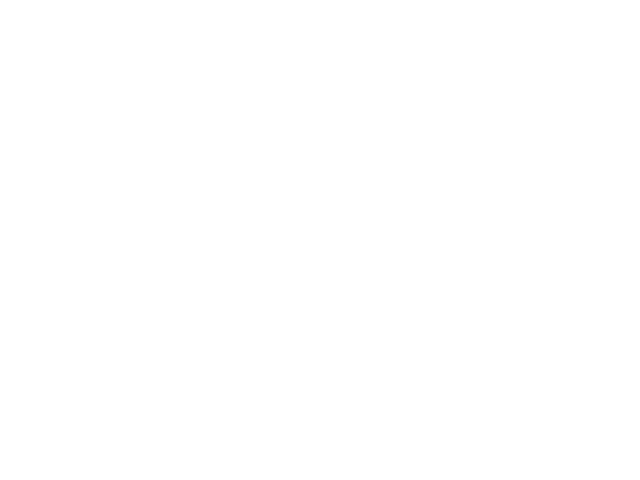

In [9]:
init_time = simulation.current_time - 100.0
end_time = simulation.current_time - 90.0
min_neuron = 0
max_neuron = 100
#max_neuron = simulation.cerebellum.get_number_of_elements(layer='grclayer')
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure()
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GrC Cell Number')
plt.xlabel('Simulation time (s)')
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
pattern_id = 0
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)
plt.show()

Calculate the average firing frequency of each granular cells during the ending 100 seconds

Average spike per oscillatory cycle: 0.2187890625 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

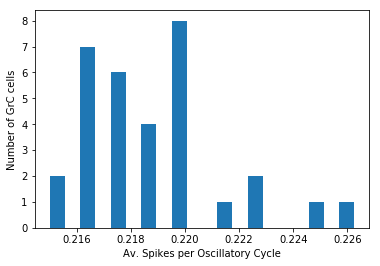

In [10]:
init_time = simulation.current_time - 100.0
end_time = simulation.current_time
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / ((end_time-init_time)*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GrC

0.0


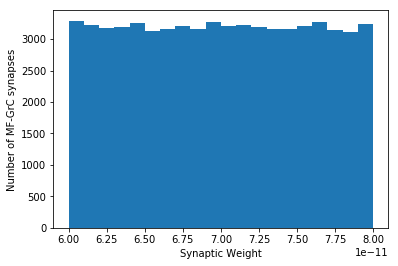

10.0


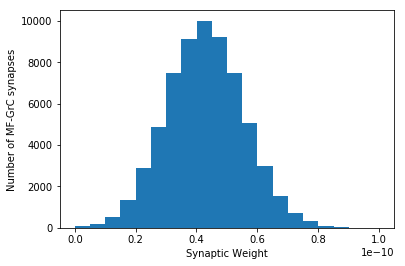

20.0


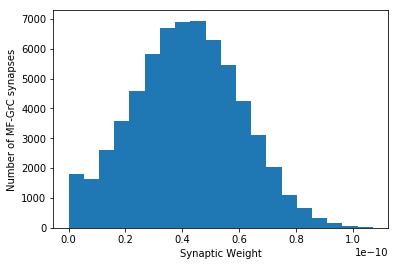

30.0


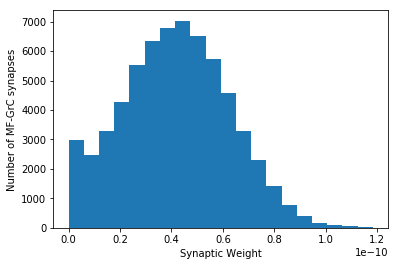

40.0


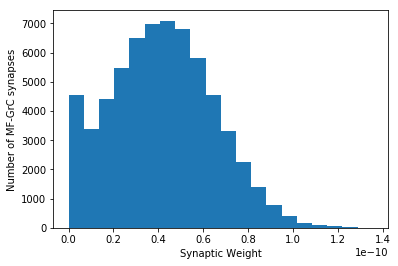

50.0


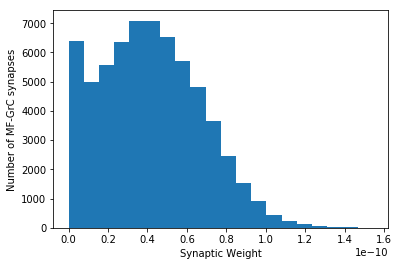

60.0


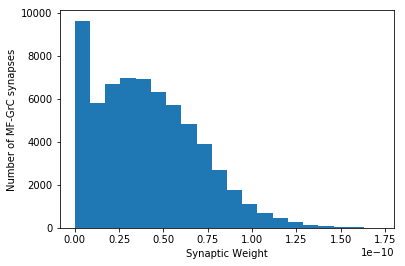

70.0


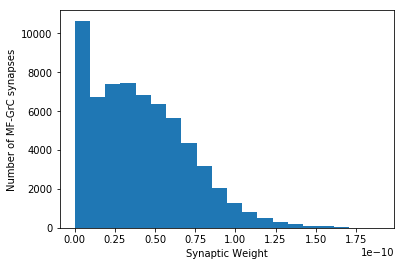

80.0


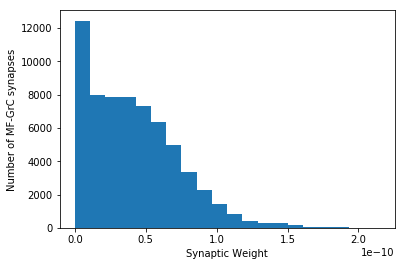

90.0


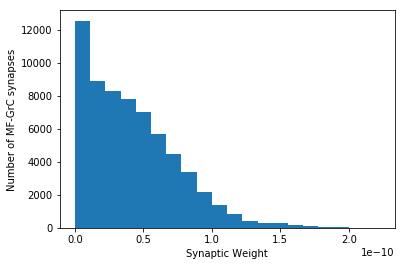

100.0


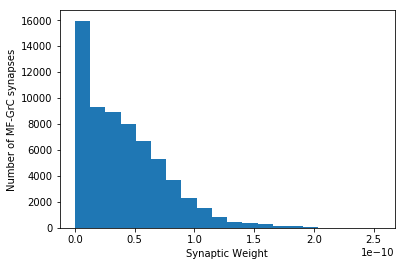

110.0


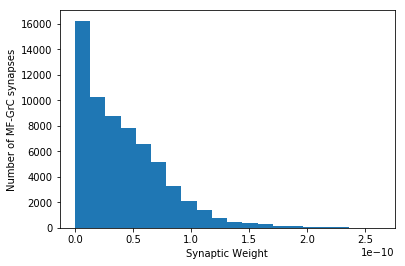

120.0


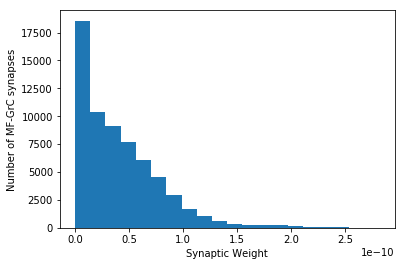

130.0


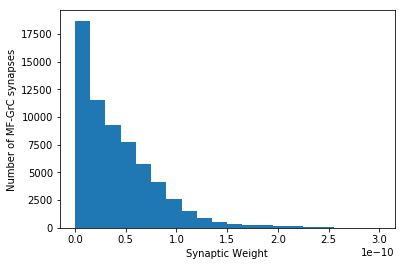

140.0


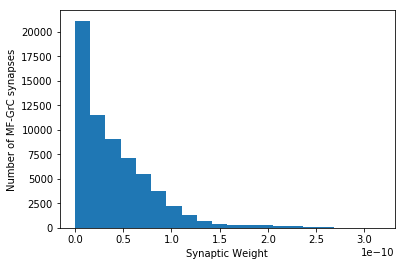

150.0


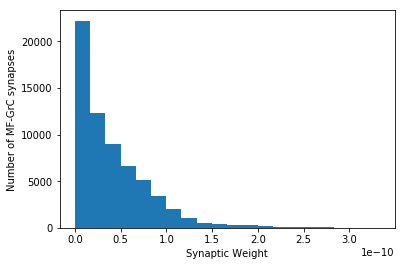

160.0


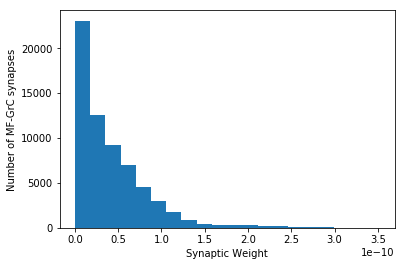

170.0


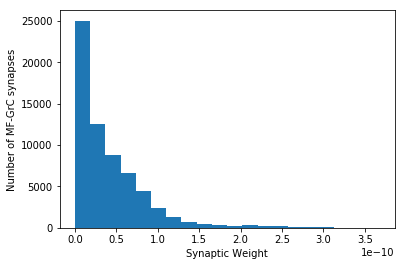

180.0


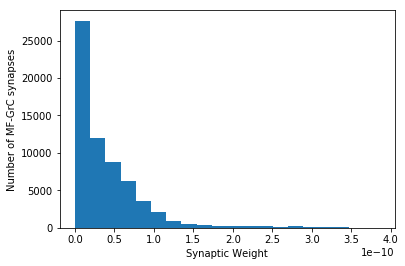

190.0


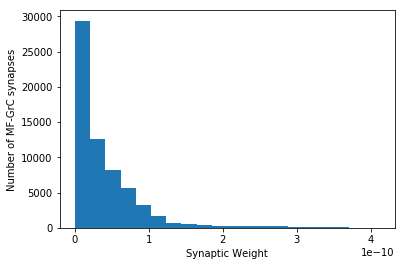

200.0


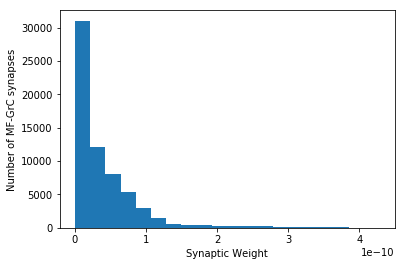

210.0


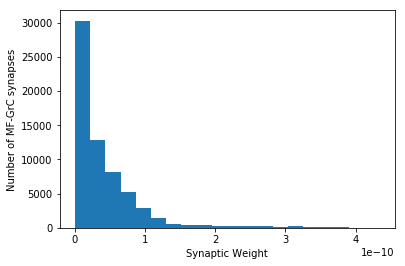

220.0


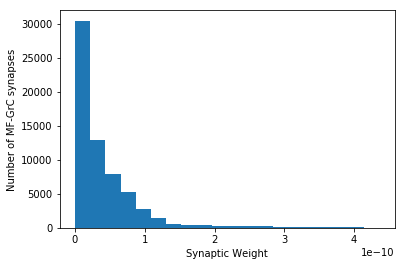

230.0


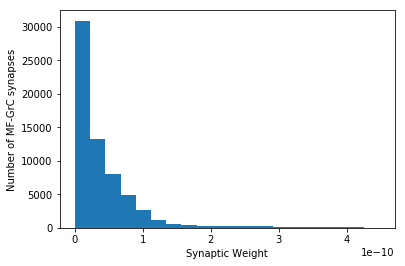

240.0


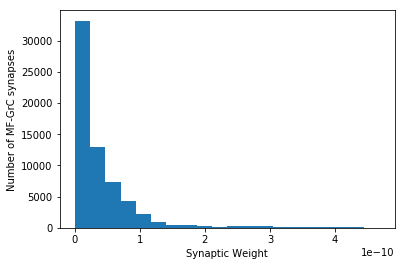

250.0


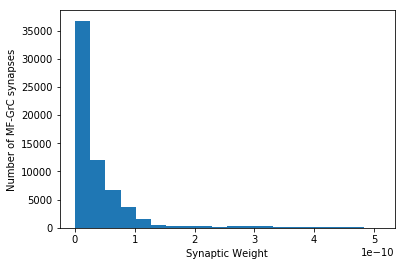

260.0


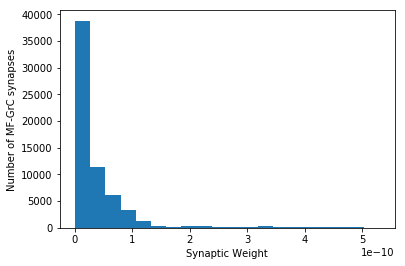

270.0


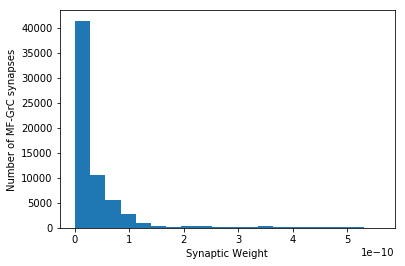

280.0


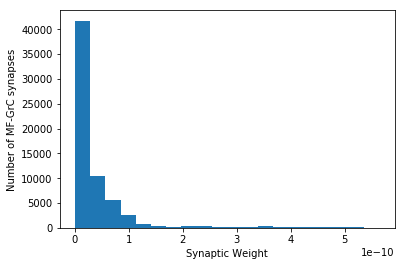

290.0


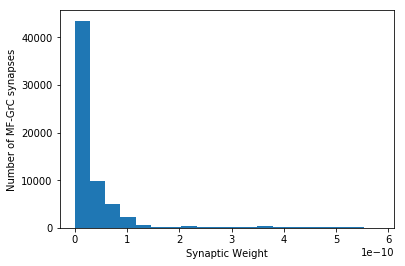

300.0


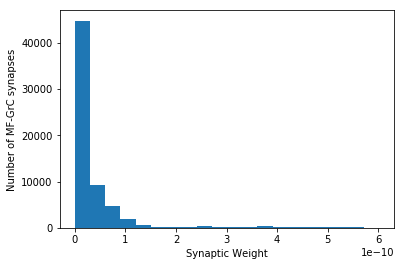

310.0


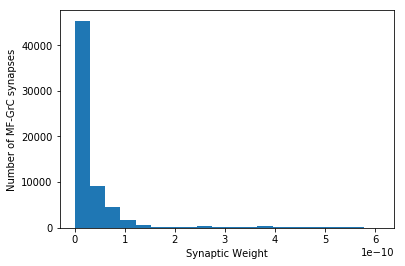

320.0


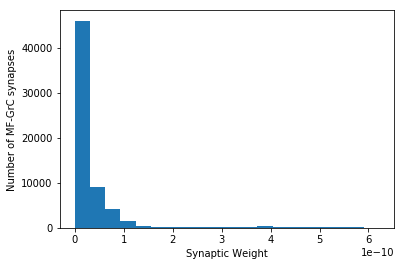

330.0


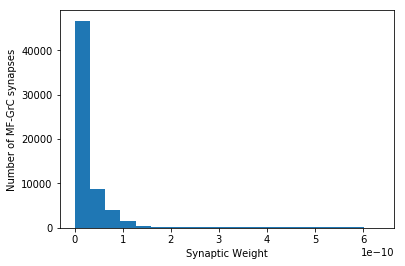

340.0


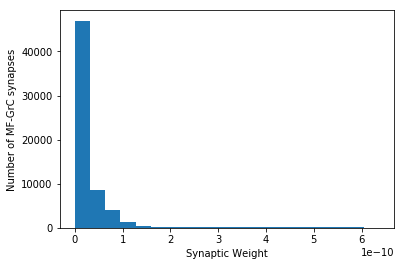

350.0


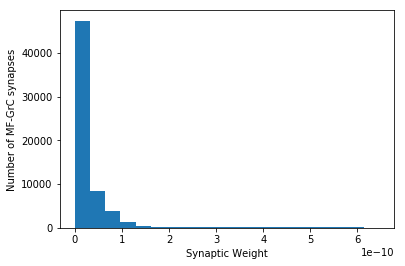

360.0


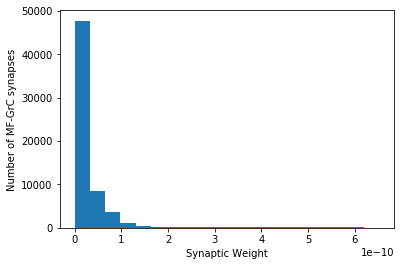

370.0


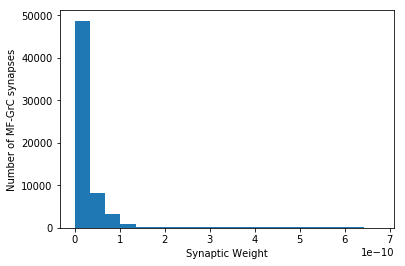

380.0


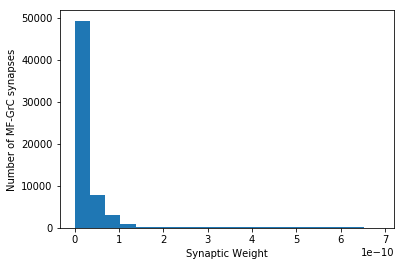

390.0


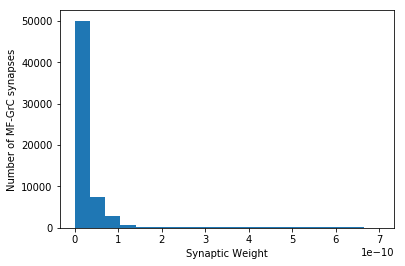

400.0


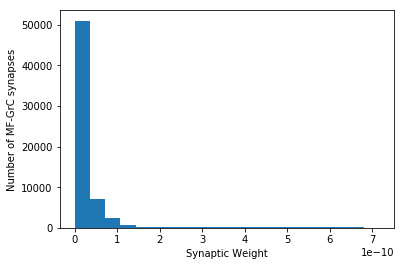

410.0


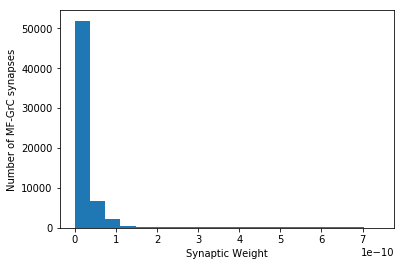

420.0


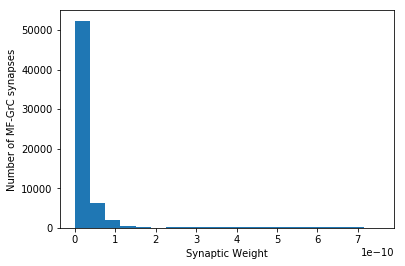

430.0


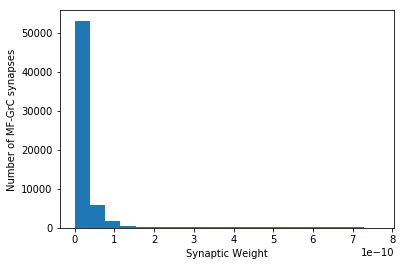

440.0


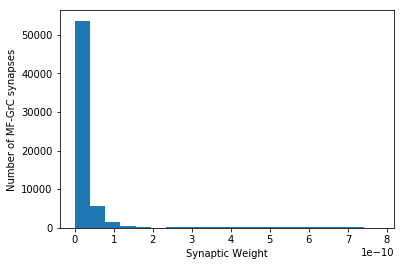

450.0


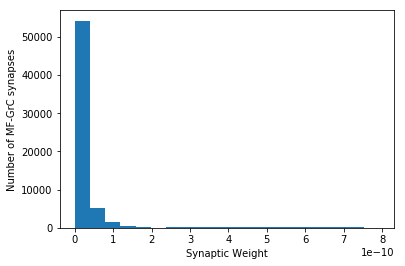

460.0


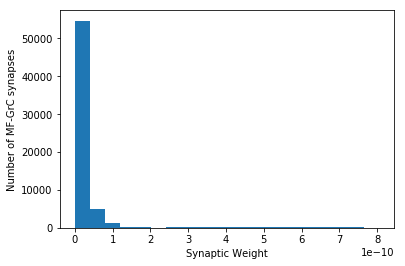

470.0


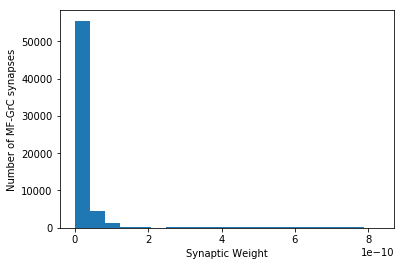

480.0


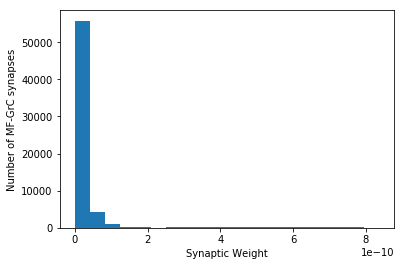

490.0


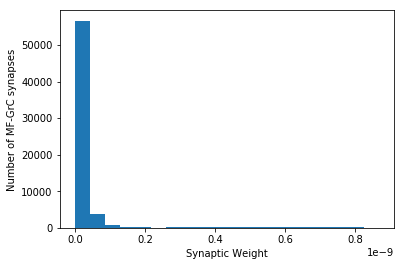

500.0


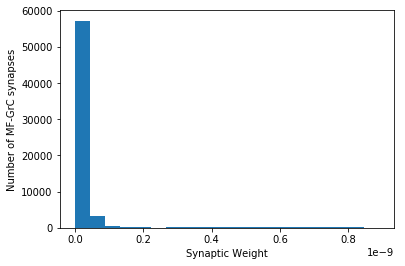

510.0


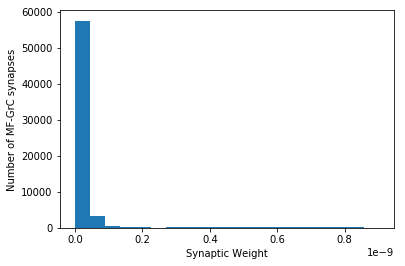

520.0


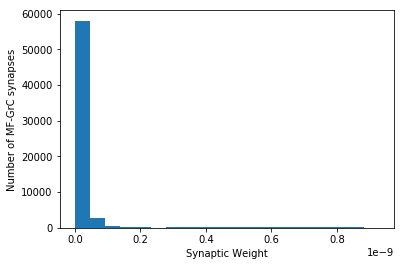

530.0


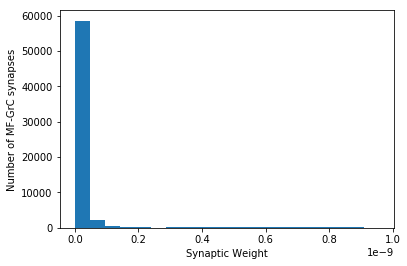

540.0


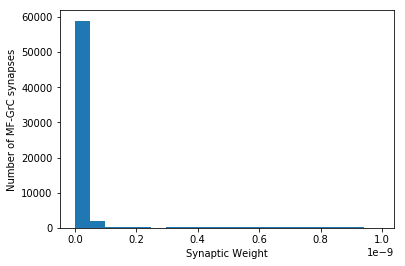

550.0


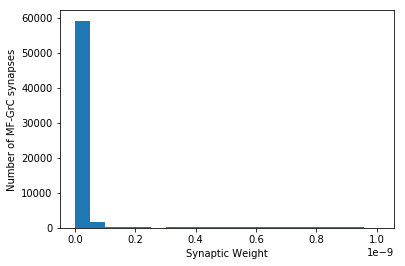

560.0


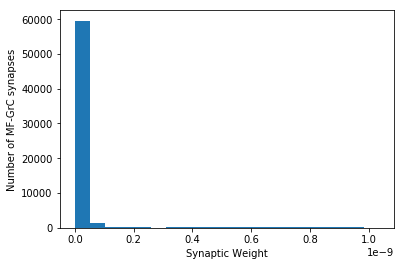

570.0


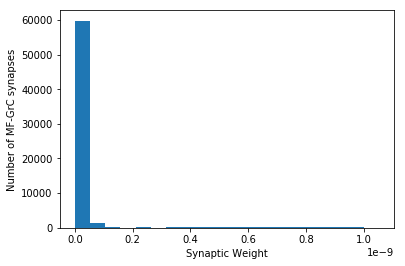

580.0


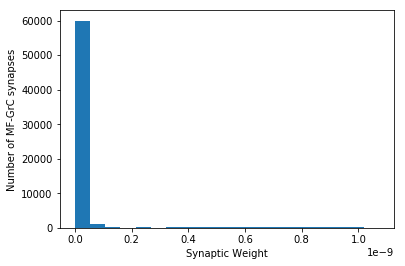

590.0


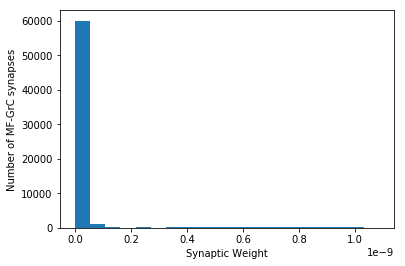

600.0


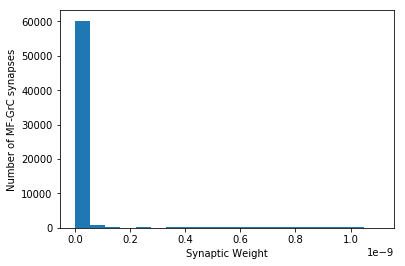

610.0


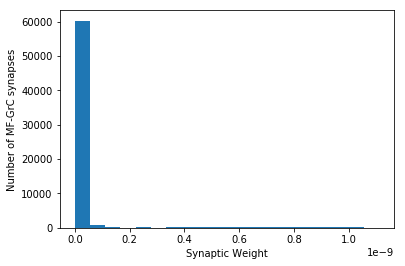

620.0


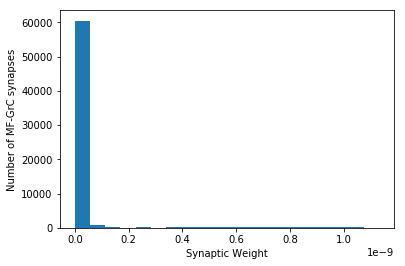

630.0


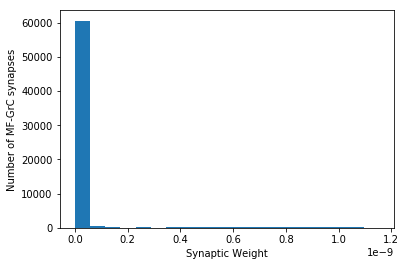

640.0


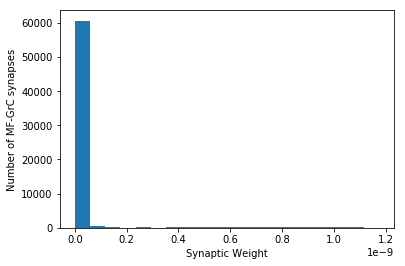

650.0


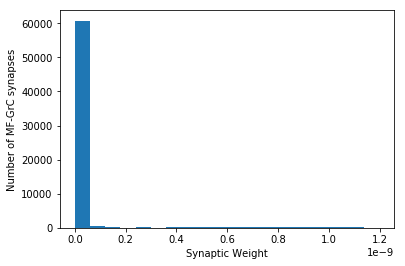

660.0


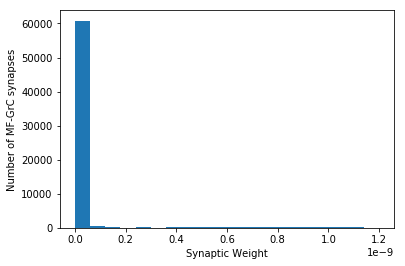

670.0


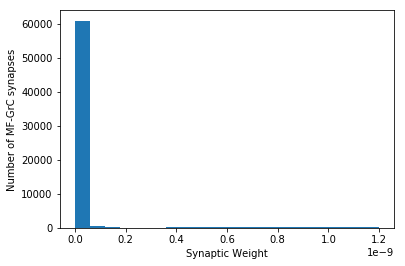

680.0


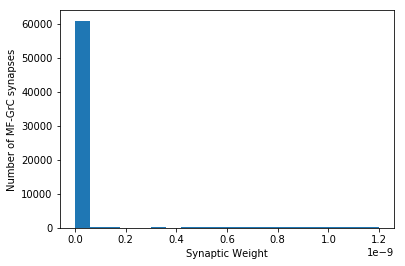

690.0


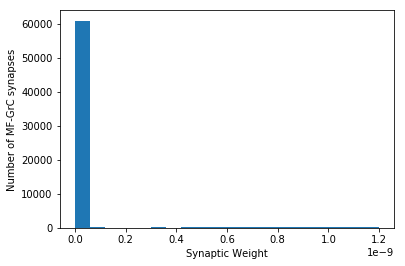

700.0


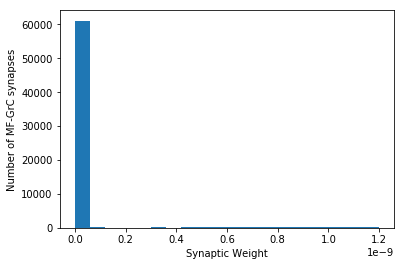

710.0


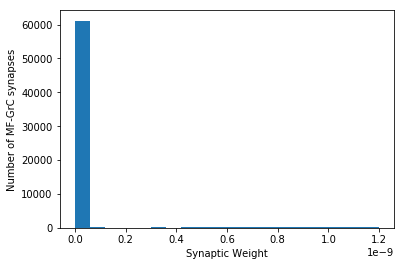

720.0


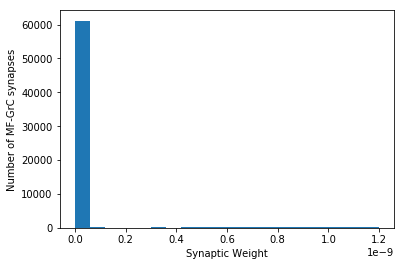

730.0


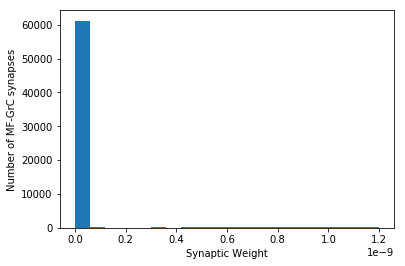

740.0


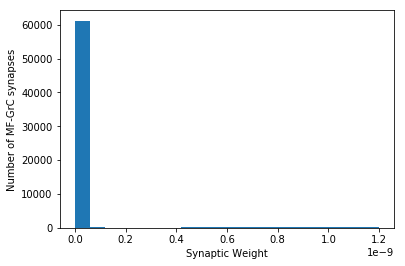

750.0


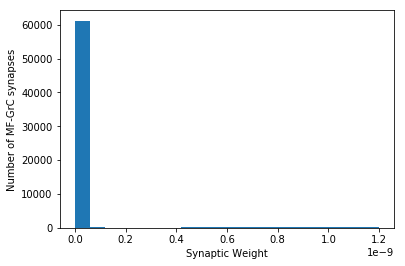

760.0


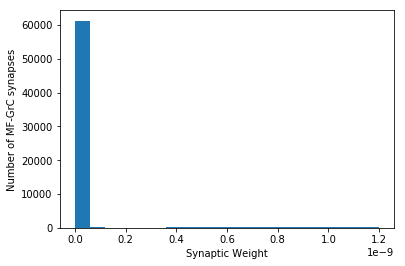

770.0


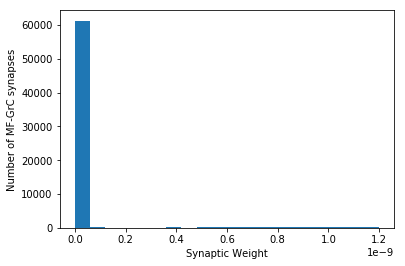

780.0


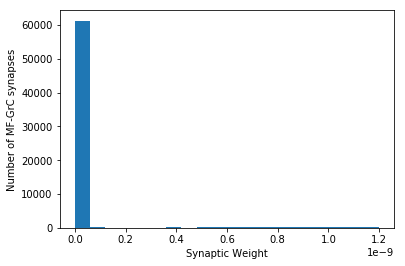

790.0


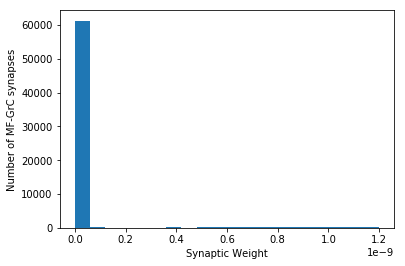

800.0


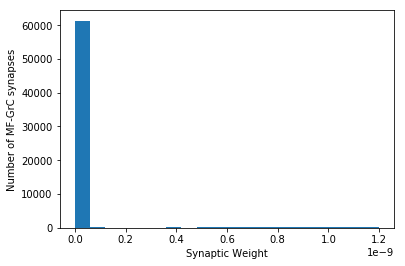

810.0


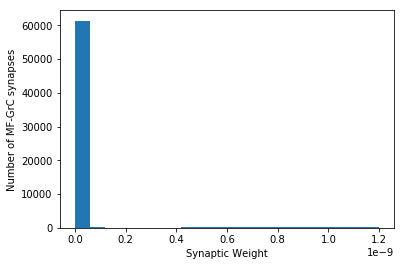

820.0


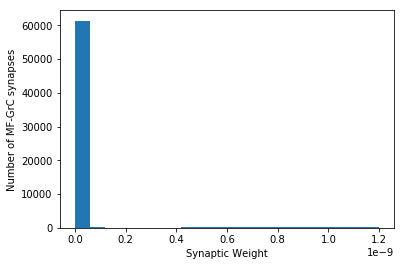

830.0


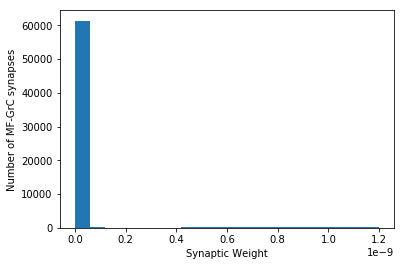

840.0


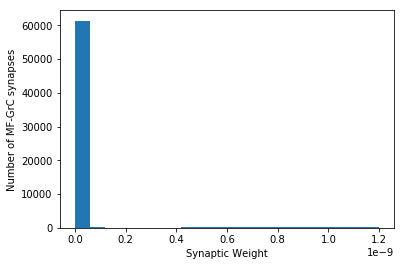

850.0


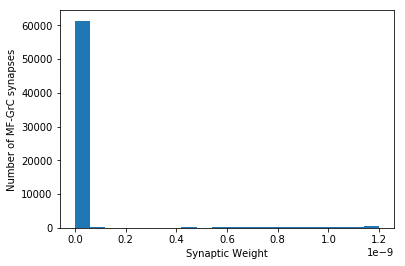

860.0


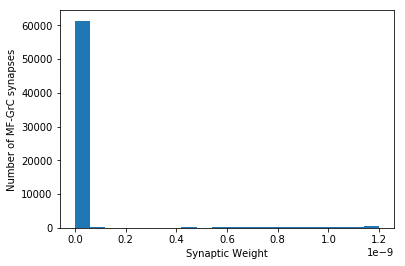

870.0


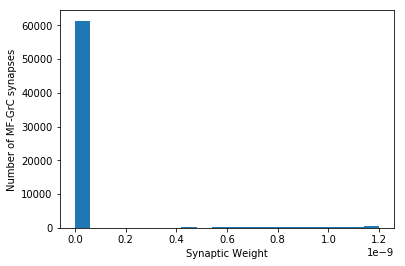

880.0


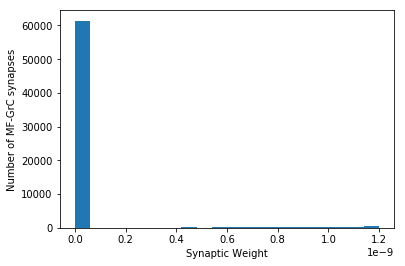

890.0


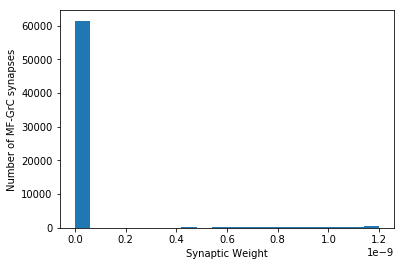

900.0


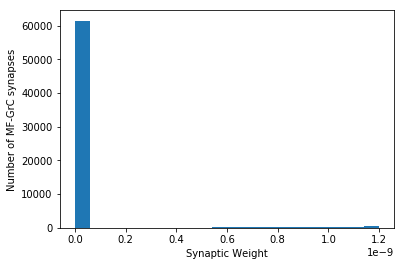

910.0


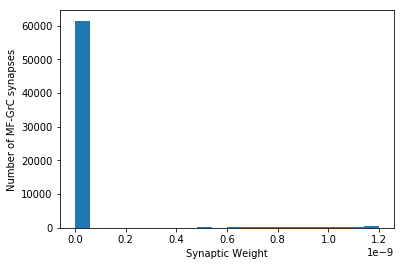

920.0


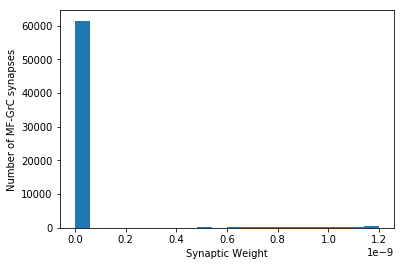

930.0


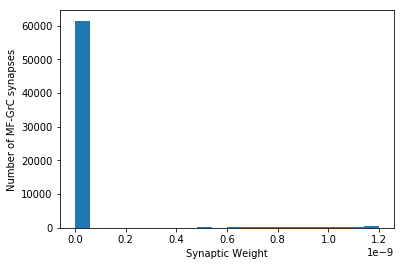

940.0


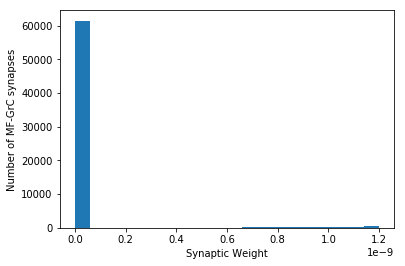

950.0


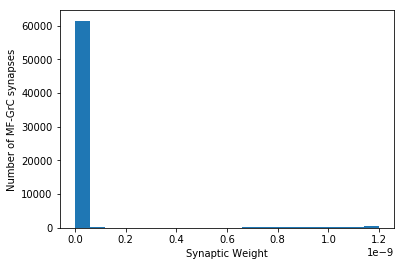

960.0


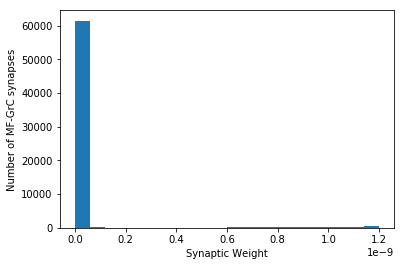

970.0


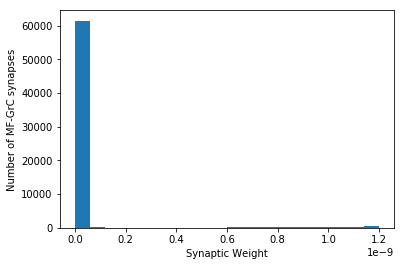

980.0


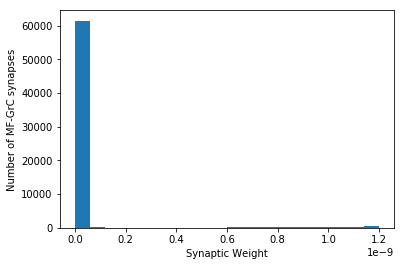

990.0


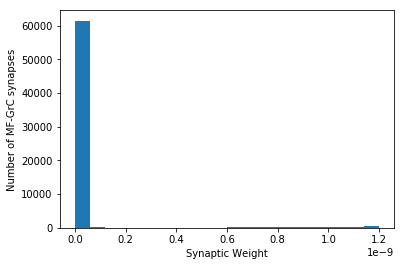

1000.0


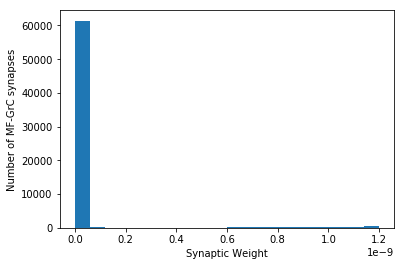

1010.0


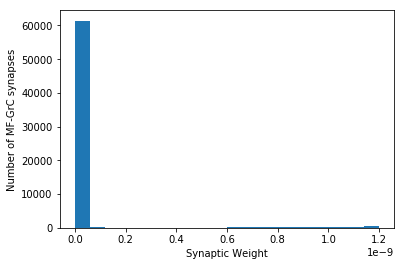

1020.0


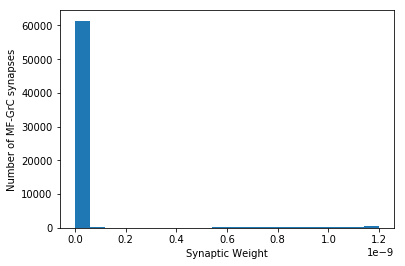

1030.0


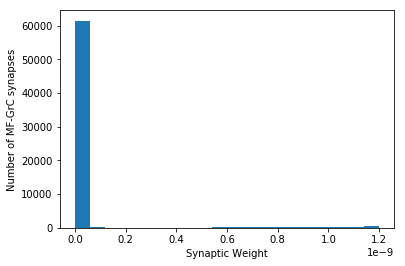

1040.0


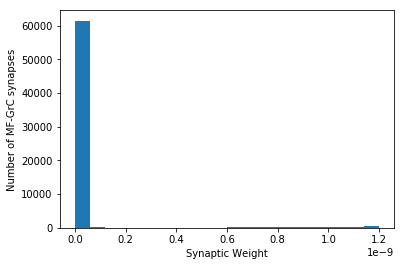

1050.0


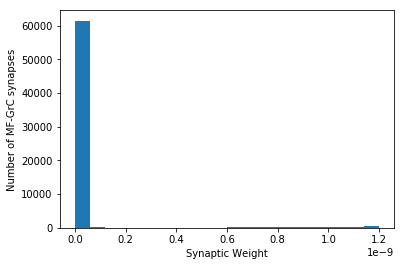

1060.0


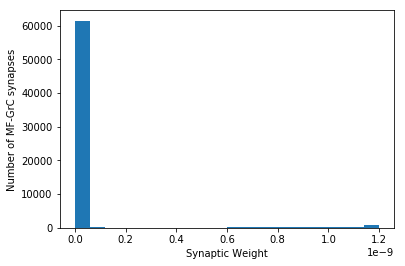

1070.0


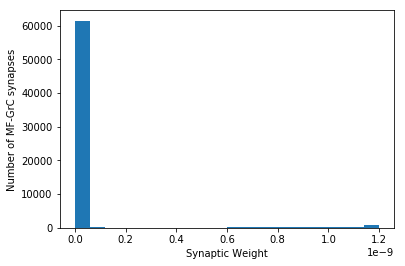

1080.0


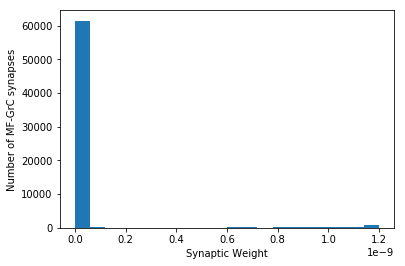

1090.0


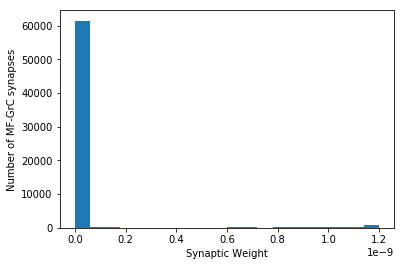

1100.0


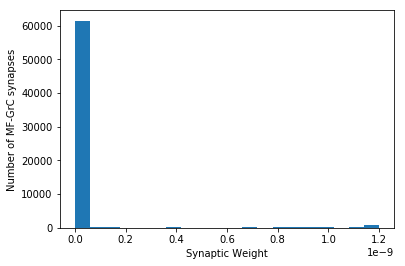

1110.0


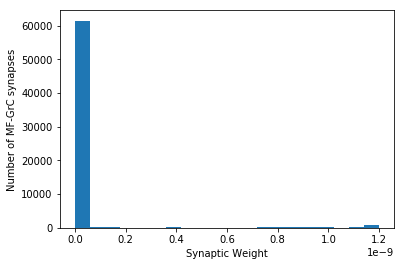

1120.0


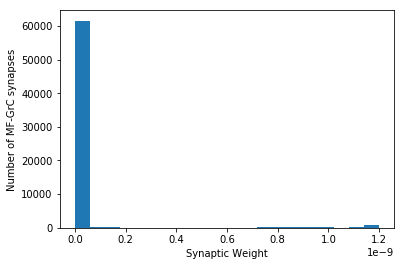

1130.0


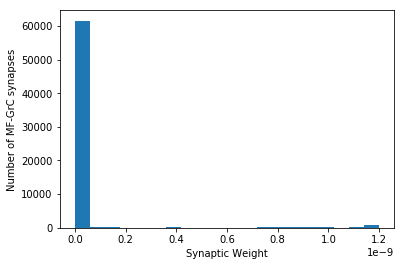

1140.0


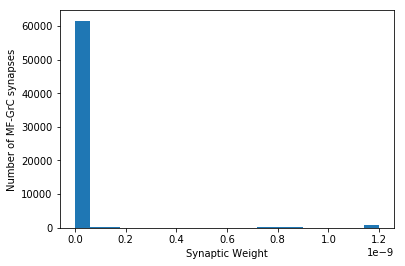

1150.0


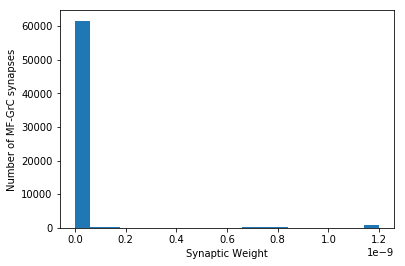

1160.0


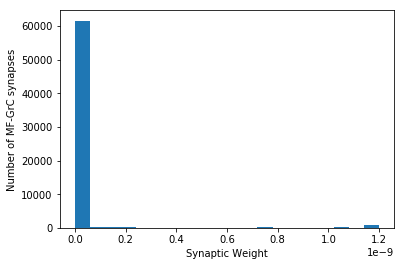

1170.0


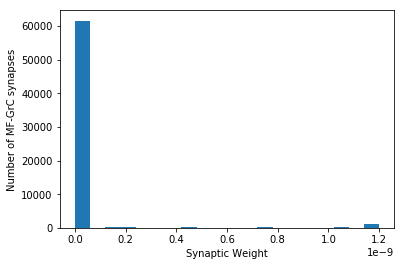

1180.0


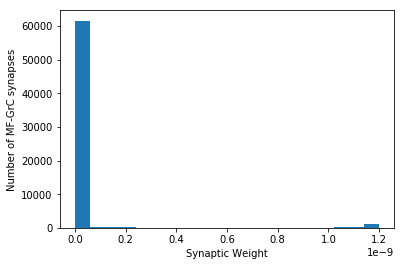

1190.0


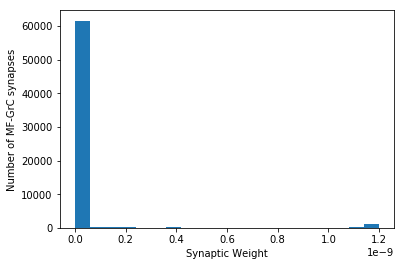

1200.0


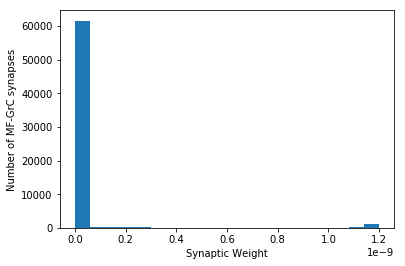

1210.0


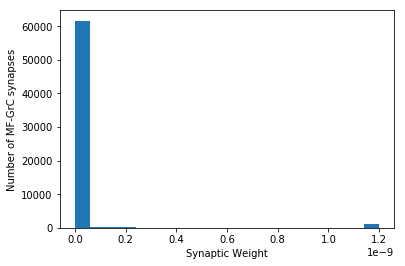

1220.0


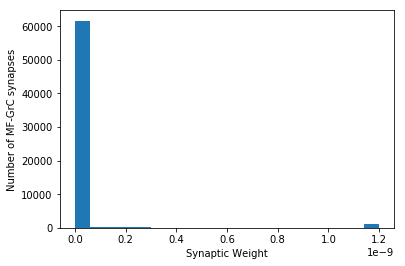

1230.0


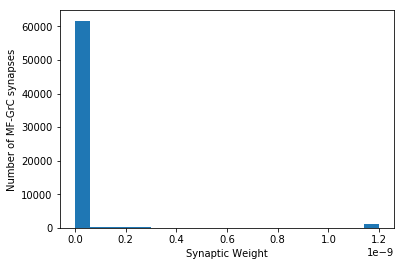

1240.0


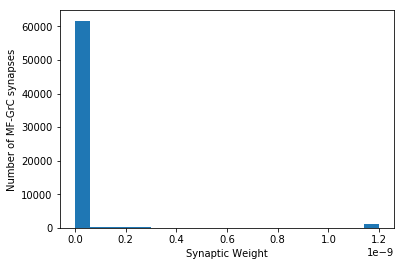

1250.0


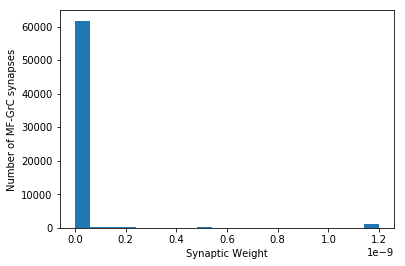

1260.0


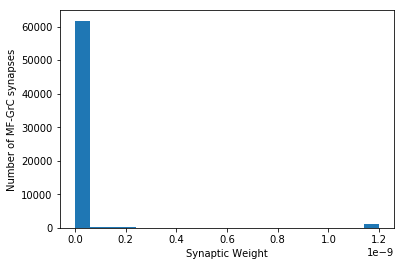

1270.0


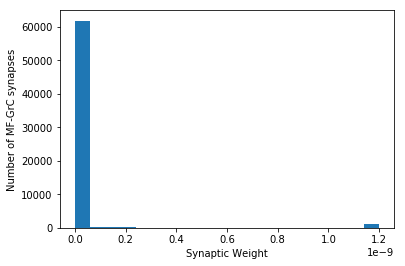

1280.0


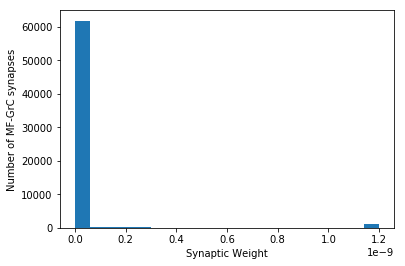

1290.0


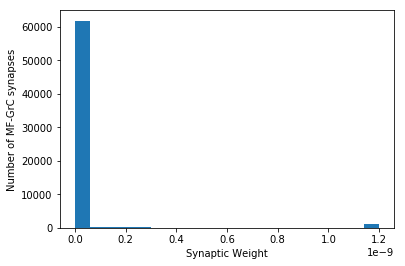

1300.0


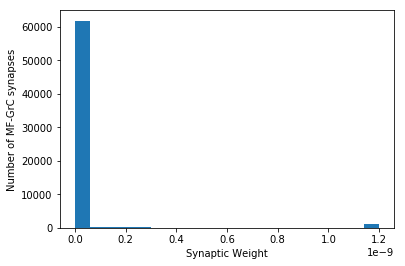

1310.0


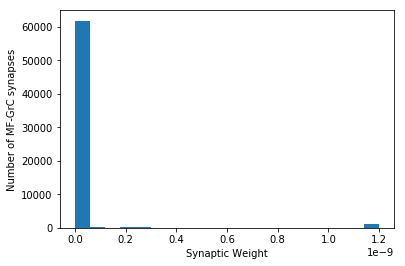

1320.0


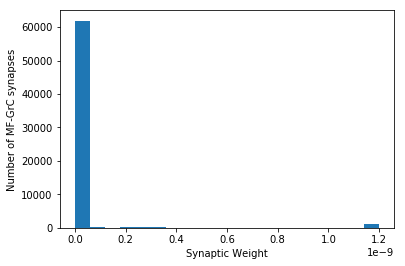

1330.0


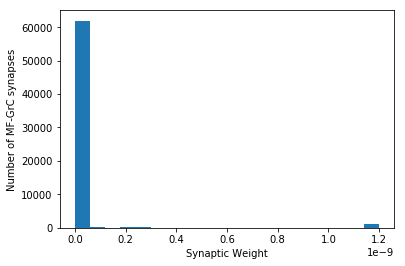

1340.0


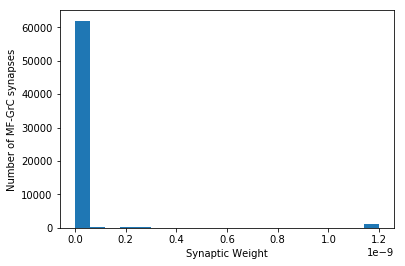

1350.0


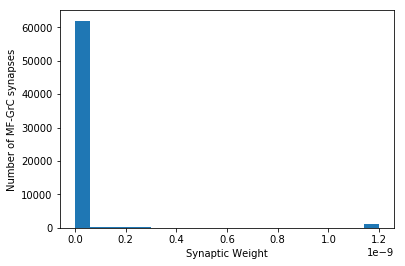

1360.0


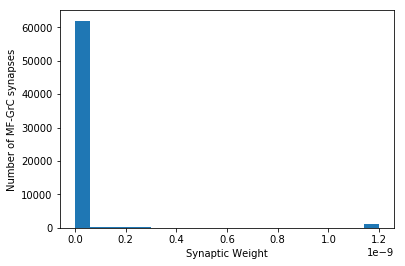

1370.0


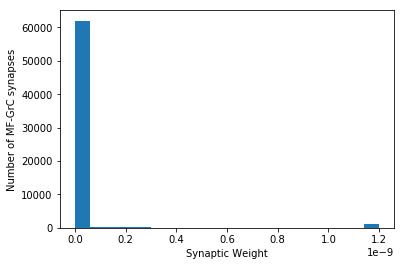

1380.0


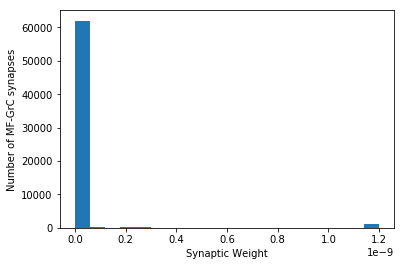

1390.0


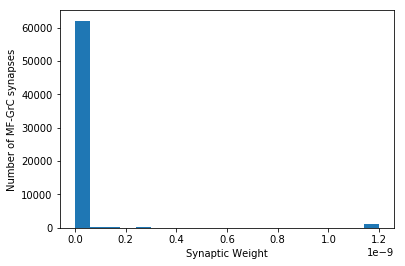

1400.0


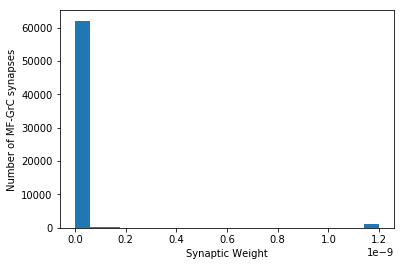

1410.0


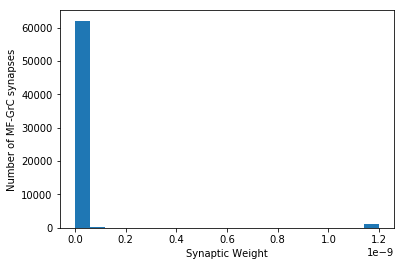

1420.0


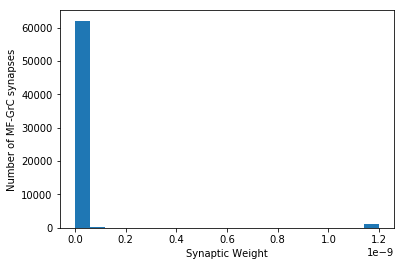

1430.0


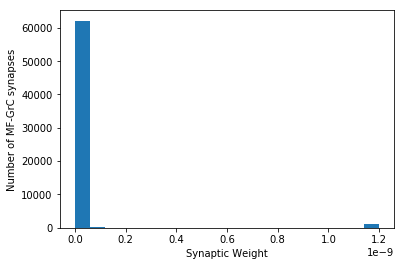

1440.0


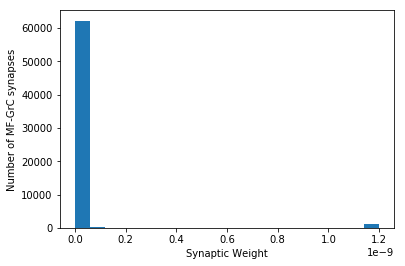

1450.0


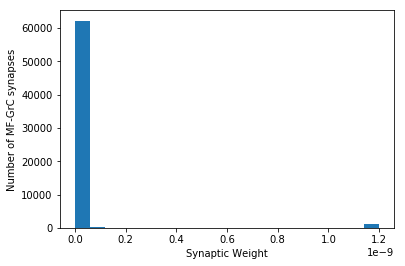

1460.0


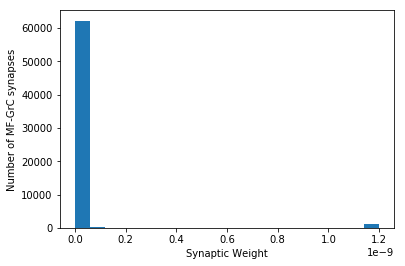

1470.0


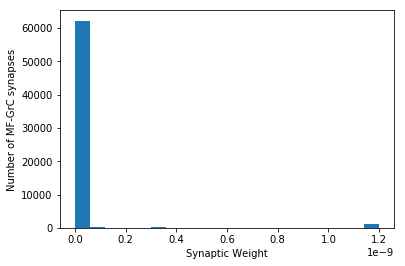

1480.0


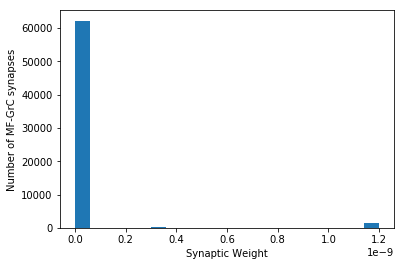

1490.0


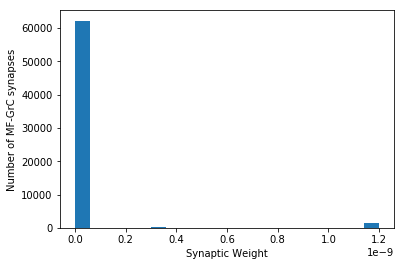

1500.0


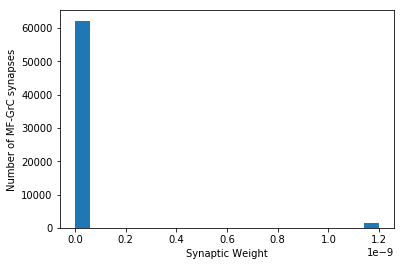

1510.0


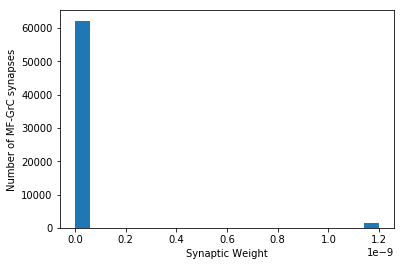

1520.0


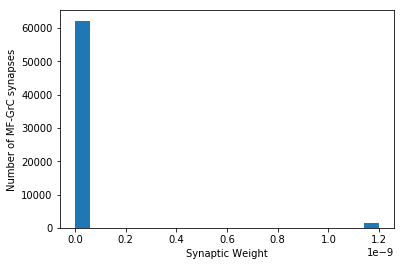

1530.0


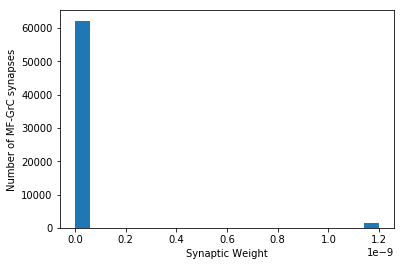

1540.0


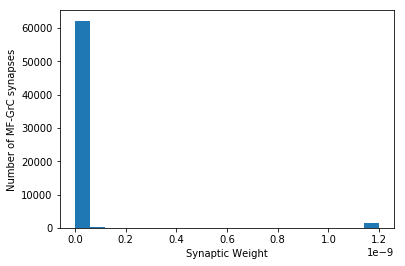

1550.0


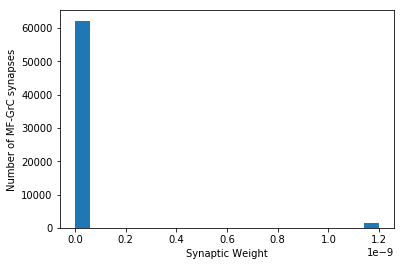

1560.0


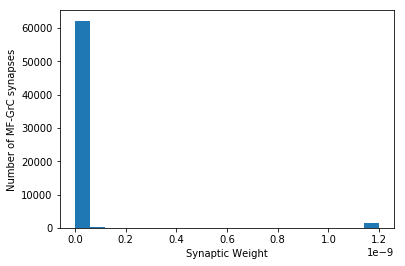

1570.0


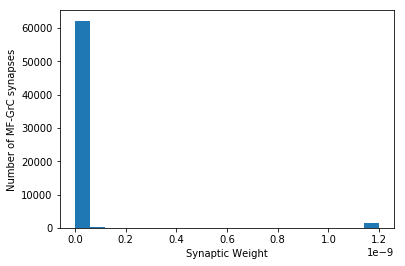

1580.0


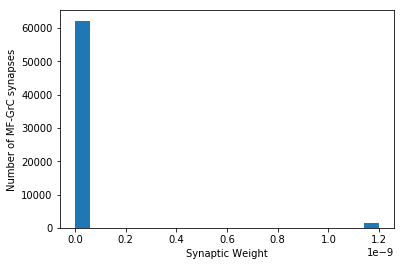

1590.0


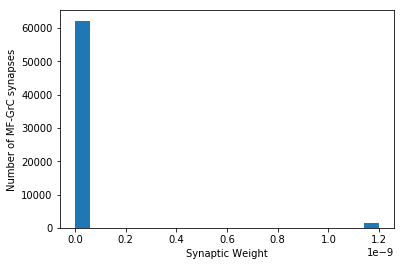

1600.0


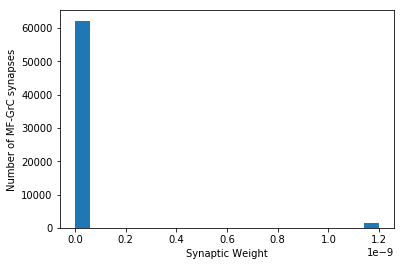

1610.0


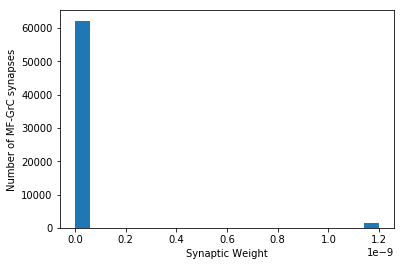

1620.0


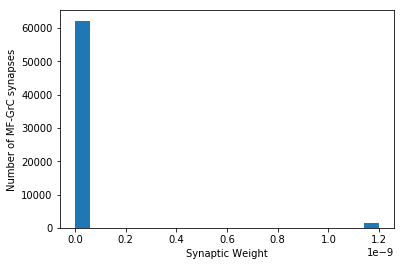

1630.0


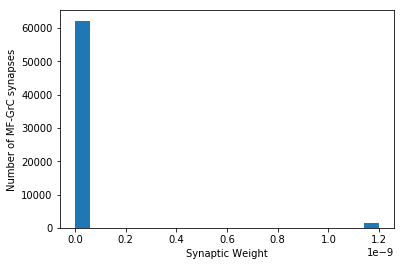

1640.0


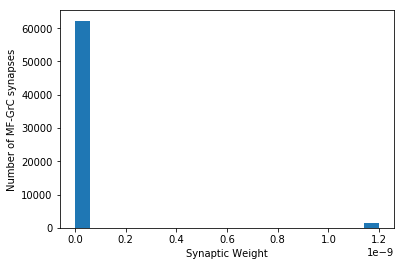

1650.0


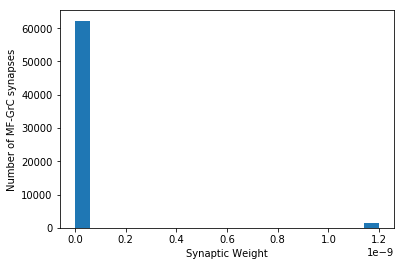

1660.0


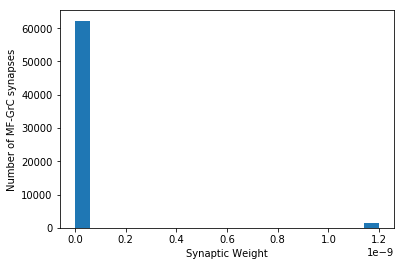

1670.0


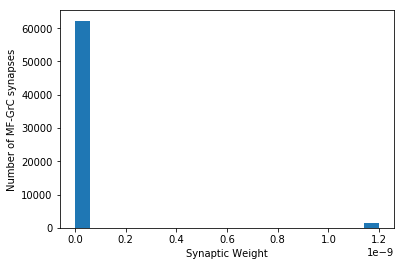

1680.0


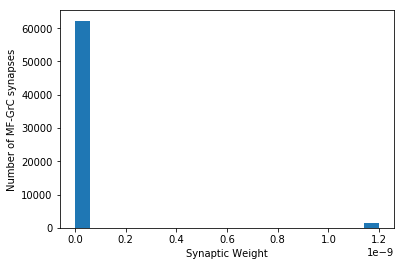

1690.0


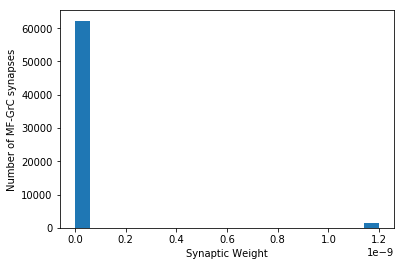

1700.0


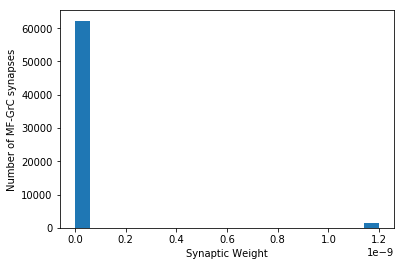

1710.0


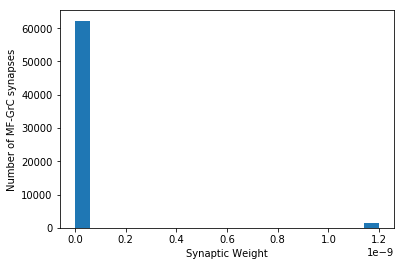

1720.0


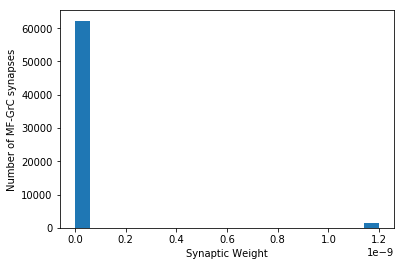

1730.0


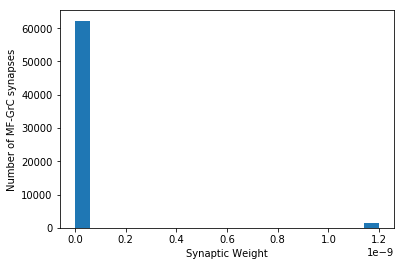

1740.0


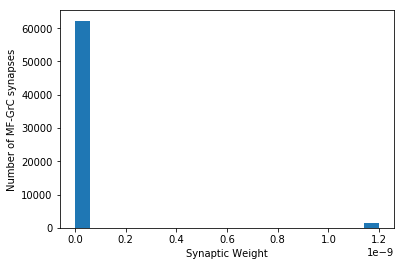

1750.0


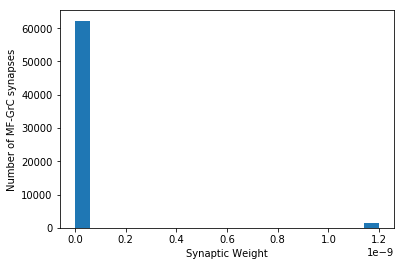

1760.0


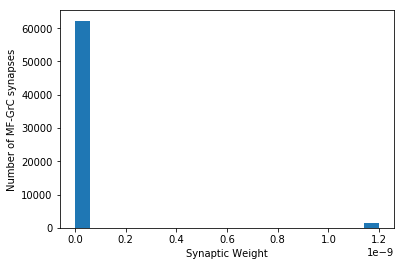

1770.0


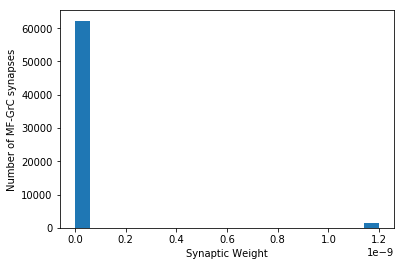

1780.0


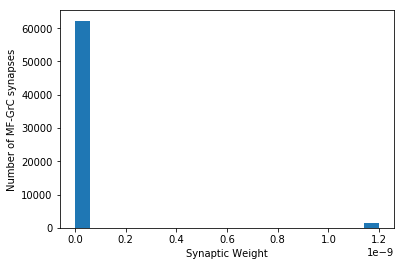

1790.0


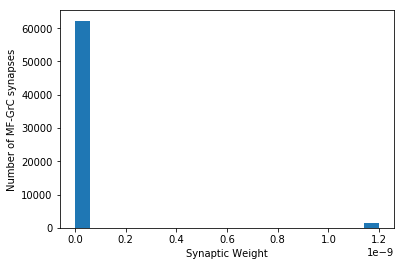

1800.0


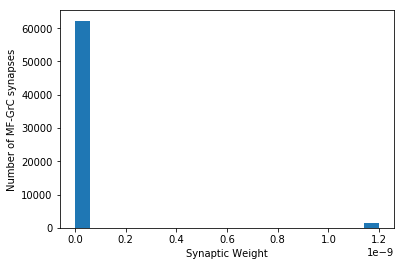

1810.0


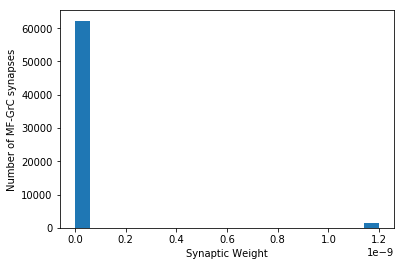

1820.0


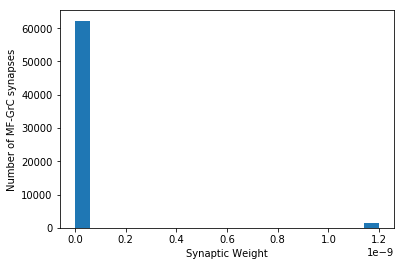

1830.0


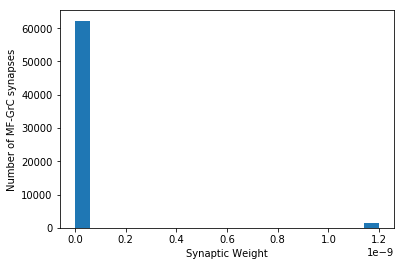

1840.0


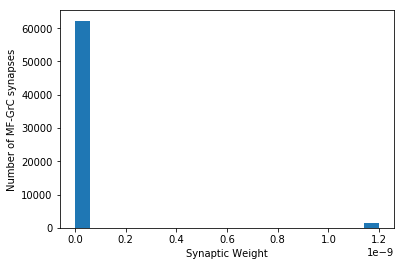

1850.0


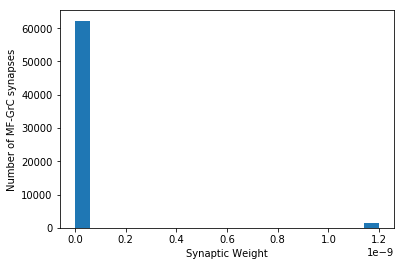

1860.0


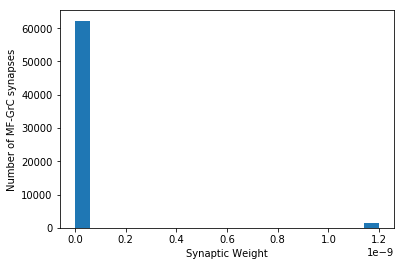

1870.0


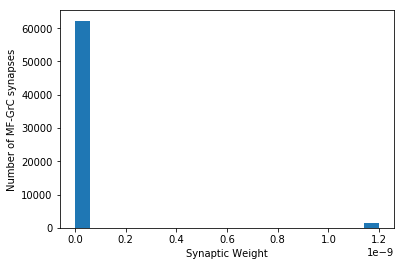

1880.0


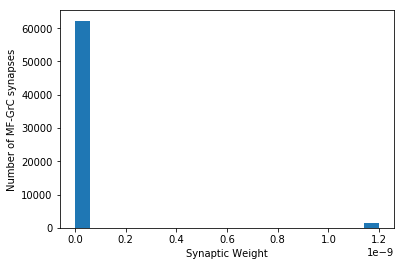

1890.0


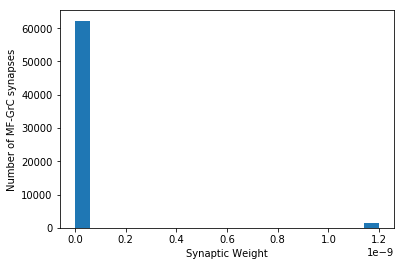

1900.0


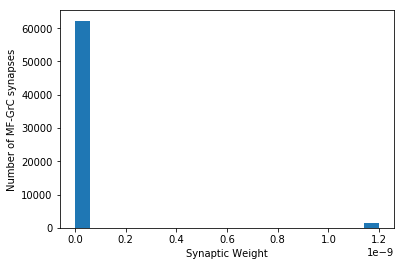

1910.0


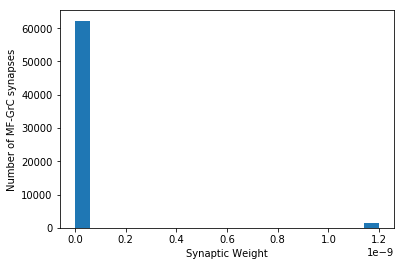

Number of active synapses MF-GrC: 1430
Weight sum histogram MF-GrC: 1430


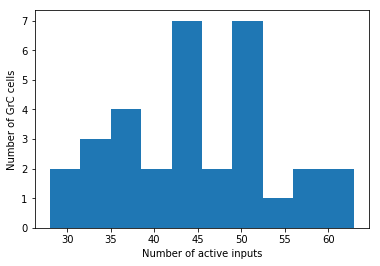

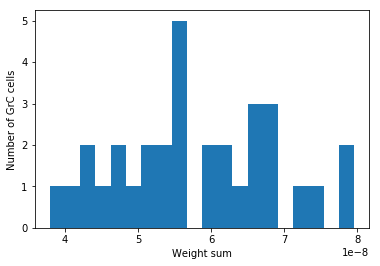

In [11]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
#weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
time_list,_,weight_list =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgrcsynapsis', init_time=0, end_time=simulation_time)
for idx,time in enumerate(time_list):
    print time
    weight=weight_list[:,idx]
    plt.figure()
    plt.hist(weight, bins=20)
    plt.ylabel('Number of MF-GrC synapses')
    plt.xlabel('Synaptic Weight')
    plt.show()
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.5
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GrC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.5
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GrC:',numpy.count_nonzero(active_synapses)


Histogram of active synapses connecting input fibers included in the pattern

Number of active MF-GrC synapses also included in pattern 0 : 156


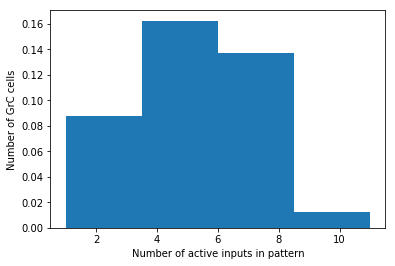

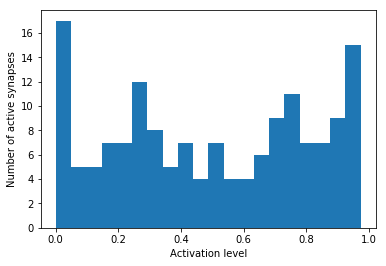

In [12]:
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
    plt.figure()
    n,_,_=plt.hist(number_of_active_inputs_in_pattern, bins=4, density=True)
    plt.ylabel('Number of GrC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GrC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active)
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

## GoC activity analysis

Show the GoC acticity rasterplot

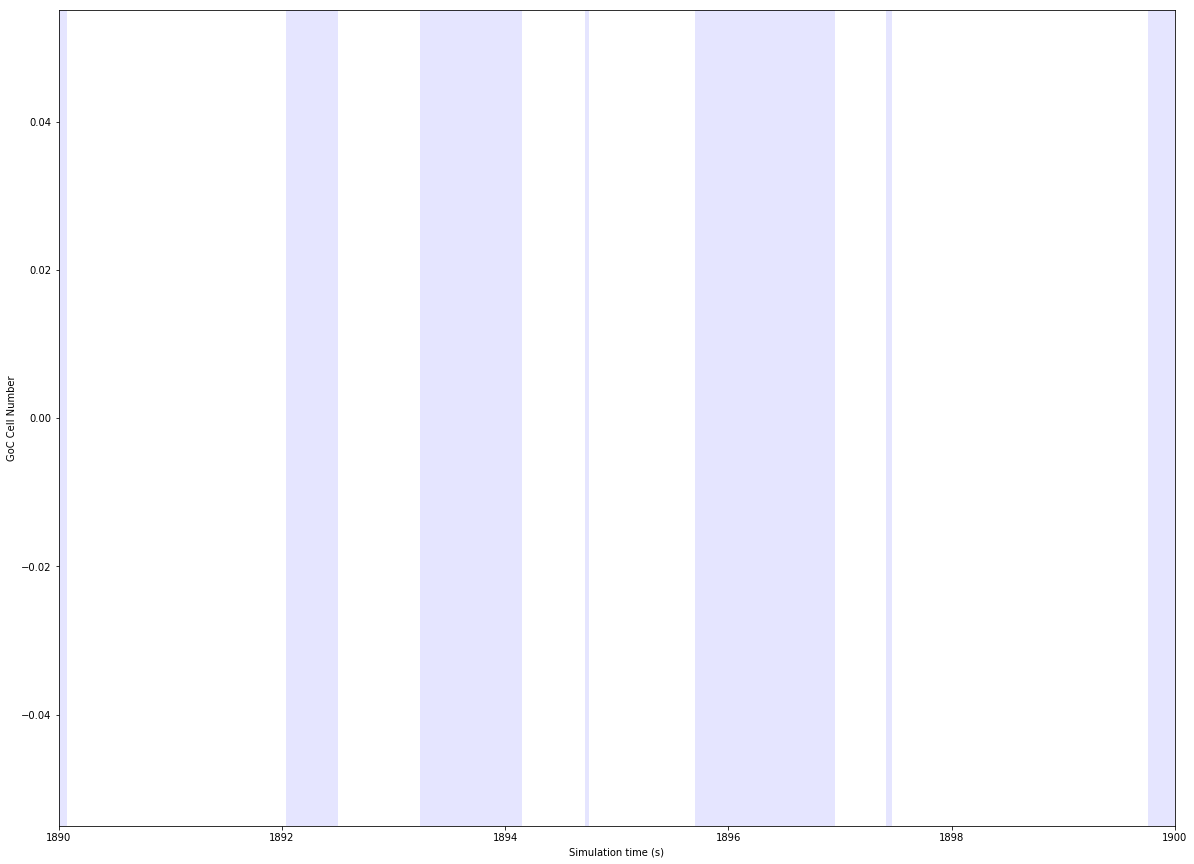

In [13]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = 0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(20,15))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

Average spike per oscillatory cycle: nan Hz


/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

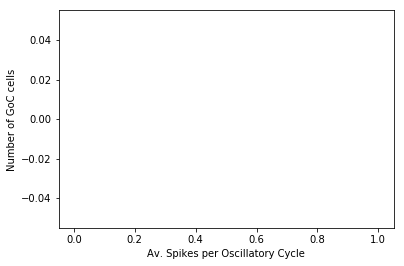

In [14]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between GrC and GoC

In [15]:
target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,6.5e-12))
plt.ylabel('Number of GrC-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses GrC-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram GrC-GoC:',numpy.count_nonzero(active_synapses)

KeyError: 'grcgocsynapsis'

Plot the histogram of non-zero weights between MF and GoC

In [ ]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,6.5e-12))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## GrC-GoC weight analysis

Plot the GrC-GoC weight as a function of the number of MF-GrC synapses in pattern

In [ ]:
# Obtain the list of active GrC-GoC inputs
grcgoc_target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
grcgoc_source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
grcgoc_weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
target_cell_index = grcgoc_target_cell_index==6
# Obtain the list of active GrC inputs
mfgrc_target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
mfgrc_source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
mfgrc_weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
mfgrc_max_weight = numpy.max(mfgrc_weight)
mfgrc_active_synapses = mfgrc_weight>mfgrc_max_weight*0.0
mfgrc_number_of_active_inputs = numpy.bincount(mfgrc_target_cell_index[mfgrc_active_synapses])
# Obtain the list of GrC active inputs in included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgrc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
included_and_active = numpy.logical_and(included_in_pattern,mfgrc_active_synapses)
number_of_active_inputs_in_pattern = numpy.bincount(mfgrc_target_cell_index[included_and_active],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(number_of_active_inputs_in_pattern[grcgoc_source_cell_index[target_cell_index]],grcgoc_weight[target_cell_index],'.')
plt.xlabel('Number of active MF inputs')
plt.ylabel('GrC-GoC weight')
plt.title('Weight vs MFs in pattern')

# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgrc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")

# Calculate the normalized activation levels
normalized_activation = mfgrc_weight[included_in_pattern]*simulation.pattern_generator.pattern_activation[pattern_id][yindex]
input_conductance_in_pattern = numpy.bincount(mfgrc_target_cell_index[included_and_active],weights=normalized_activation,minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
# Plot the figure
plt.subplot(1,2,2)
plt.plot(input_conductance_in_pattern[grcgoc_source_cell_index[target_cell_index]],grcgoc_weight[target_cell_index],'.')
plt.xlabel('Input Conductance in Pattern')
plt.ylabel('GrC-GoC weight')
plt.title('Weight vs Pattern input conductance')

Analyze the GrC neurons which are strenghted

In [ ]:
# Obtain the list of active GrC-GoC inputs
grcgoc_target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
grcgoc_source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
grcgoc_weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
target_cell_index = grcgoc_target_cell_index==0
grcgoc_max_weight = numpy.max(grcgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(grcgoc_weight>grcgoc_max_weight*0.95,target_cell_index)
target_count = numpy.bincount(grcgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(grcgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='grclayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GrC cells')

Analyze the firing pattern of the selected GrCs and GoCs

In [ ]:
oscillation_frequency = 8.0
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
grc_time,grc_cell = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
grc_selected_spikes = numpy.isin(grc_cell,numpy.unique(grcgoc_source_cell_index[selected_synapses]))
cell_id = grc_cell[grc_selected_spikes]
sel_time = grc_time[grc_selected_spikes]
grc_phase = numpy.mod(sel_time,1./oscillation_frequency)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(grc_phase,bins=50,range=(0,1./oscillation_frequency))
plt.title('Firing pattern of selected GrCs')
plt.ylabel('Number of GrC Spikes')
plt.xlabel('Firing phase (s)')
goc_time,goc_cell = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
goc_selected_spikes = numpy.isin(goc_cell,numpy.unique(grcgoc_target_cell_index[selected_synapses]))
cell_id = goc_cell[goc_selected_spikes]
sel_time = goc_time[goc_selected_spikes]
goc_phase = numpy.mod(sel_time,1./oscillation_frequency)
plt.subplot(1,2,2)
plt.hist(goc_phase,bins=50,range=(0,1./oscillation_frequency))
plt.title('Firing pattern of selected GoCs')
plt.ylabel('Number of GoC Spikes')
plt.xlabel('Firing phase (s)')

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

In [ ]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

In [ ]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [ ]:
simulation.analyze_av_MI()

In [ ]:
simulation.analyze_Hits_Top()